In [1]:
library(tidyr)
library(dplyr)
library(Seurat)
library(ggplot2)
library(UpSetR)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')



In [2]:
GSE132080_sgRNA_barcode_sequences_and_phenotypes <- read.csv('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Weissman_NatBio/raw_data/GSE132080_sgRNA_barcode_sequences_and_phenotypes.csv', header = TRUE)

In [3]:
head(GSE132080_sgRNA_barcode_sequences_and_phenotypes) # not including nontargeting 

sgRNA_name                  sequence             gene  gamma_day5 
1 ALDOA_+_30077139.23-P1P2_00 GGTCACCAGGACCCCTTCTG ALDOA -0.41274626
2 ALDOA_+_30077139.23-P1P2_06 GGTCACCAGGATCCCTTCTG ALDOA -0.39668691
3 ALDOA_+_30077139.23-P1P2_07 GGTCACCAGGCCCCCTTCTG ALDOA -0.36089236
4 ALDOA_+_30077139.23-P1P2_13 GGTCACCAGGACCCCTTTTG ALDOA  0.01706302
5 ALDOA_+_30077139.23-P1P2_14 GGTCACCAGGACCGCTTCTG ALDOA -0.17524343
6 ATP5E_-_57607036.23-P1P2_00 GGTGTCCAGGGGCACTCTGT ATP5E -0.17689823
  gamma_day10  relative_activity_day5 relative_activity_day10
1 -0.366468568  1.00000000            1.000000000            
2 -0.348503022  0.96109148            0.950976570            
3 -0.335059043  0.87436859            0.914291353            
4 -0.000220283 -0.04134022            0.000601096            
5 -0.156611393  0.42457909            0.427352866            
6 -0.224723052  1.00000000            1.000000000

In [4]:
GSE132080_sgRNA_barcode_sequences_and_phenotypes.WT <- GSE132080_sgRNA_barcode_sequences_and_phenotypes[grepl('_00', GSE132080_sgRNA_barcode_sequences_and_phenotypes$sgRNA_name),]


In [5]:
length(unique(GSE132080_sgRNA_barcode_sequences_and_phenotypes$sgRNA_name))


[1] 128

In [6]:
sum(grepl('_00',unique(GSE132080_sgRNA_barcode_sequences_and_phenotypes$sgRNA_name)))

[1] 25

# GiRAFR results - pool gemgroup 1-3 together

In [7]:
cells.gRNA.single.MT <- read.table('./GiRAFR_outputs/Jost_NatureBiotechnology/sample1/cells.gRNA.single.MT.txt')
cells.gRNA.single.MT$V1 <- paste0(cells.gRNA.single.MT$V1, '-1')
cells.gRNA.single.MT$KO <- sapply(strsplit(cells.gRNA.single.MT$V3, '_'), `[`, 1)
cells.gRNA.single.MT$putative_gRNA <- sub('GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTG', '', cells.gRNA.single.MT$V6)
cells.gRNA.single.MT$putative_gRNA <- sub('GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT', '', cells.gRNA.single.MT$putative_gRNA)
cells.gRNA.single.MT.WT <- cells.gRNA.single.MT[grepl('WT', cells.gRNA.single.MT$V3),]
cells.gRNA.single.MT.MT <- cells.gRNA.single.MT[!grepl('WT', cells.gRNA.single.MT$V3),]
cells.gRNA.single.MT.MT <- merge(cells.gRNA.single.MT.MT, GSE132080_sgRNA_barcode_sequences_and_phenotypes, by.x = 'putative_gRNA', by.y = 'sequence', all.x = TRUE)
cells.gRNA.single.MT.new <- cells.gRNA.single.MT.MT[is.na(cells.gRNA.single.MT.MT$sgRNA_name),]
cells.gRNA.single.MT.match <- cells.gRNA.single.MT.MT[!is.na(cells.gRNA.single.MT.MT$sgRNA_name),]
cells.gRNA.single.MT.WT <-  merge(cells.gRNA.single.MT.WT, GSE132080_sgRNA_barcode_sequences_and_phenotypes.WT, by.x = 'KO', by.y = 'gene', all.x = TRUE)
cells.gRNA.single.MT.match$cate <- 'match_MT'
cells.gRNA.single.MT.new$cate <- 'new_MT'
cells.gRNA.single.MT.WT$cate <- 'WT'
sub_col <- c('V1','V2','V3','V4','V5','V6','KO','sgRNA_name','gamma_day5','gamma_day10','relative_activity_day5','relative_activity_day10','cate')
cells.gRNA.single.MT1 <- rbind(rbind(cells.gRNA.single.MT.WT[,sub_col],cells.gRNA.single.MT.match[,sub_col]), 
                               cells.gRNA.single.MT.new[,sub_col])



In [8]:
cells.gRNA.single.MT <- read.table('./GiRAFR_outputs/Jost_NatureBiotechnology/sample2/cells.gRNA.single.MT.txt')
cells.gRNA.single.MT$V1 <- paste0(cells.gRNA.single.MT$V1, '-2')
cells.gRNA.single.MT$KO <- sapply(strsplit(cells.gRNA.single.MT$V3, '_'), `[`, 1)
cells.gRNA.single.MT$putative_gRNA <- sub('GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTG', '', cells.gRNA.single.MT$V6)
cells.gRNA.single.MT$putative_gRNA <- sub('GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT', '', cells.gRNA.single.MT$putative_gRNA)
cells.gRNA.single.MT.WT <- cells.gRNA.single.MT[grepl('WT', cells.gRNA.single.MT$V3),]
cells.gRNA.single.MT.MT <- cells.gRNA.single.MT[!grepl('WT', cells.gRNA.single.MT$V3),]
cells.gRNA.single.MT.MT <- merge(cells.gRNA.single.MT.MT, GSE132080_sgRNA_barcode_sequences_and_phenotypes, by.x = 'putative_gRNA', by.y = 'sequence', all.x = TRUE)
cells.gRNA.single.MT.new <- cells.gRNA.single.MT.MT[is.na(cells.gRNA.single.MT.MT$sgRNA_name),]
cells.gRNA.single.MT.match <- cells.gRNA.single.MT.MT[!is.na(cells.gRNA.single.MT.MT$sgRNA_name),]
cells.gRNA.single.MT.WT <-  merge(cells.gRNA.single.MT.WT, GSE132080_sgRNA_barcode_sequences_and_phenotypes.WT, by.x = 'KO', by.y = 'gene', all.x = TRUE)
cells.gRNA.single.MT.match$cate <- 'match_MT'
cells.gRNA.single.MT.new$cate <- 'new_MT'
cells.gRNA.single.MT.WT$cate <- 'WT'
sub_col <- c('V1','V2','V3','V4','V5','V6','KO','sgRNA_name','gamma_day5','gamma_day10','relative_activity_day5','relative_activity_day10','cate')
cells.gRNA.single.MT2 <- rbind(rbind(cells.gRNA.single.MT.WT[,sub_col],cells.gRNA.single.MT.match[,sub_col]), 
                               cells.gRNA.single.MT.new[,sub_col])



In [9]:
cells.gRNA.single.MT <- read.table('./GiRAFR_outputs/Jost_NatureBiotechnology/sample3/cells.gRNA.single.MT.txt')
cells.gRNA.single.MT$V1 <- paste0(cells.gRNA.single.MT$V1, '-3')
cells.gRNA.single.MT$KO <- sapply(strsplit(cells.gRNA.single.MT$V3, '_'), `[`, 1)
cells.gRNA.single.MT$putative_gRNA <- sub('GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTG', '', cells.gRNA.single.MT$V6)
cells.gRNA.single.MT$putative_gRNA <- sub('GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT', '', cells.gRNA.single.MT$putative_gRNA)
cells.gRNA.single.MT.WT <- cells.gRNA.single.MT[grepl('WT', cells.gRNA.single.MT$V3),]
cells.gRNA.single.MT.MT <- cells.gRNA.single.MT[!grepl('WT', cells.gRNA.single.MT$V3),]
cells.gRNA.single.MT.MT <- merge(cells.gRNA.single.MT.MT, GSE132080_sgRNA_barcode_sequences_and_phenotypes, by.x = 'putative_gRNA', by.y = 'sequence', all.x = TRUE)
cells.gRNA.single.MT.new <- cells.gRNA.single.MT.MT[is.na(cells.gRNA.single.MT.MT$sgRNA_name),]
cells.gRNA.single.MT.match <- cells.gRNA.single.MT.MT[!is.na(cells.gRNA.single.MT.MT$sgRNA_name),]
cells.gRNA.single.MT.WT <-  merge(cells.gRNA.single.MT.WT, GSE132080_sgRNA_barcode_sequences_and_phenotypes.WT, by.x = 'KO', by.y = 'gene', all.x = TRUE)
cells.gRNA.single.MT.match$cate <- 'match_MT'
cells.gRNA.single.MT.new$cate <- 'new_MT'
cells.gRNA.single.MT.WT$cate <- 'WT'
sub_col <- c('V1','V2','V3','V4','V5','V6','KO','sgRNA_name','gamma_day5','gamma_day10','relative_activity_day5','relative_activity_day10','cate')
cells.gRNA.single.MT3 <- rbind(rbind(cells.gRNA.single.MT.WT[,sub_col],cells.gRNA.single.MT.match[,sub_col]), 
                               cells.gRNA.single.MT.new[,sub_col])



In [10]:
dim(cells.gRNA.single.MT1)
dim(cells.gRNA.single.MT2)
dim(cells.gRNA.single.MT3)

[1] 6914   13

[1] 6418   13

[1] 6186   13

In [11]:
cells.gRNA.single.MT.all <- rbind(rbind(cells.gRNA.single.MT1, cells.gRNA.single.MT2) ,cells.gRNA.single.MT3)

In [12]:
head(cells.gRNA.single.MT.all)

V1                 V2 V3                                  V4 V5   V6   KO   
1 CGCTTCATCGCAGGCT-1 1  ALDOA_+_30077139.23-P1P2_00_gene_WT 38 None None ALDOA
2 ACTTACTCACTTAAGC-1 1  ALDOA_+_30077139.23-P1P2_00_gene_WT  8 None None ALDOA
3 TCTATTGCACACTGCG-1 1  ALDOA_+_30077139.23-P1P2_00_gene_WT 19 None None ALDOA
4 GTCGGGTGTGTAAGTA-1 1  ALDOA_+_30077139.23-P1P2_00_gene_WT 25 None None ALDOA
5 CGCTGGACATTGCGGC-1 1  ALDOA_+_30077139.23-P1P2_00_gene_WT 17 None None ALDOA
6 GGCCGATTCGGATGTT-1 1  ALDOA_+_30077139.23-P1P2_00_gene_WT 25 None None ALDOA
  sgRNA_name                  gamma_day5 gamma_day10 relative_activity_day5
1 ALDOA_+_30077139.23-P1P2_00 -0.4127463 -0.3664686  1                     
2 ALDOA_+_30077139.23-P1P2_00 -0.4127463 -0.3664686  1                     
3 ALDOA_+_30077139.23-P1P2_00 -0.4127463 -0.3664686  1                     
4 ALDOA_+_30077139.23-P1P2_00 -0.4127463 -0.3664686  1                     
5 ALDOA_+_30077139.23-P1P2_00 -0.4127463 -0.3664686  1                     
6 ALDOA_+_30077139.23-P1P2_00 -0.4127463 -0.3664686  1                     
  relative_activity_day10 cate
1 1                       WT  
2 1                       WT  
3 1                       WT  
4 1                       WT  
5 1                       WT  
6 1                       WT

**Note that, variants called in gemgroup seperately, variant_nr is not unique, variant_nr different in different gemgroup might have the same mutation**

In [13]:
table(cells.gRNA.single.MT.all$KO) # found by girafr
sum(is.na(cells.gRNA.single.MT.all$KO))


        ALDOA         ATP5E           BCR           CAD         CDC23 
          524           704           724           740           686 
        COX11          DBR1           DUT        EIF2S1         GATA1 
          764           911          1029           517           447 
        GINS1        GNB2L1         HSPA5         HSPA9         HSPE1 
          748           871           635           451           828 
         MTOR non-targeting        POLR1D        POLR2H           RAN 
          801          2115          1152           415           750 
         RPL9         RPS14         RPS15         RPS18       SEC61A1 
          533           801           572           536           713 
         TUBB 
          551 

[1] 0

In [14]:
# cells.gRNA.single.MT.all$sgRNA_name # paper

In [15]:
table(cells.gRNA.single.MT.all$cate)


match_MT   new_MT       WT 
   13922      167     5429 

In [16]:
dim(unique(cells.gRNA.single.MT.all[which(cells.gRNA.single.MT.all$cate == 'match_MT'), c('V5', 'KO')]))
# designed 103 gRNA with single point mutation

[1] 103   2

In [17]:
dim(unique(cells.gRNA.single.MT.all[which(cells.gRNA.single.MT.all$cate == 'new_MT'), c('V5', 'KO')]))
# newly identified mutant gRNAs

[1] 150   2

In [18]:
cells_gRNA_file <- './GiRAFR_outputs/Jost_NatureBiotechnology/sample1/cells.gRNA.txt'
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE, 
                         col.names=1:n_col)
colnames(cells.gRNA)[1:7]=c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
cells.num_features$cb <- paste0(cells.num_features$cb, '-1')
cells.gRNA1 <- cells.gRNA


cells.has_MT1 <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = grepl('variant', MT)) %>% summarise(has_MT=any(is_MT))
cells.has_MT1$cb <- paste0(cells.has_MT1$cb, '-1')

cells.num_features1 <- cells.num_features


cells_gRNA_file <- './GiRAFR_outputs/Jost_NatureBiotechnology/sample2/cells.gRNA.txt'
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE, 
                         col.names=1:n_col)
colnames(cells.gRNA)[1:7]=c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
cells.num_features$cb <- paste0(cells.num_features$cb, '-2')
cells.gRNA2 <- cells.gRNA

cells.has_MT2 <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = grepl('variant', MT)) %>% summarise(has_MT=any(is_MT))
cells.has_MT2$cb <- paste0(cells.has_MT2$cb, '-2')
cells.num_features2 <- cells.num_features


cells_gRNA_file <- './GiRAFR_outputs/Jost_NatureBiotechnology/sample3/cells.gRNA.txt'
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE, 
                         col.names=1:n_col)
colnames(cells.gRNA)[1:7]=c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
cells.num_features$cb <- paste0(cells.num_features$cb, '-3')
cells.gRNA3 <- cells.gRNA

cells.has_MT3 <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = grepl('variant', MT)) %>% summarise(has_MT=any(is_MT))
cells.has_MT3$cb <- paste0(cells.has_MT3$cb, '-3')
cells.num_features3 <- cells.num_features


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungroup

In [19]:
cells.num_features.all <- rbind(rbind(cells.num_features1, cells.num_features2), cells.num_features3)

In [20]:
cells.has_MT.all <- rbind(rbind(cells.has_MT1, cells.has_MT2), cells.has_MT3)

GiRAFR call protospacer number per cell compared with paper

In [21]:
table(cells.num_features.all$num_features)
23633-sum(table(cells.num_features.all$num_features))


    1     2     3     4     5     6 
19518  2349   265    21     2     3 

[1] 1475

In [22]:
GSE132080_cell_identities <- read.csv('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Weissman_NatBio/raw_data/GSE132080_cell_identities.csv', header = TRUE)
#GSE132080_cell_identities$cb <- sapply(strsplit(GSE132080_cell_identities$cell_barcode, '-'), `[`, 1)


In [23]:
table(GSE132080_cell_identities$number_of_cells)
23633-sum(table(GSE132080_cell_identities$number_of_cells)[2:7])


    0     1     2     3     4     5     6 
 1269 19594  2434   281    23     4     3 

[1] 1294

In [24]:
sum(GSE132080_cell_identities$guide_identity == '*')
# unidentificable cells by paper

[1] 311

In [25]:
tmp <- merge(cells.gRNA.single.MT.all, GSE132080_cell_identities, by.x = 'V1', by.y = 'cell_barcode', all = TRUE)

[1] 0.9755734

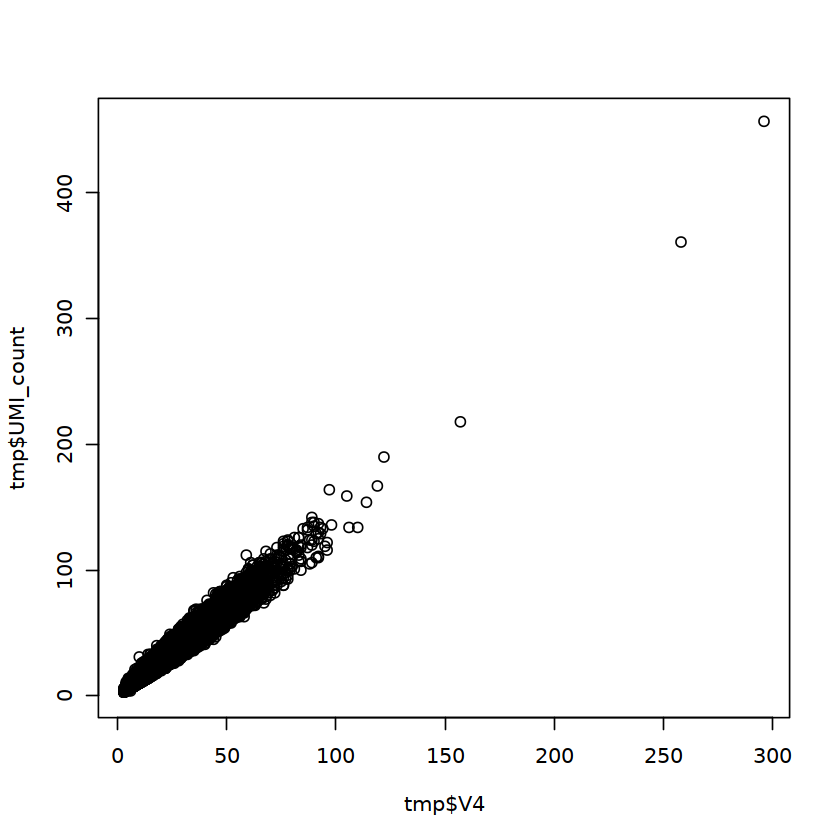

In [26]:
plot(tmp$V4, tmp$UMI_count)
cor(tmp[!is.na(tmp$V2),'V4'],
    tmp[!is.na(tmp$V2), 'UMI_count'])

# Load paper seurat object

In [27]:
all.matrix <- Read10X('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Weissman_NatBio/raw_data/GSE132080_10X/')
dim(all.matrix)

[1] 33694 23633

In [28]:
seurat.object <- CreateSeuratObject(counts = all.matrix)
seurat.object <- NormalizeData(object = seurat.object)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [29]:
rownames(GSE132080_cell_identities) <- GSE132080_cell_identities$cell_barcode
seurat.object@meta.data <- cbind(seurat.object@meta.data,
                                 GSE132080_cell_identities[rownames(seurat.object@meta.data),])
seurat.object@meta.data$KO_paper <- sapply(strsplit(seurat.object@meta.data$guide_identity, '_'), `[`, 1)

In [30]:
seurat.object.single <- subset(seurat.object, 
                               cells = rownames(seurat.object@meta.data)[which(seurat.object$number_of_cells == 1 &
                                                                               seurat.object$guide_identity != '*')])

seurat.object.single # by paper

An object of class Seurat 
33694 features across 19587 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 2 layers present: counts, data

In [31]:
table(seurat.object.single$KO_paper) # by paper
#table(seurat.object.single$guide_identity) # by paper


  ALDOA   ATP5E     BCR     CAD   CDC23   COX11    DBR1     DUT  EIF2S1   GATA1 
    528     707     729     743     693     764     922    1041     517     432 
  GINS1  GNB2L1   HSPA5   HSPA9   HSPE1    MTOR     neg  POLR1D  POLR2H     RAN 
    751     871     638     451     840     803    2110    1166     402     748 
   RPL9   RPS14   RPS15   RPS18 SEC61A1    TUBB 
    535     812     578     532     726     548 

In [32]:
rownames(cells.gRNA.single.MT.all) <- cells.gRNA.single.MT.all$V1

In [33]:
seurat.object.single@meta.data <- cbind(seurat.object.single@meta.data, cells.gRNA.single.MT.all[rownames(seurat.object.single@meta.data),])

In [34]:
sum(is.na(seurat.object.single$KO)) # not found by girafr
sum(is.na(seurat.object.single$cate))

[1] 414

[1] 414

In [35]:
seurat.object.single@meta.data$cate[is.na(seurat.object.single@meta.data$cate)] <- 'notfound'

In [36]:
seurat.object.single$KO_paper[which(seurat.object.single$KO_paper == 'neg')] <- 'non-targeting'

In [37]:
#2 cells different assignments between paper and girafr 
#seurat.object.single$found_girafr <- ifelse(is.na(seurat.object.single$KO), 'no', 
#                                            ifelse(seurat.object.single$KO_paper == seurat.object.single$KO, 'yes', 'no'))

#seurat.object.single@meta.data[which(seurat.object.single@meta.data$found_girafr == 'no' &
#                                    seurat.object.single@meta.data$cate == 'match_MT'),]
# after inspecting consensus.sequence.gRNA.txt, these 2 cells have UMIs from both gRNAs, ours has higher amount of UMIs than their papers. 
# So we assigned it more confidently.

In [38]:
seurat.object.single$found_girafr <- ifelse(is.na(seurat.object.single$KO), 'no',  'yes')
# 2 cells different assignments between paper and girafr but we give it 'yes', because the protospacer was found. 

In [39]:
seurat.object.single@meta.data$found_girafr[which(seurat.object.single@meta.data$cate == "new_MT")] <- 'new_MT'


In [40]:
table(seurat.object.single$found_girafr)


new_MT     no    yes 
   147    414  19026 

In [41]:
table(seurat.object.single@meta.data[which(seurat.object.single$found_girafr == 'no'),'KO_paper'])


        ALDOA         ATP5E           BCR           CAD         CDC23 
           14            14            17            13            18 
        COX11          DBR1           DUT        EIF2S1         GATA1 
           17            19            30             8            14 
        GINS1        GNB2L1         HSPA5         HSPA9         HSPE1 
           15            18            13             4            17 
         MTOR non-targeting        POLR1D        POLR2H           RAN 
           16            26            33             4             9 
         RPL9         RPS14         RPS15         RPS18       SEC61A1 
            9            22            18             7            25 
         TUBB 
           14 

## UpSetR compare gRNA assignment results between paper and GiRAFR

In [42]:
pipeline_Single <- cells.num_features.all$cb[which(cells.num_features.all$num_features == 1)]
pipeline_NotEmpty <- cells.num_features.all$cb
paper_single <- GSE132080_cell_identities$cell_barcode[which(GSE132080_cell_identities$number_of_cells == 1 & 
                                                            GSE132080_cell_identities$guide_identity != '*')]
#paper_NotEmpty <- GSE132080_cell_identities$cell_barcode[which(GSE132080_cell_identities$guide_identity != '*')]
paper_NotEmpty <- GSE132080_cell_identities$cell_barcode[which(GSE132080_cell_identities$guide_identity != '*' & GSE132080_cell_identities$number_of_cells != 0)]

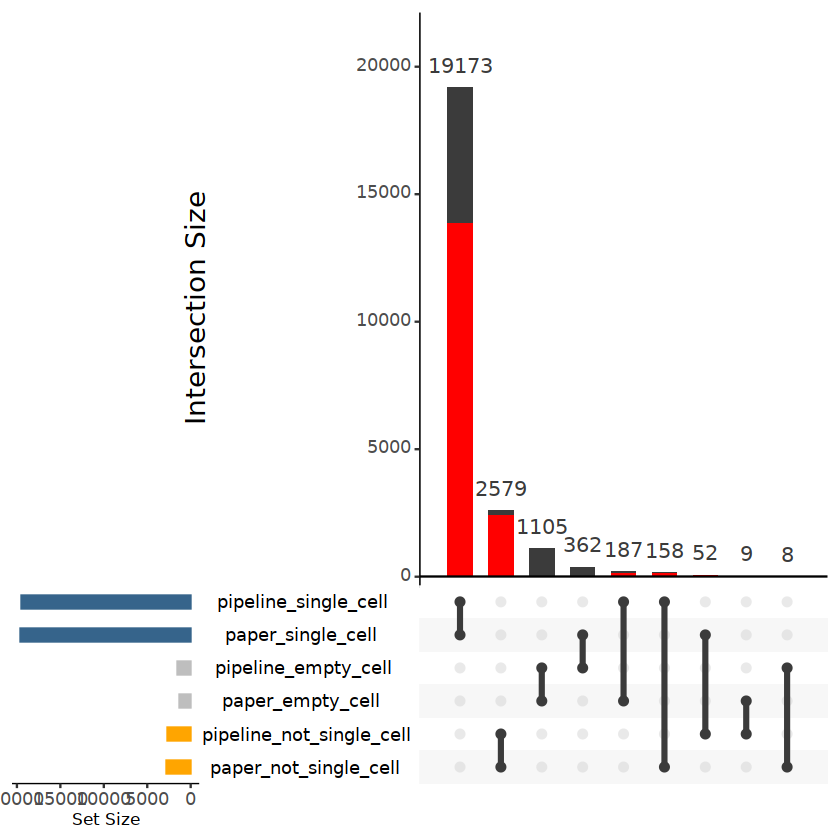

In [43]:
all_barcodes <- as.data.frame(colnames(seurat.object))
colnames(all_barcodes) <- 'cb'
all_barcodes$pipeline_single_cell <- ifelse(all_barcodes$cb %in% pipeline_Single, 1, 0)
all_barcodes$pipeline_empty_cell <- ifelse(all_barcodes$cb %in% pipeline_NotEmpty, 0, 1)
all_barcodes$pipeline_not_single_cell <- ifelse(all_barcodes$cb %in% pipeline_Single, 0,
                                            ifelse(all_barcodes$cb %in% pipeline_NotEmpty, 1, 0))

all_barcodes$paper_single_cell <- ifelse(all_barcodes$cb %in% paper_single, 1, 0)
all_barcodes$paper_empty_cell <- ifelse(all_barcodes$cb %in% paper_NotEmpty, 0, 1)
all_barcodes$paper_not_single_cell <- ifelse(all_barcodes$cb %in% paper_single, 0,
                                            ifelse(all_barcodes$cb %in% paper_NotEmpty, 1, 0))
all_barcodes <- merge(all_barcodes, cells.has_MT.all, by.x = 'cb', by.y = 'cb', all.x = TRUE)

#table(all_barcodes$pipeline_single_cell, all_barcodes$has_MT)
#table(all_barcodes$has_MT)

Myfunc <- function(row) {data <- (row["has_MT"] == TRUE)}
p <- upset(data = all_barcodes,
      queries = list(list(query = Myfunc, color = "red", active = T)),
      sets = c('paper_not_single_cell','pipeline_not_single_cell',
           'paper_empty_cell','pipeline_empty_cell',
           'paper_single_cell','pipeline_single_cell'), order.by = "freq",keep.order = TRUE,sets.bar.color=c("orange","orange","grey","grey","steelblue4","steelblue4"),
      point.size =2.5,line.size = 1.3,text.scale = c(2, 1.5, 1.2, 1.5, 1.5, 2))
print(p)

In [44]:
new_doublets <- all_barcodes[which(all_barcodes$pipeline_not_single_cell == 1 & all_barcodes$paper_not_single_cell !=1), 'cb']
length(new_doublets) 
# pipeline identified doubets

table(seurat.object@meta.data[new_doublets,'KO_paper'])

[1] 61


  ALDOA   ATP5E     BCR     CAD   CDC23   COX11    DBR1     DUT  EIF2S1   GATA1 
      4       2       4       2       2       3       4       4       1       1 
  GINS1  GNB2L1   HSPA9   HSPE1    MTOR     neg  POLR1D  POLR2H     RAN   RPS14 
      1       1       1       2       2       7       6       1       2       4 
  RPS15 SEC61A1    TUBB 
      5       1       1 

In [46]:
consensus.matrix <- read.table('./GiRAFR_outputs/Jost_NatureBiotechnology/sample1/consensus.count.matrix', header = TRUE)
dim(consensus.matrix)
consensus.count <- colSums(consensus.matrix[,-1])

[1] 1949 8327

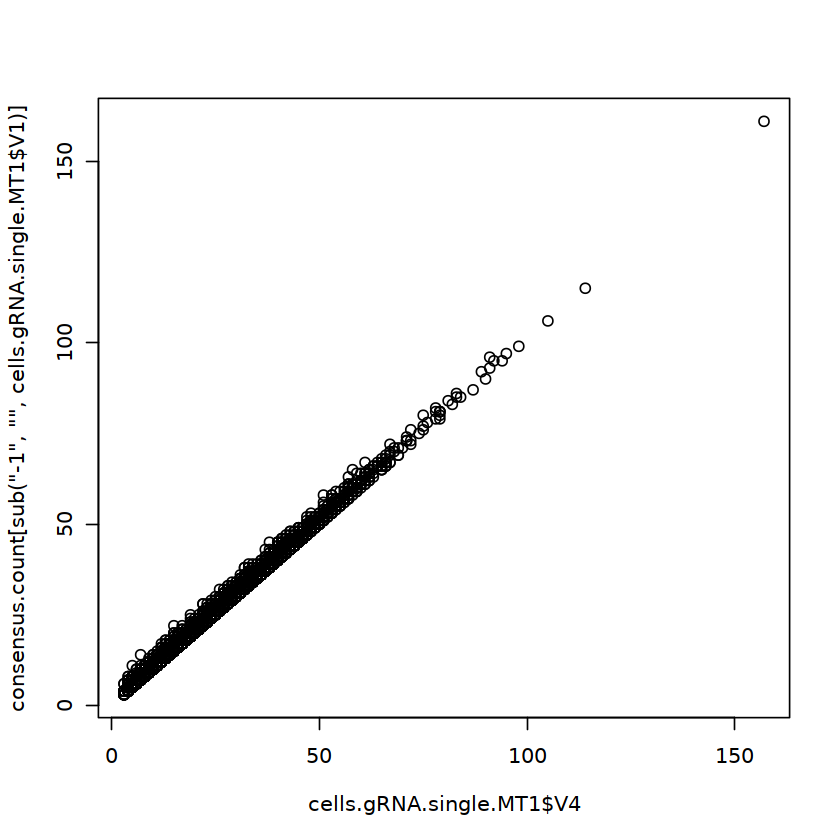

In [47]:
plot(cells.gRNA.single.MT1$V4, consensus.count[sub('-1','',cells.gRNA.single.MT1$V1)])

# Check how many gRNA found by GiRAFR: notfound, new_MT, match_MT

`summarise()` has grouped output by 'KO_paper'. You can override using the
`.groups` argument.
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


[1] 14113     3

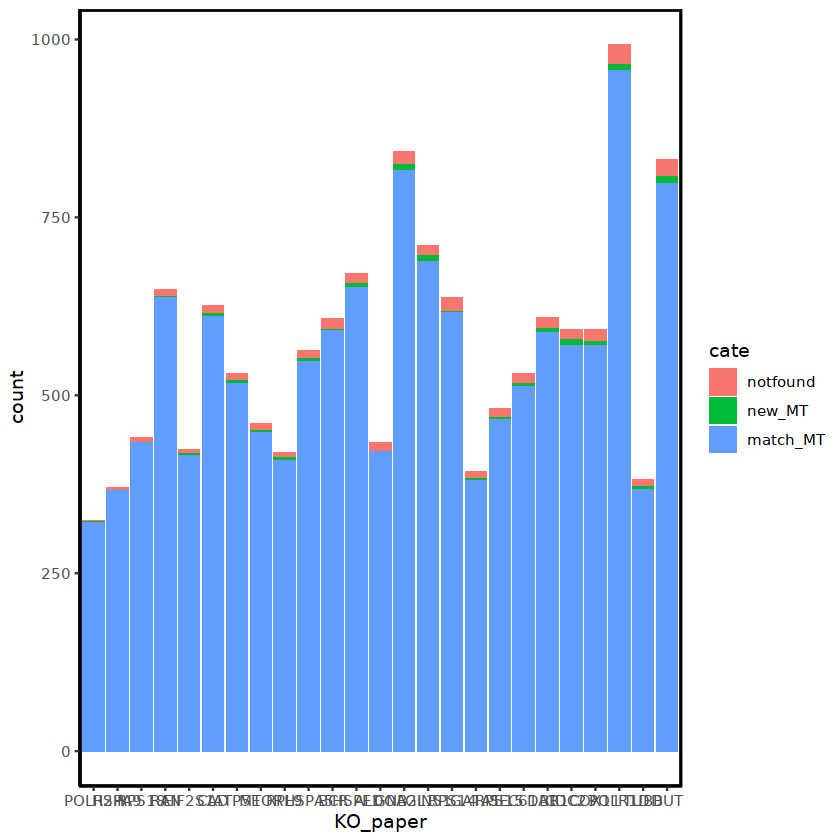

In [48]:
#tmp.df <- seurat.object.single@meta.data[which(seurat.object.single@meta.data$KO_paper != 'non-targeting' &
#                                              seurat.object.single@meta.data$cate != 'WT' ),]

# when cate is notfound, it might also be wild type gRNAs
tmp.df <- seurat.object.single@meta.data[which(seurat.object.single@meta.data$KO_paper != 'non-targeting' &
                                              seurat.object.single@meta.data$cate != 'WT' &
                                              !grepl('_00', seurat.object.single@meta.data$guide_identity)),]


tmp.df <- subset(tmp.df, select = c('cell_barcode','KO_paper','cate'))

portion.df <- tmp.df %>% group_by(KO_paper, cate)%>% 
summarise(n = n()) %>% group_by(KO_paper) %>% 
summarise(portion = sum(n[cate == 'match_MT'])/sum(n))

tmp.df$cate <- factor(tmp.df$cate , levels = c('notfound','new_MT','match_MT'))

#pdf('Weissman_girafr_found_barplot.pdf', width = 20, height = 10)
ggplot(tmp.df, 
       aes(x = KO_paper, fill = cate))+geom_bar()+theme_classic()+
scale_x_discrete(limits = c(portion.df[order(portion.df$portion, decreasing = TRUE),]$KO_paper))+
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))
#dev.off()

dim(tmp.df)

In [49]:
save.df <- tmp.df %>% group_by(KO_paper, cate)%>% 
summarise(n = n())
#write.csv(save.df, file = 'Weissman_girafr_found_barplot.csv', quote = FALSE, row.names = FALSE)

`summarise()` has grouped output by 'KO_paper'. You can override using the
`.groups` argument.


In [50]:
table(tmp.df$cate)[1]

notfound 
     312

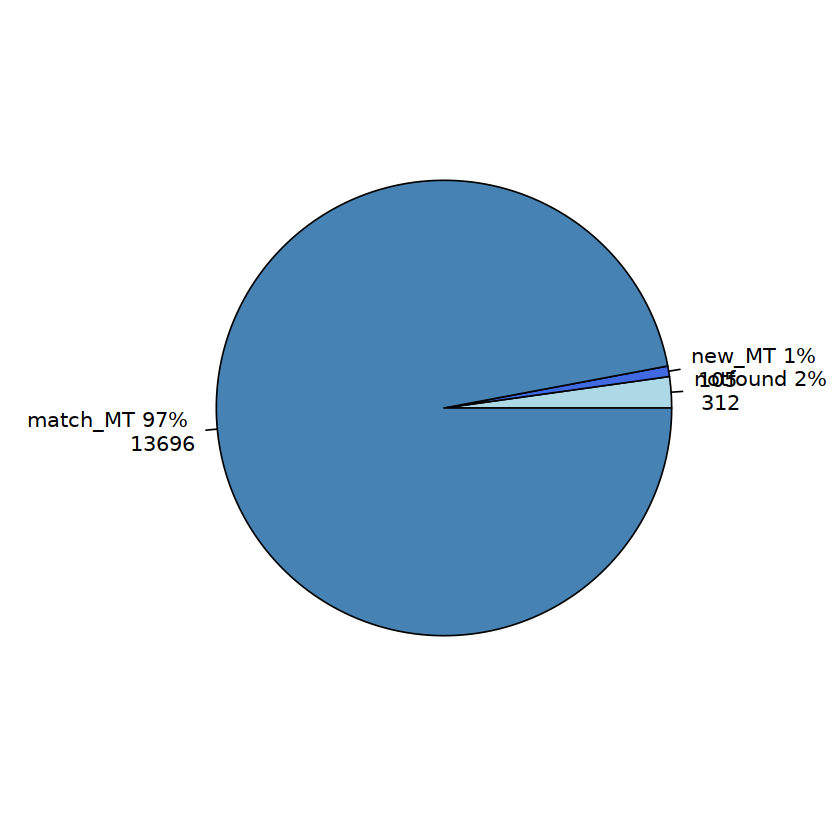

In [51]:
#pdf('Weissman_girafr_found_pie.pdf', width = 8, height = 8)
slices <- c(table(tmp.df$cate)[1],
            table(tmp.df$cate)[2],
            table(tmp.df$cate)[3])
lbls <- c('notfound', 'new_MT','match_MT')
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
lbls <- paste(lbls, '\n',slices, sep =' ')
pie(slices,labels = lbls, cex = 1,radius = 0.8, col = c('lightblue','royalblue','steelblue'))
#dev.off()

In [52]:
table(tmp.df$cate)[1]/sum(table(tmp.df$cate))
table(tmp.df$cate)[2]/sum(table(tmp.df$cate))
table(tmp.df$cate)[3]/sum(table(tmp.df$cate))

notfound 
0.02210728

new_MT 
0.007439949

match_MT 
0.9704528

In [53]:
table(tmp.df$cate)[2]

new_MT 
   105

In [54]:
#table(cells.num_features.all[cells.num_features.all$cb %in% tmp.df[which(tmp.df$cate == 'notfound'),'cell_barcode'],]$num_features)
# 46 not found cells are identified by girafr as multiplets

In [55]:
tmp.df$cate2 <- as.character(tmp.df$cate)
tmp.df$cate2[which(tmp.df$cate2 == 'notfound' & (tmp.df$cell_barcode %in% cells.num_features.all$cb))] <- 'multiplets'

In [56]:
table(tmp.df$cate2)

(table(tmp.df$cate2)[1] + table(tmp.df$cate2)[2] + table(tmp.df$cate2)[3])/sum(table(tmp.df$cate2))



  match_MT multiplets     new_MT   notfound 
     13696         37        105        275 

match_MT 
0.9805144

In [57]:
table(tmp.df$cate2)[4]/sum(table(tmp.df$cate2))

notfound 
0.01948558

In [58]:
cb.tmp <- tmp.df[which(tmp.df$cate2 == 'notfound'),'cell_barcode']
length(cb.tmp)
save(cb.tmp, file ='cb.tmp.Rda')
rm(cb.tmp)

[1] 275

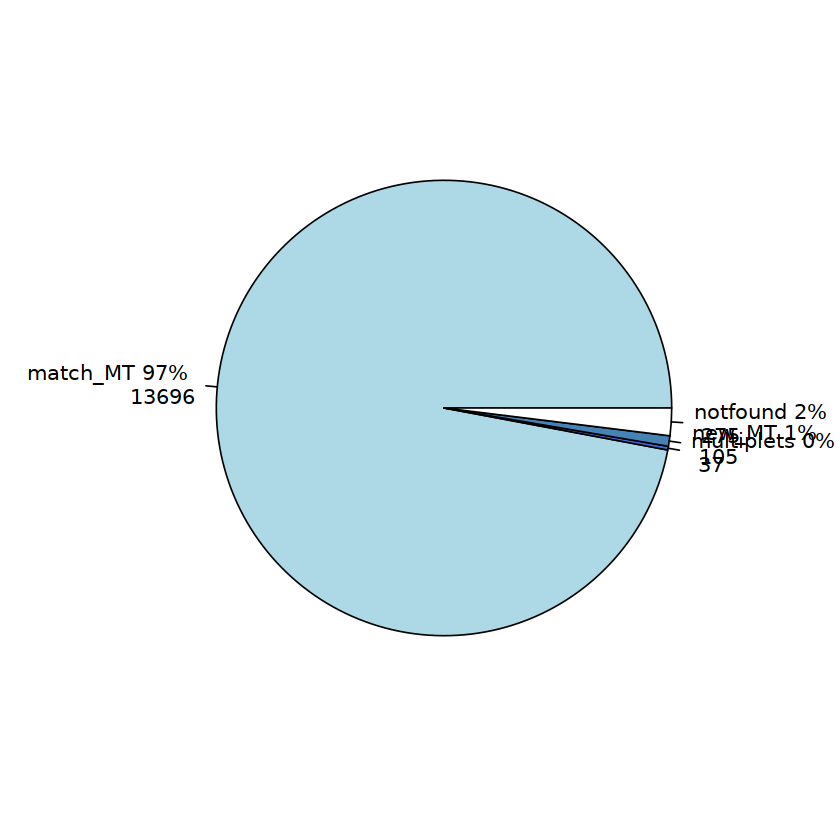

In [59]:
#pdf('Weissman_girafr_found_pie2.pdf', width = 8, height = 8)
slices <- c(table(tmp.df$cate2)[1],
            table(tmp.df$cate2)[2],
            table(tmp.df$cate2)[3],
           table(tmp.df$cate2)[4])
lbls <- c("match_MT", "multiplets","new_MT","notfound")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
lbls <- paste(lbls, '\n',slices, sep =' ')
pie(slices,labels = lbls, cex = 1,radius = 0.8, col = c('lightblue','royalblue','steelblue','white'))
#dev.off()

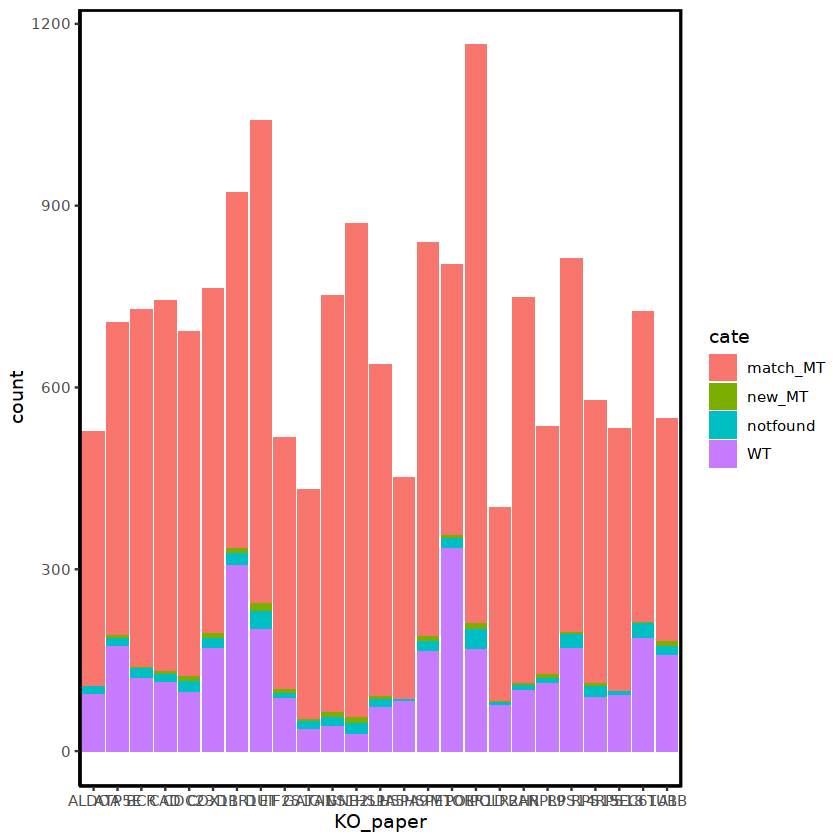

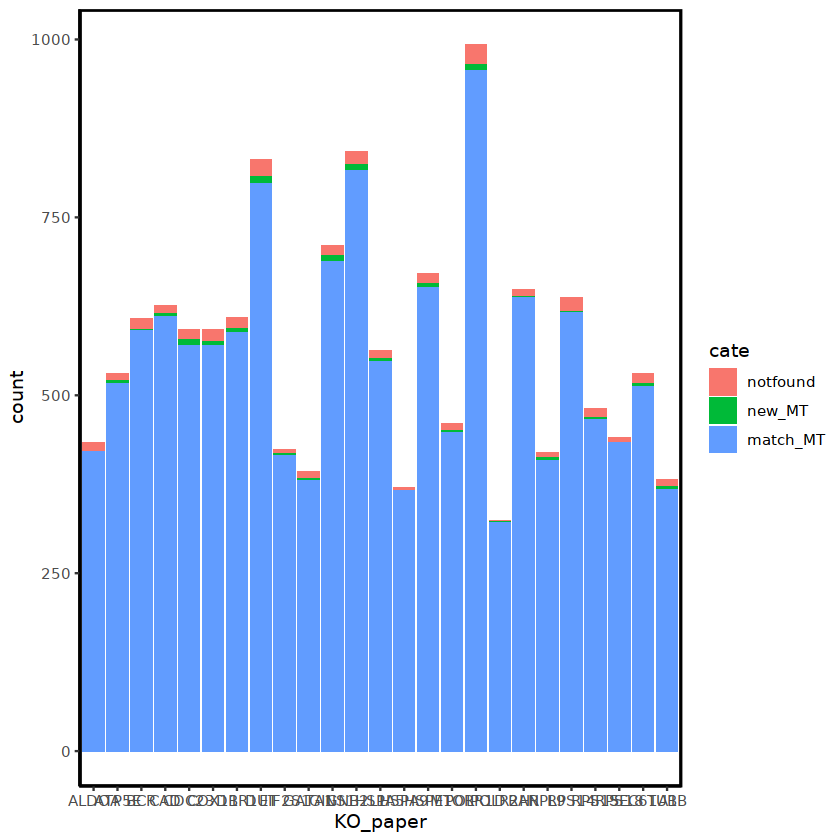

In [60]:
#options(repr.plot.width=20,repr.plot.height=10)

ggplot(seurat.object.single@meta.data[which(seurat.object.single@meta.data$KO_paper != 'non-targeting'),], 
       aes(x = KO_paper, fill = cate))+geom_bar()+theme_classic()+
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))


ggplot(tmp.df, 
       aes(x = KO_paper, fill = cate))+geom_bar()+theme_classic()+
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))

In [61]:
table(seurat.object.single$KO_paper, seurat.object.single$found_girafr)

               
                new_MT   no  yes
  ALDOA              0   14  514
  ATP5E              4   14  689
  BCR                2   17  710
  CAD                6   13  724
  CDC23              8   18  667
  COX11              8   17  739
  DBR1               8   19  895
  DUT               13   30  998
  EIF2S1             6    8  503
  GATA1              3   14  415
  GINS1              8   15  728
  GNB2L1             9   18  844
  HSPA5              5   13  620
  HSPA9              0    4  447
  HSPE1              8   17  815
  MTOR               5   16  782
  non-targeting     14   26 2070
  POLR1D             9   33 1124
  POLR2H             1    4  397
  RAN                2    9  737
  RPL9               7    9  519
  RPS14              4   22  786
  RPS15              5   18  555
  RPS18              0    7  525
  SEC61A1            3   25  698
  TUBB               9   14  525

# Recreate paper violin plot - KO expression

In [62]:
Idents(seurat.object.single) <- 'KO_paper'
seurat.object.subset <- subset(seurat.object.single, idents = c('non-targeting', 'HSPA9'))
seurat.object.subset

An object of class Seurat 
33694 features across 2561 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 2 layers present: counts, data

In [63]:
tmp <- GSE132080_sgRNA_barcode_sequences_and_phenotypes[which(GSE132080_sgRNA_barcode_sequences_and_phenotypes$gene == 'HSPA9'),]
tmp$sgRNA_name2 <- paste0(tmp$gene, '_',tmp$sgRNA_name)
rownames(tmp) <- tmp$sgRNA_name2


In [64]:
table(seurat.object.subset$KO_paper)


        HSPA9 non-targeting 
          451          2110 

In [65]:
seurat.object.subset$KO2 <- seurat.object.subset$guide_identity
seurat.object.subset$KO2[which(seurat.object.subset$KO_paper == 'non-targeting')] <- 'non-targeting'

In [66]:
table(seurat.object.subset$KO2)


HSPA9_HSPA9_-_137911079.23-P1P2_00 HSPA9_HSPA9_-_137911079.23-P1P2_02 
                                81                                 67 
HSPA9_HSPA9_-_137911079.23-P1P2_04 HSPA9_HSPA9_-_137911079.23-P1P2_07 
                               143                                 92 
HSPA9_HSPA9_-_137911079.23-P1P2_08                      non-targeting 
                                68                               2110 

In [67]:
seurat.object.subset@meta.data$activity <- 0
seurat.object.subset@meta.data$activity[which(seurat.object.subset@meta.data$KO2 != 'non-targeting')] <- tmp[seurat.object.subset@meta.data$KO2[which(seurat.object.subset@meta.data$KO2 != 'non-targeting')],'relative_activity_day5']


In [68]:
seurat.object.subset@meta.data$KO2 <- factor(seurat.object.subset@meta.data$KO2, levels = c('non-targeting', tmp[order(tmp$relative_activity_day5),'sgRNA_name2']))


The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



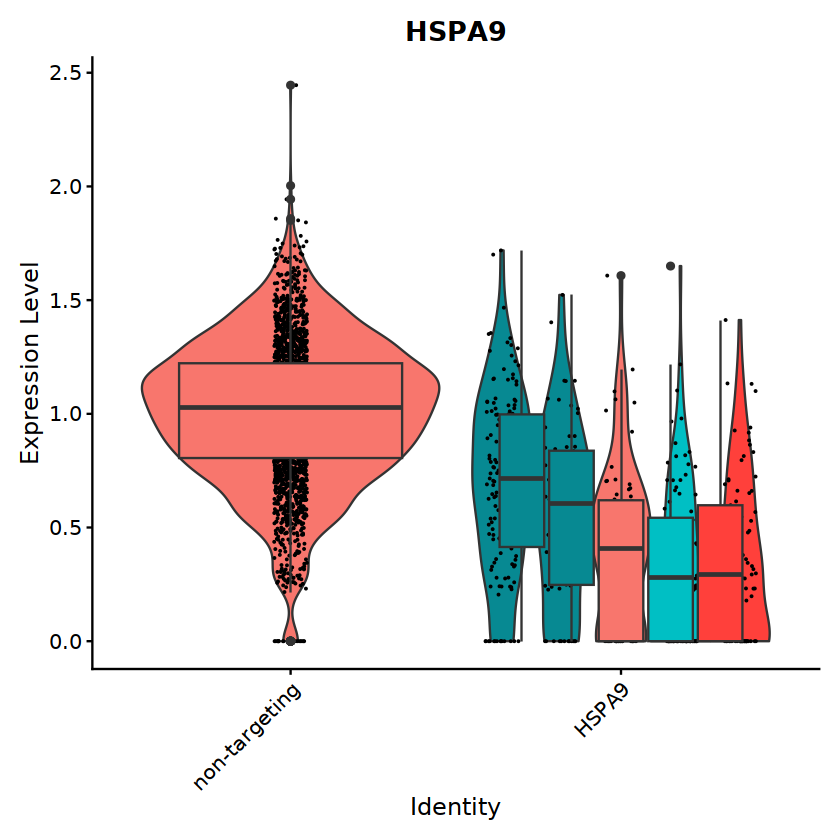

In [69]:
VlnPlot(seurat.object.subset, features = c('HSPA9'), 
        split.by = 'KO2')+NoLegend()+geom_boxplot()

# Create seurat.object.girafr from seurat.object

In [70]:
seurat.object.girafr <- seurat.object
seurat.object.girafr.single <- subset(seurat.object.girafr, cells = cells.gRNA.single.MT.all$V1)


In [71]:
seurat.object.girafr.single@meta.data <- cbind(seurat.object.girafr.single@meta.data, cells.gRNA.single.MT.all[rownames(seurat.object.girafr.single@meta.data),])
colnames(seurat.object.girafr.single@meta.data)[19] <- 'KO_girafr'


In [72]:
table(seurat.object.girafr.single@meta.data$cate)
sum(table(seurat.object.girafr.single@meta.data$cate)) # total single cells found by girafr


match_MT   new_MT       WT 
   13922      167     5429 

[1] 19518

In [73]:
table(seurat.object.girafr.single@meta.data$KO_girafr)


        ALDOA         ATP5E           BCR           CAD         CDC23 
          524           704           724           740           686 
        COX11          DBR1           DUT        EIF2S1         GATA1 
          764           911          1029           517           447 
        GINS1        GNB2L1         HSPA5         HSPA9         HSPE1 
          748           871           635           451           828 
         MTOR non-targeting        POLR1D        POLR2H           RAN 
          801          2115          1152           415           750 
         RPL9         RPS14         RPS15         RPS18       SEC61A1 
          533           801           572           536           713 
         TUBB 
          551 

## HSPA9

In [74]:
Idents(seurat.object.girafr.single) <- 'KO_girafr'
seurat.object.girafr.subset <- subset(seurat.object.girafr.single, idents = c('non-targeting', 'HSPA9'))
seurat.object.girafr.subset$V3[grepl('non-targeting',seurat.object.girafr.subset$V3)] <- 'non-targeting'
seurat.object.girafr.subset

An object of class Seurat 
33694 features across 2566 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 2 layers present: counts, data

In [75]:
table(seurat.object.girafr.subset$cate)


match_MT   new_MT       WT 
     369       16     2181 

In [76]:
table(seurat.object.girafr.subset@meta.data[which(seurat.object.girafr.subset$KO_girafr == 'HSPA9'),'cate'])


match_MT   new_MT       WT 
     369        1       81 

Only 1 cell is new MT found in girafr

In [77]:
table(seurat.object.girafr.subset@meta.data[which(!seurat.object.girafr.subset$V3 
                                                  %in% c('non-targeting','HSPA9_-_137911079.23-P1P2_00_gene_WT')),'V5'])



        gRNA:10A          gRNA:4T          gRNA:8T          gRNA:9G 
             141               68               68               92 
U6:106A,gRNA:10A 
               1 

## RPL19

In [78]:
Idents(seurat.object.girafr.single) <- 'KO_girafr'
seurat.object.girafr.subset <- subset(seurat.object.girafr.single, idents = c('non-targeting', 'RPL9'))
seurat.object.girafr.subset$V3[grepl('non-targeting',seurat.object.girafr.subset$V3)] <- 'non-targeting'
seurat.object.girafr.subset

An object of class Seurat 
33694 features across 2648 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 2 layers present: counts, data

In [79]:
table(seurat.object.girafr.subset@meta.data[which(seurat.object.girafr.subset$KO_girafr == 'RPL9'),'cate'])


match_MT   new_MT       WT 
     413        9      111 

In [80]:
seurat.object.girafr.subset@meta.data[which(seurat.object.girafr.subset@meta.data$cate == 'new_MT' &
                                            seurat.object.girafr.subset@meta.data$KO_girafr == 'RPL9'),]


orig.ident    nCount_RNA nFeature_RNA cell_barcode      
ACACCCTGTGCAGTAG-1 SeuratProject 34159      5007         ACACCCTGTGCAGTAG-1
CGCCAAGGTTACGTCA-1 SeuratProject 32195      4685         CGCCAAGGTTACGTCA-1
GGTGCGTAGCTAGGCA-1 SeuratProject 23041      3959         GGTGCGTAGCTAGGCA-1
GTCGGGTAGTTAAGTG-1 SeuratProject 16054      3057         GTCGGGTAGTTAAGTG-1
TACTTACCATTGCGGC-1 SeuratProject 23984      4347         TACTTACCATTGCGGC-1
TCAGGTAAGTCGATAA-1 SeuratProject 23218      4238         TCAGGTAAGTCGATAA-1
GAGTCCGCAAGCTGGA-2 SeuratProject 36552      4908         GAGTCCGCAAGCTGGA-2
GTGCGGTAGTGAAGAG-2 SeuratProject 28916      4362         GTGCGGTAGTGAAGAG-2
CGCCAAGTCGTAGGTT-3 SeuratProject 42812      5287         CGCCAAGTCGTAGGTT-3
                   guide_identity                  read_count UMI_count
ACACCCTGTGCAGTAG-1 RPL9_RPL9_+_39460483.23-P1P2_01  673       40       
CGCCAAGGTTACGTCA-1 RPL9_RPL9_+_39460483.23-P1P2_00  157       15       
GGTGCGTAGCTAGGCA-1 RPL9_RPL9_+_39460483.23-P1P2_00  296       15       
GTCGGGTAGTTAAGTG-1 RPL9_RPL9_+_39460483.23-P1P2_00  414       36       
TACTTACCATTGCGGC-1 RPL9_RPL9_+_39460483.23-P1P2_05  422       20       
TCAGGTAAGTCGATAA-1 RPL9_RPL9_+_39460483.23-P1P2_05  319       35       
GAGTCCGCAAGCTGGA-2 RPL9_RPL9_+_39460483.23-P1P2_05  808       27       
GTGCGGTAGTGAAGAG-2 RPL9_RPL9_+_39460483.23-P1P2_01  344       17       
CGCCAAGTCGTAGGTT-3 RPL9_RPL9_+_39460483.23-P1P2_07 1038       57       
                   coverage  gemgroup good_coverage ⋯ V4 V5              
ACACCCTGTGCAGTAG-1 16.825000 1        True          ⋯ 29 gRNA:5A,Rest:8A 
CGCCAAGGTTACGTCA-1 10.466667 1        False         ⋯  7 gRNA:0A         
GGTGCGTAGCTAGGCA-1 19.733333 1        True          ⋯ 12 gRNA:8T         
GTCGGGTAGTTAAGTG-1 11.500000 1        True          ⋯ 28 gRNA:18A        
TACTTACCATTGCGGC-1 21.100000 1        True          ⋯ 16 gRNA:7A,gRNA:9G 
TCAGGTAAGTCGATAA-1  9.114286 1        False         ⋯ 29 gRNA:9G,gRNA:12A
GAGTCCGCAAGCTGGA-2 29.925926 2        True          ⋯ 19 gRNA:9G         
GTGCGGTAGTGAAGAG-2 20.235294 2        True          ⋯ 13 gRNA:5A,gRNA:18A
CGCCAAGTCGTAGGTT-3 18.210526 3        True          ⋯ 41 U6:108A,gRNA:11C
                   V6                                                                                                
ACACCCTGTGCAGTAG-1 GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTGGGATGATTCTGTGCTCGTGGGTTTAAGAACTAAGCTGGAAACAGCATAGCAAGTT
CGCCAAGGTTACGTCA-1 GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTGAGATGTTTCTGTGCTCGTGGGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT
GGTGCGTAGCTAGGCA-1 GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTGGGATGTTTTTGTGCTCGTGGGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT
GTCGGGTAGTTAAGTG-1 GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTGGGATGTTTCTGTGCTCGTAGGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT
TACTTACCATTGCGGC-1 GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTGGGATGTTACGGTGCTCGTGGGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT
TCAGGTAAGTCGATAA-1 GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTGGGATGTTTCGGTACTCGTGGGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT
GAGTCCGCAAGCTGGA-2 GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTGGGATGTTTCGGTGCTCGTGGGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGCT
GTGCGGTAGTGAAGAG-2 GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTGGGATGATTCTGTGCTCGTAGGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT
CGCCAAGTCGTAGGTT-3 GTGTTTTGAGACTATAAGTATCCCTTGGAGAACCACCTTGTTAGGATGTTTCTGCGCTCGTGGGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT
                   KO_girafr sgRNA_name gamma_day5 gamma_day10
ACACCCTGTGCAGTAG-1 RPL9      NA         NA         NA         
CGCCAAGGTTACGTCA-1 RPL9      NA         NA         NA         
GGTGCGTAGCTAGGCA-1 RPL9      NA         NA         NA         
GTCGGGTAGTTAAGTG-1 RPL9      NA         NA         NA         
TACTTACCATTGCGGC-1 RPL9      NA         NA         NA         
TCAGGTAAGTCGATAA-1 RPL9      NA         NA         NA         
GAGTCCGCAAGCTGGA-2 RPL9      NA         NA         NA         
GTGCGGTAGTGAAGAG-2 RPL9      NA         NA         NA         
CGCCAAGTCGTAGGTT-3 RPL9      NA         NA         N

9 new MT cells for RPL9 => sgRNA_name is NA

In [81]:
table(seurat.object.girafr.subset@meta.data[which(!seurat.object.girafr.subset$V3 %in% c('non-targeting',
                                                                                         'RPL9_+_39460483.23-P1P2_00_gene_WT')),'V5'])



         gRNA:0A         gRNA:11C         gRNA:18A          gRNA:5A 
               1              154                1               68 
gRNA:5A,gRNA:18A  gRNA:5A,Rest:8A  gRNA:7A,gRNA:9G          gRNA:8T 
               1                1                1                1 
         gRNA:9A          gRNA:9G gRNA:9G,gRNA:12A U6:108A,gRNA:11C 
              97               95                1                1 

In [82]:
table(seurat.object.girafr.subset$guide_identity, seurat.object.girafr.subset$cate)

                                 
                                  match_MT new_MT  WT
  neg_ctrl_non-targeting_00001           0      1 160
  neg_ctrl_non-targeting_00028           0      2 203
  neg_ctrl_non-targeting_00054           0      2 276
  neg_ctrl_non-targeting_00089           0      2 243
  neg_ctrl_non-targeting_00217           0      2 246
  neg_ctrl_non-targeting_00283           0      2 188
  neg_ctrl_non-targeting_00406           0      3 223
  neg_ctrl_non-targeting_00527           0      1 157
  neg_ctrl_non-targeting_00802           0      0 166
  neg_ctrl_non-targeting_01040           0      0 238
  RPL9_RPL9_+_39460483.23-P1P2_00        0      3 111
  RPL9_RPL9_+_39460483.23-P1P2_01       68      2   0
  RPL9_RPL9_+_39460483.23-P1P2_04       97      0   0
  RPL9_RPL9_+_39460483.23-P1P2_05       94      3   0
  RPL9_RPL9_+_39460483.23-P1P2_07      154      1   0

In [83]:
tmp <- GSE132080_sgRNA_barcode_sequences_and_phenotypes[which(GSE132080_sgRNA_barcode_sequences_and_phenotypes$gene == 'RPL9'),]
tmp$sgRNA_name2 <- paste0(tmp$gene, '_',tmp$sgRNA_name)
rownames(tmp) <- tmp$sgRNA_name2

In [84]:
seurat.object.girafr.subset$KO2 <- seurat.object.girafr.subset$guide_identity
 seurat.object.girafr.subset$KO2[which(seurat.object.girafr.subset$KO_paper == 'non-targeting')] <- 'non-targeting'

In [85]:
seurat.object.girafr.subset@meta.data$activity <- 0
seurat.object.girafr.subset@meta.data$activity[which(seurat.object.girafr.subset@meta.data$KO2 != 'neg')] <- tmp[seurat.object.girafr.subset@meta.data$KO2[which(seurat.object.girafr.subset@meta.data$KO2 != 'non-targeting')],'relative_activity_day5']


In [86]:
seurat.object.girafr.subset@meta.data$sgRNA_name <- factor(seurat.object.girafr.subset@meta.data$sgRNA_name, 
                                                    levels = c('neg',tmp[order(tmp$relative_activity_day5),'sgRNA_name']))


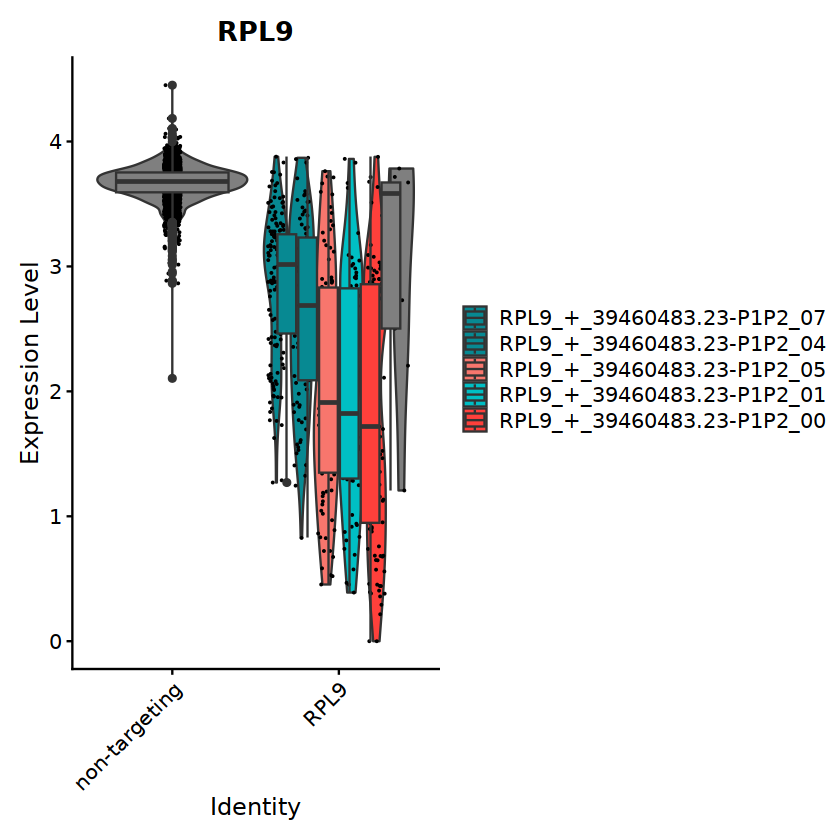

In [87]:
VlnPlot(seurat.object.girafr.subset, features = 'RPL9', split.by = 'sgRNA_name')+geom_boxplot()
#VlnPlot(seurat.object.girafr.subset, features = 'RPL9', split.by = 'KO2')+geom_boxplot()

## others

In [88]:
table(cells.gRNA.single.MT.all[which(cells.gRNA.single.MT.all$cate == 'new_MT' &
                         cells.gRNA.single.MT.all$KO != 'non-targeting'),'KO'])


  ATP5E     BCR     CAD   CDC23   COX11    DBR1     DUT  EIF2S1   GATA1   GINS1 
      5       3       7      10       9       8      14       6       5       8 
 GNB2L1   HSPA5   HSPA9   HSPE1    MTOR  POLR1D  POLR2H     RAN    RPL9   RPS14 
     10       5       1       8       5       9       1       2       9       4 
  RPS15   RPS18 SEC61A1    TUBB 
      6       1       4      12 

In [89]:
hight_MT_targets <- names(table(cells.gRNA.single.MT.all[which(cells.gRNA.single.MT.all$cate == 'new_MT' &
                         cells.gRNA.single.MT.all$KO != 'non-targeting'),'KO']))[
    table(cells.gRNA.single.MT.all[which(cells.gRNA.single.MT.all$cate == 'new_MT' &
                         cells.gRNA.single.MT.all$KO != 'non-targeting'),'KO']) >=5]
hight_MT_targets

[1] "ATP5E"  "CAD"    "CDC23"  "COX11"  "DBR1"   "DUT"    "EIF2S1" "GATA1" 
 [9] "GINS1"  "GNB2L1" "HSPA5"  "HSPE1"  "MTOR"   "POLR1D" "RPL9"   "RPS15" 
[17] "TUBB"

Number of cells with new MT found by girafr

In [90]:
length(unique(GSE132080_sgRNA_barcode_sequences_and_phenotypes$gene))

[1] 25

In [91]:
table(seurat.object.girafr.subset@meta.data[which(!seurat.object.girafr.subset$V3 %in% c('non-targeting',
                                                                                         'RPL9_+_39460483.23-P1P2_00_gene_WT')),'V5'])



         gRNA:0A         gRNA:11C         gRNA:18A          gRNA:5A 
               1              154                1               68 
gRNA:5A,gRNA:18A  gRNA:5A,Rest:8A  gRNA:7A,gRNA:9G          gRNA:8T 
               1                1                1                1 
         gRNA:9A          gRNA:9G gRNA:9G,gRNA:12A U6:108A,gRNA:11C 
              97               95                1                1 

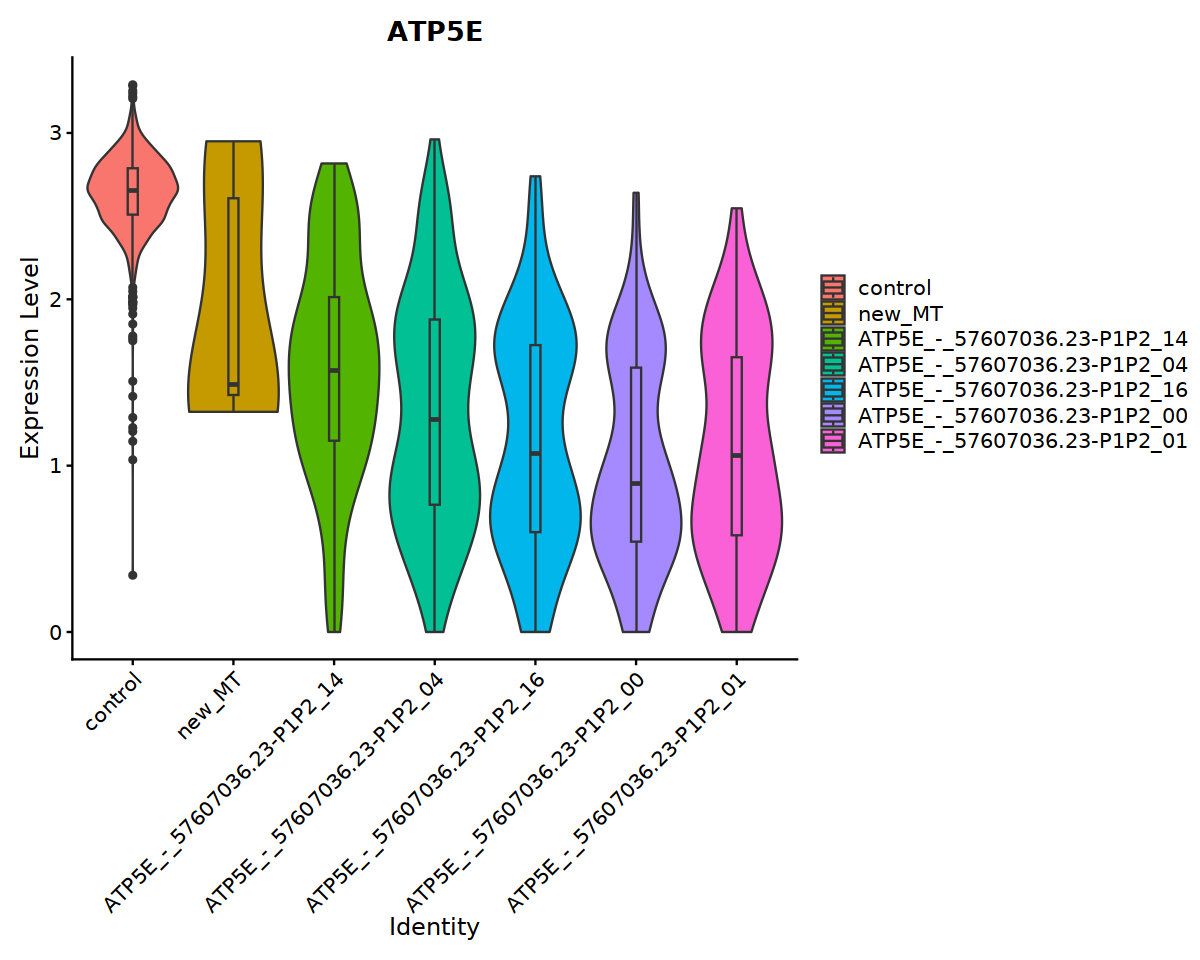

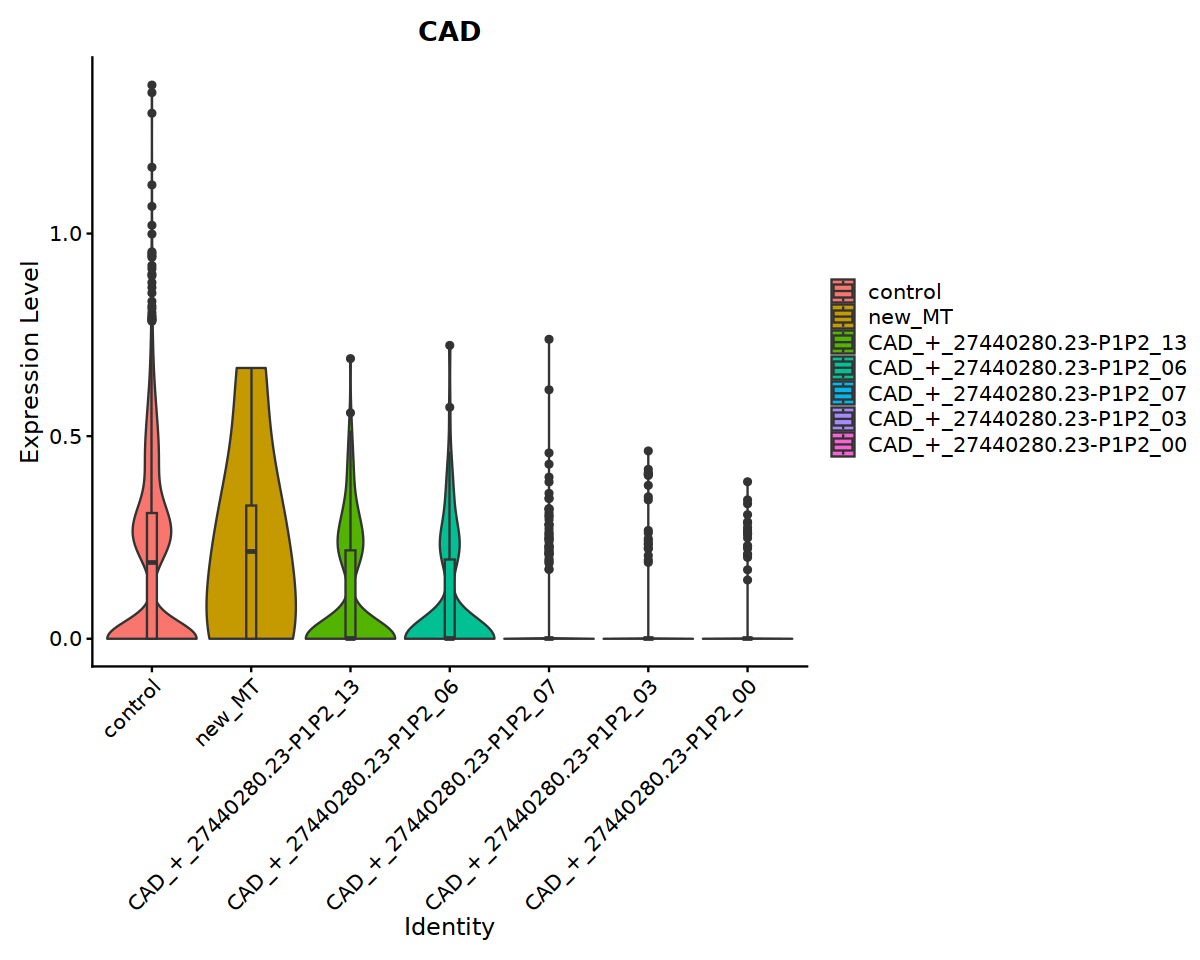

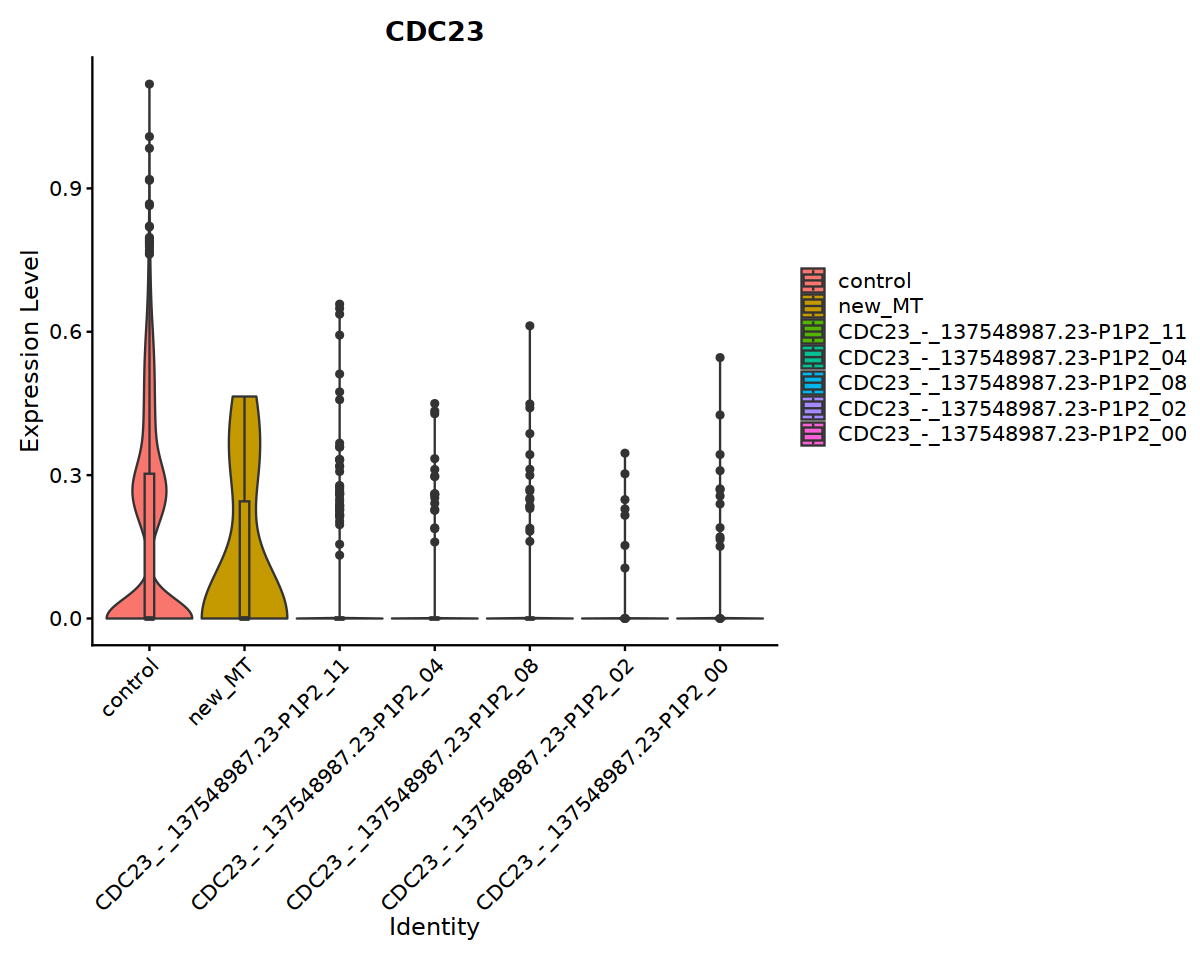

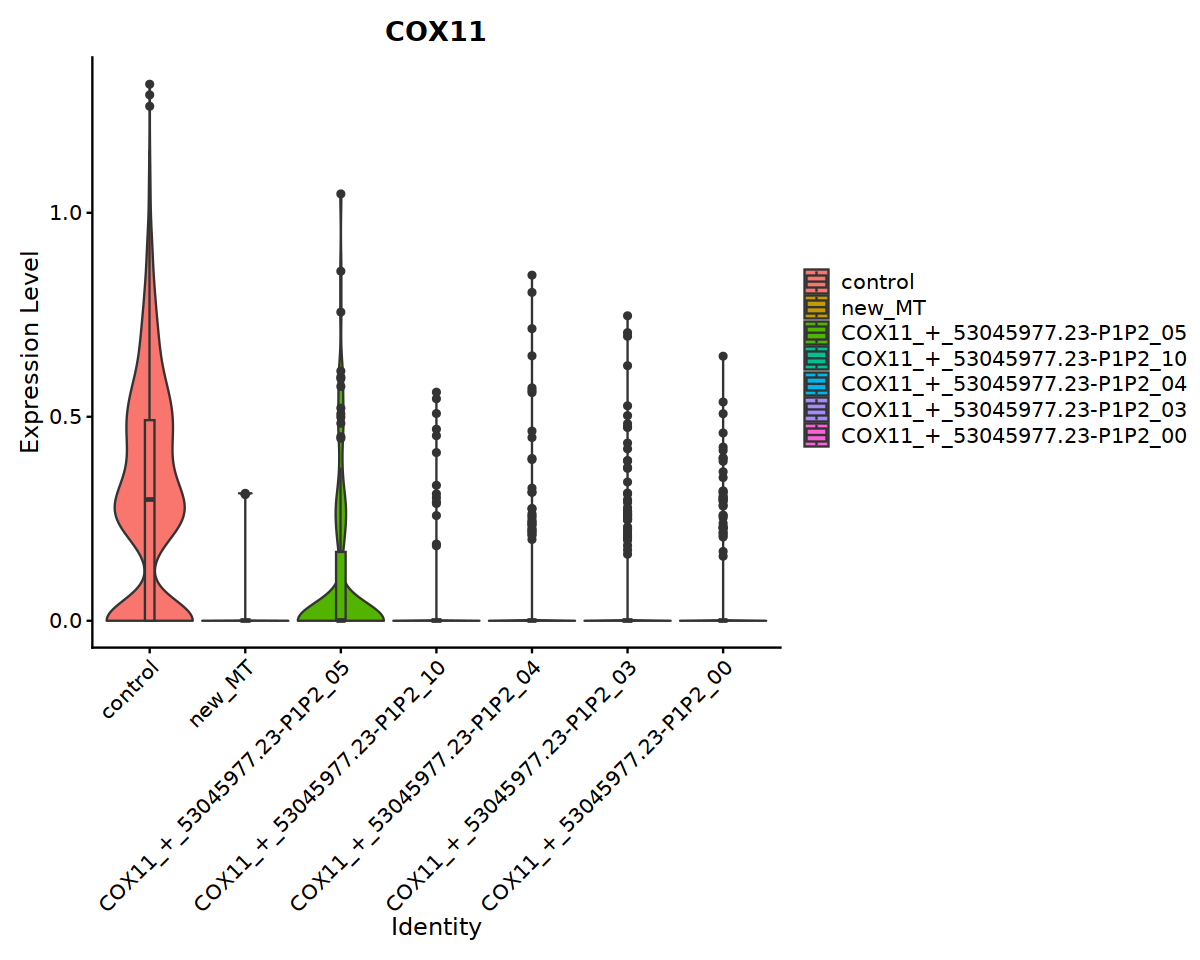

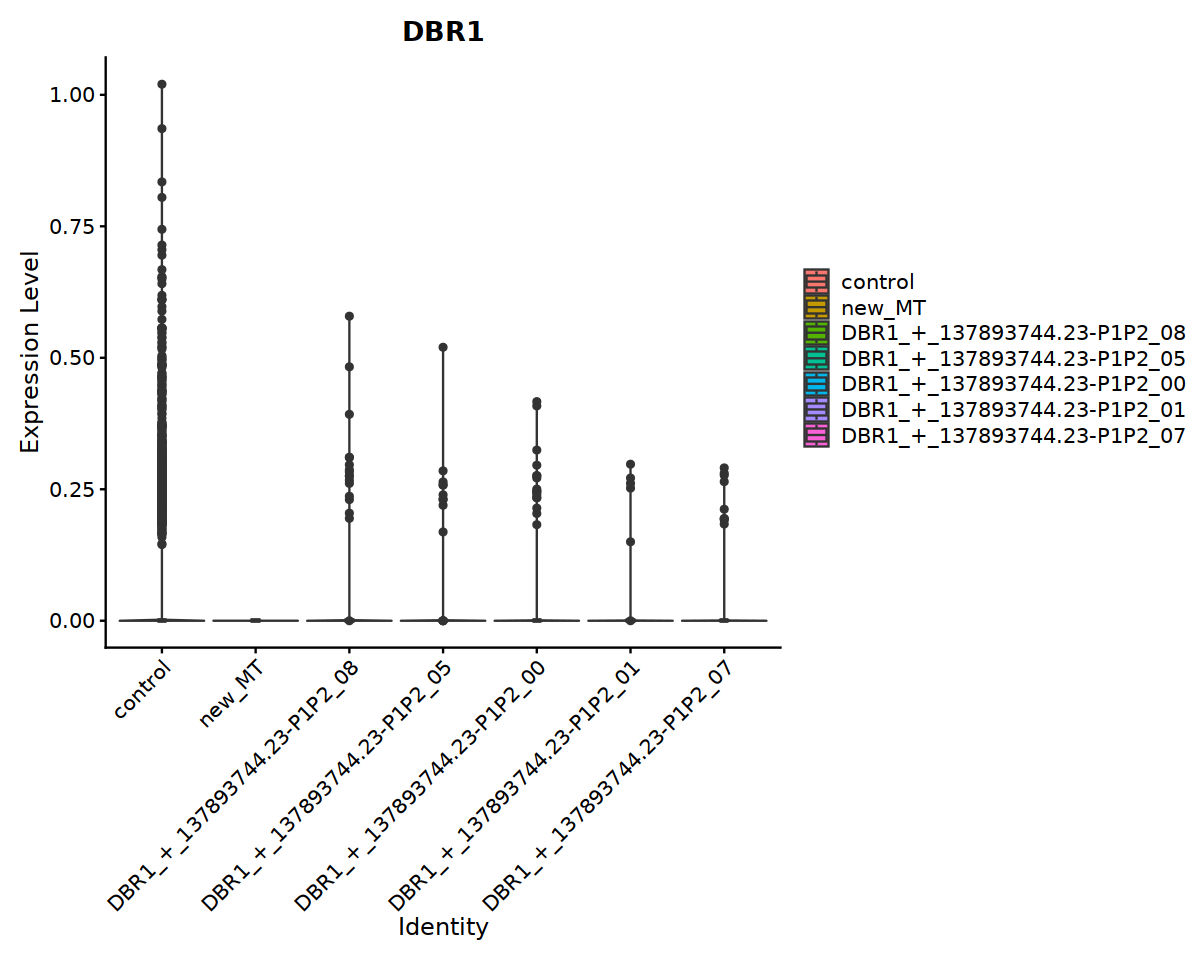

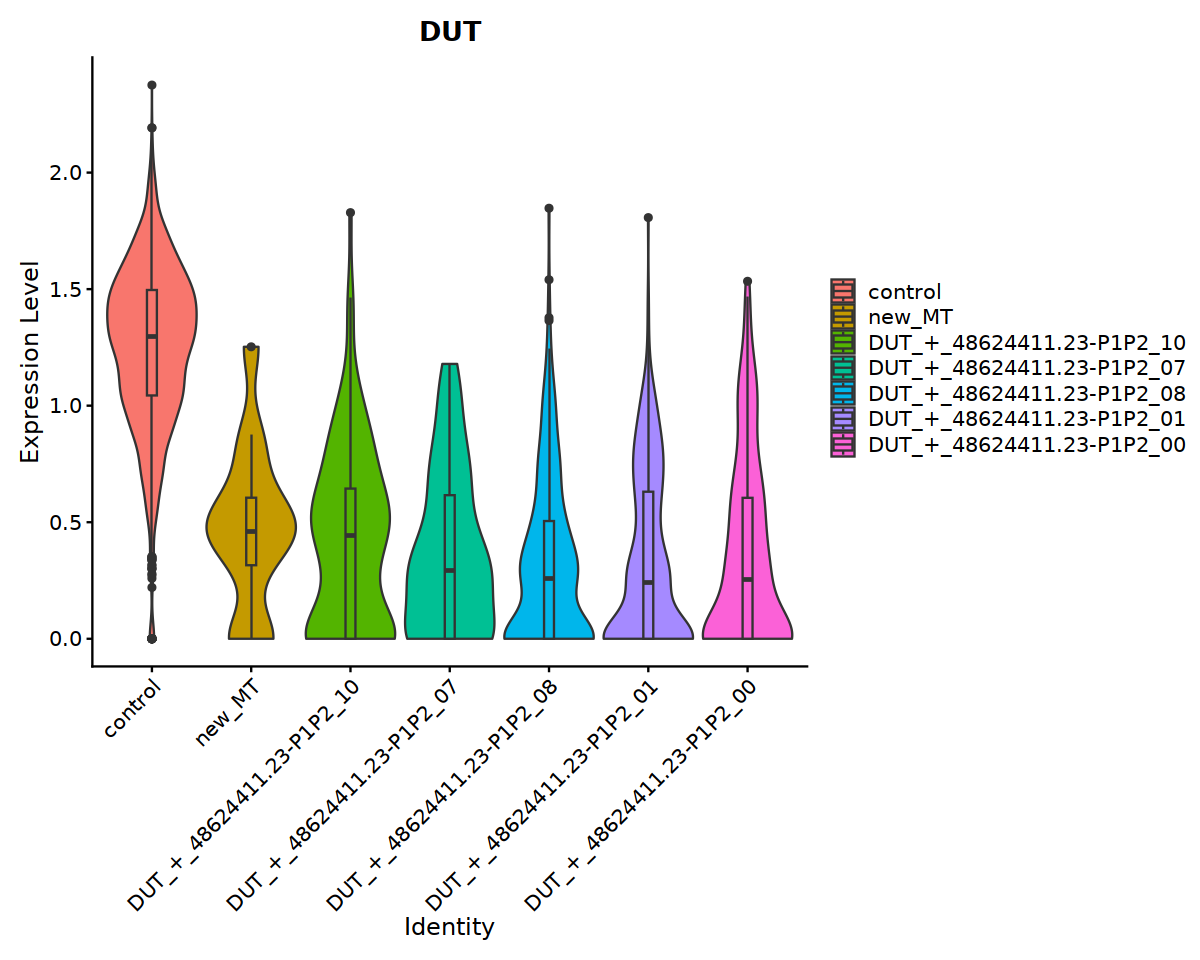

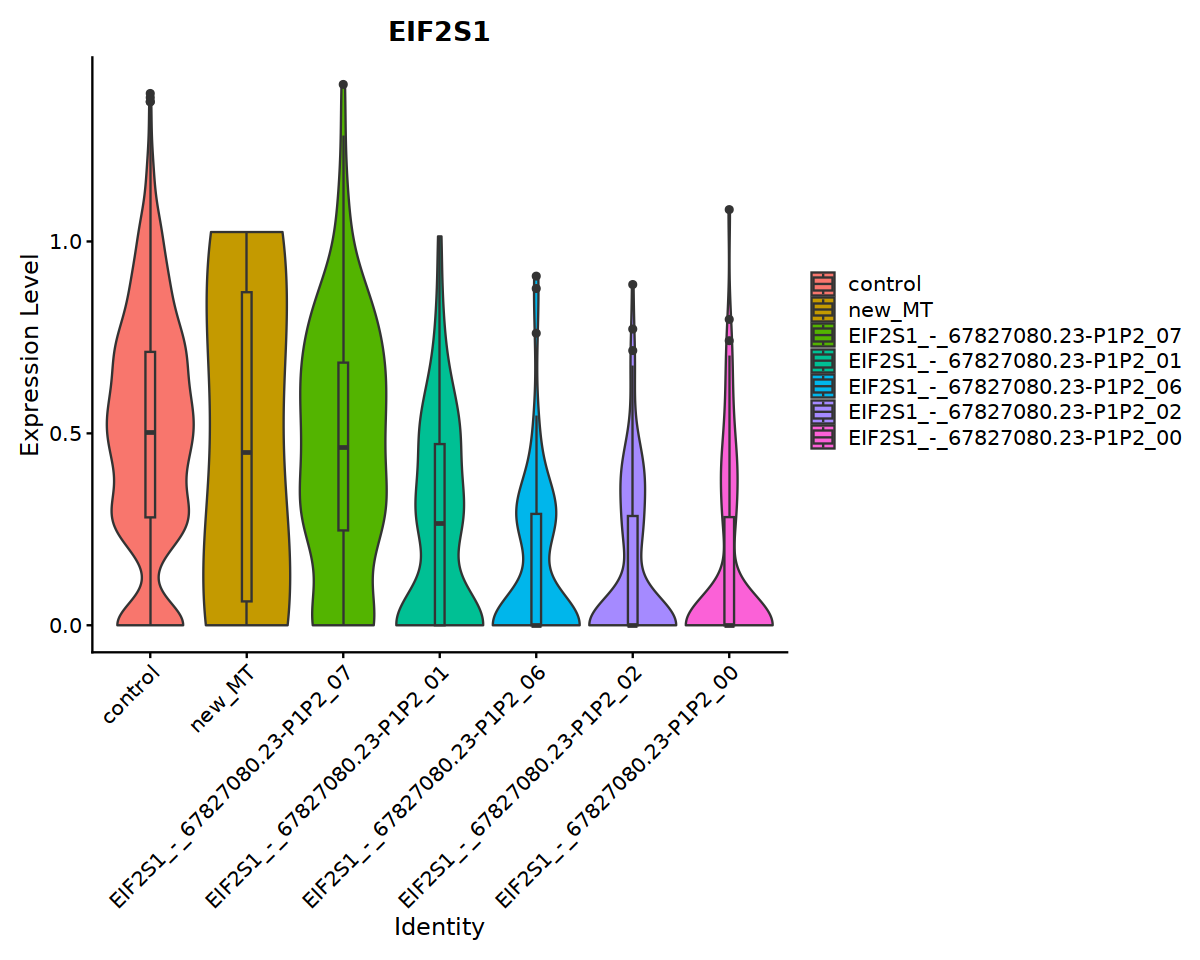

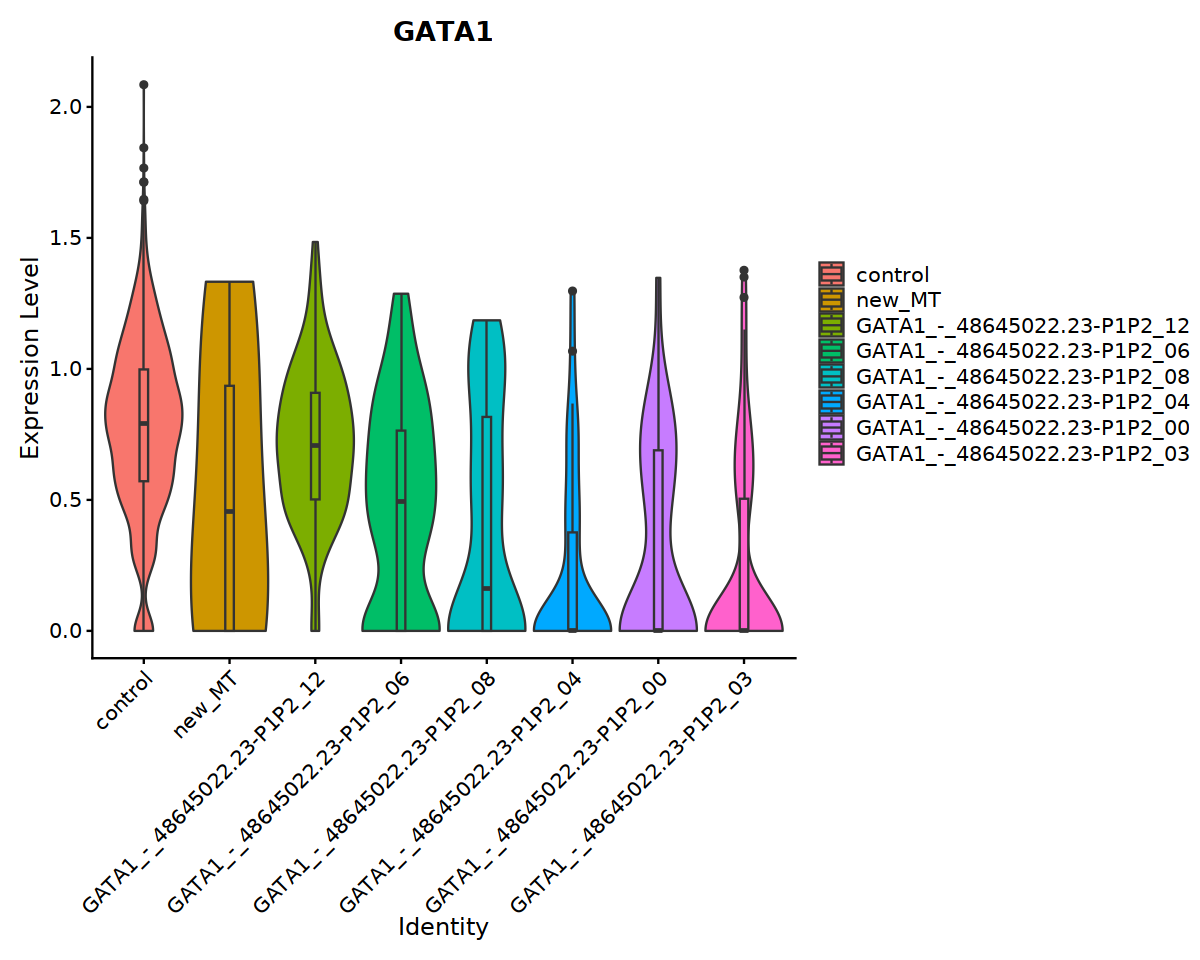

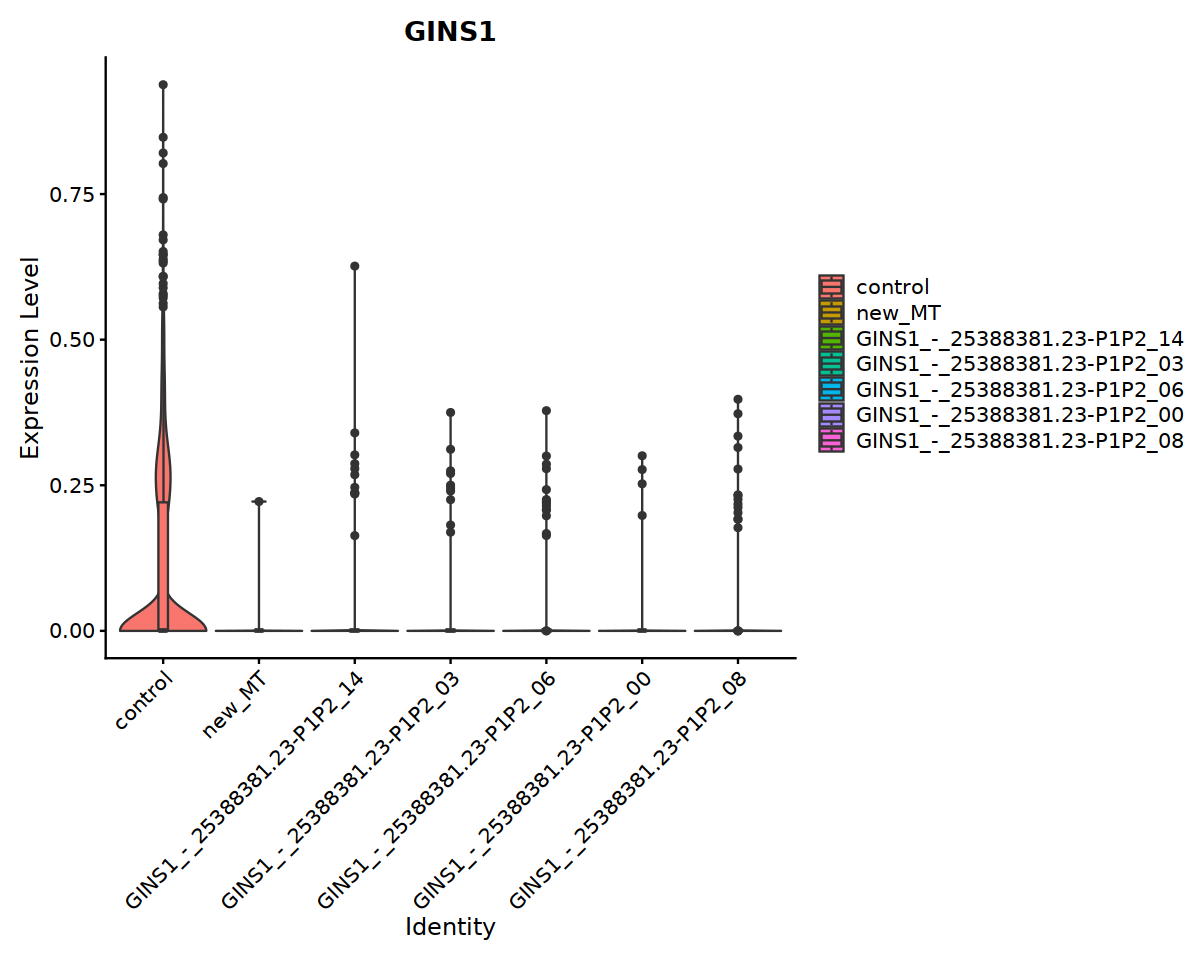

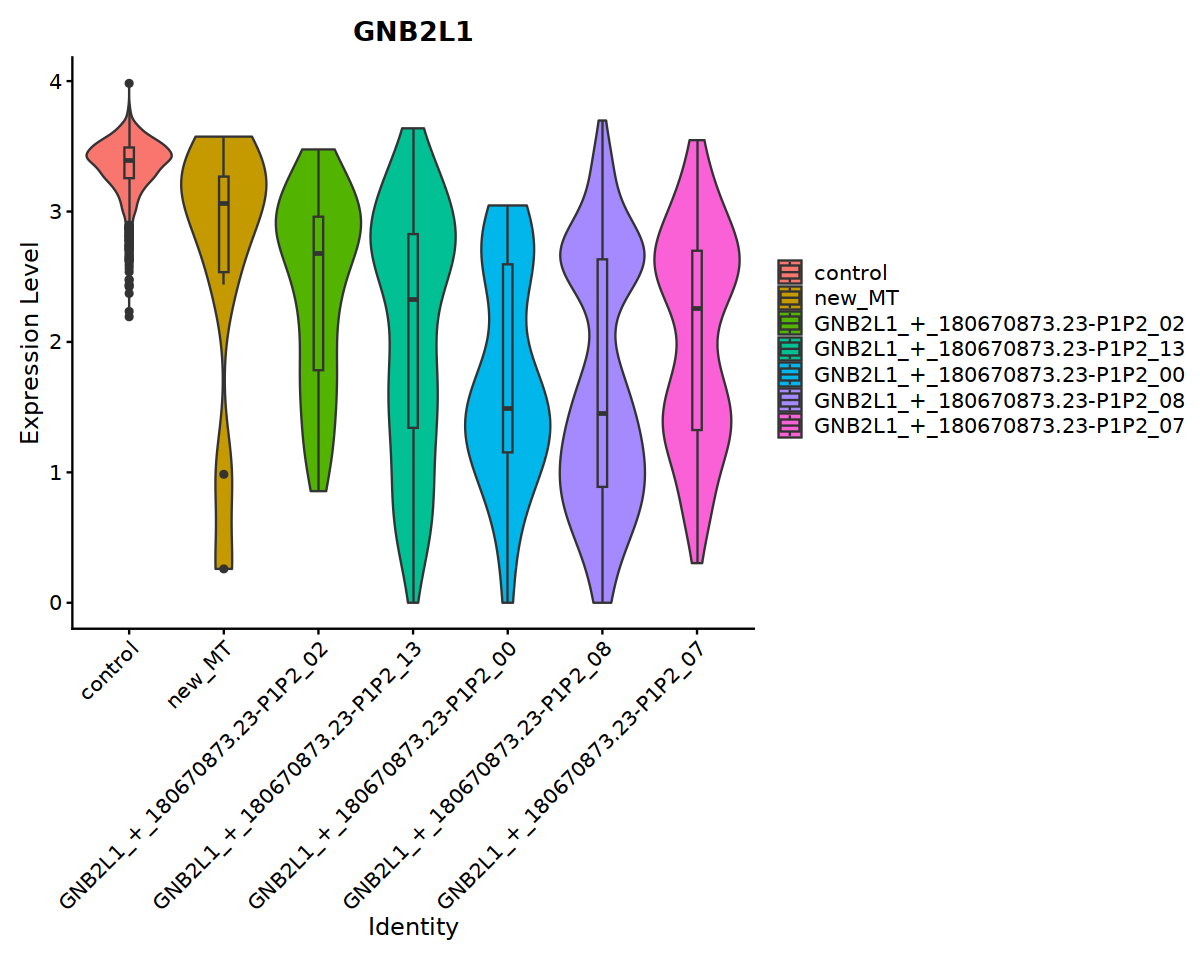

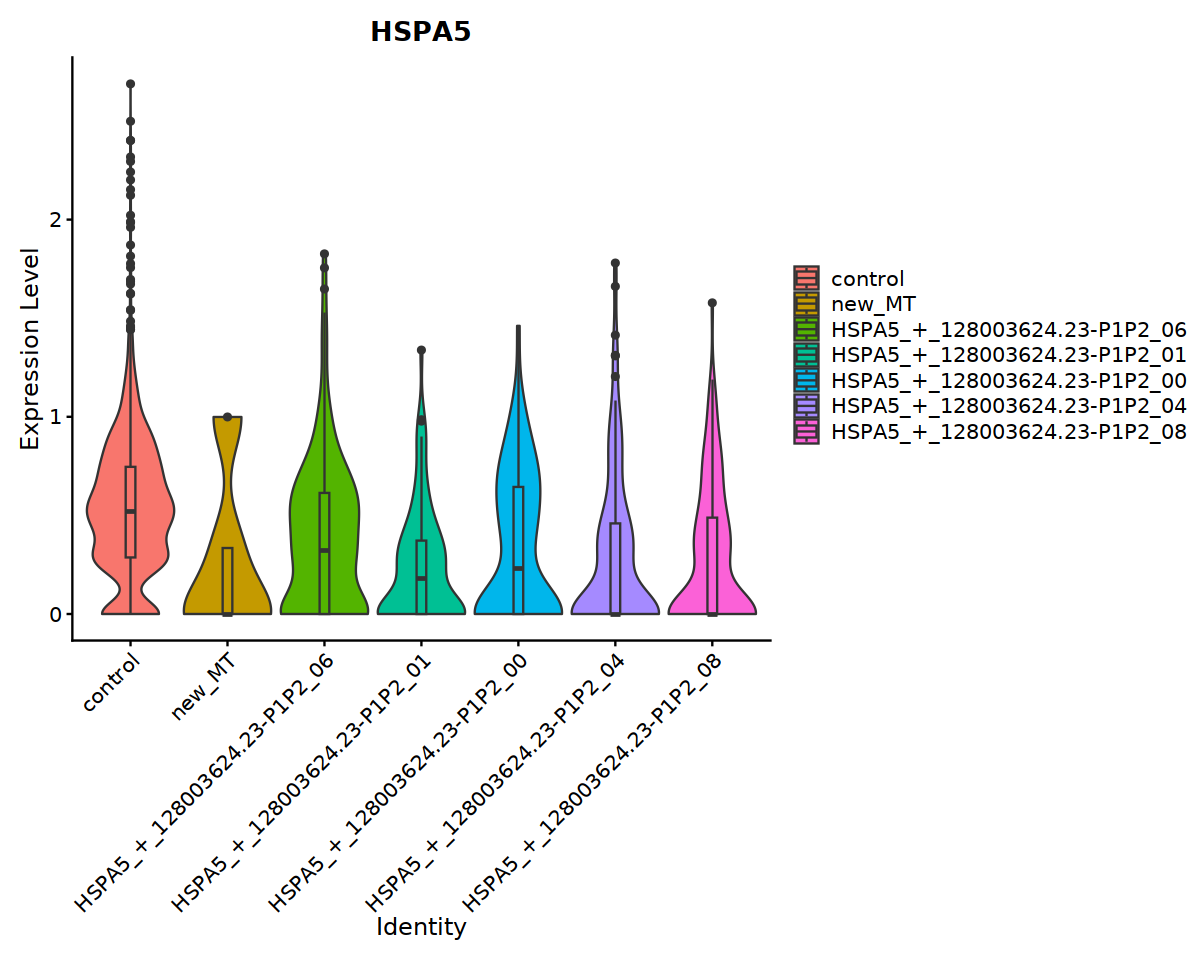

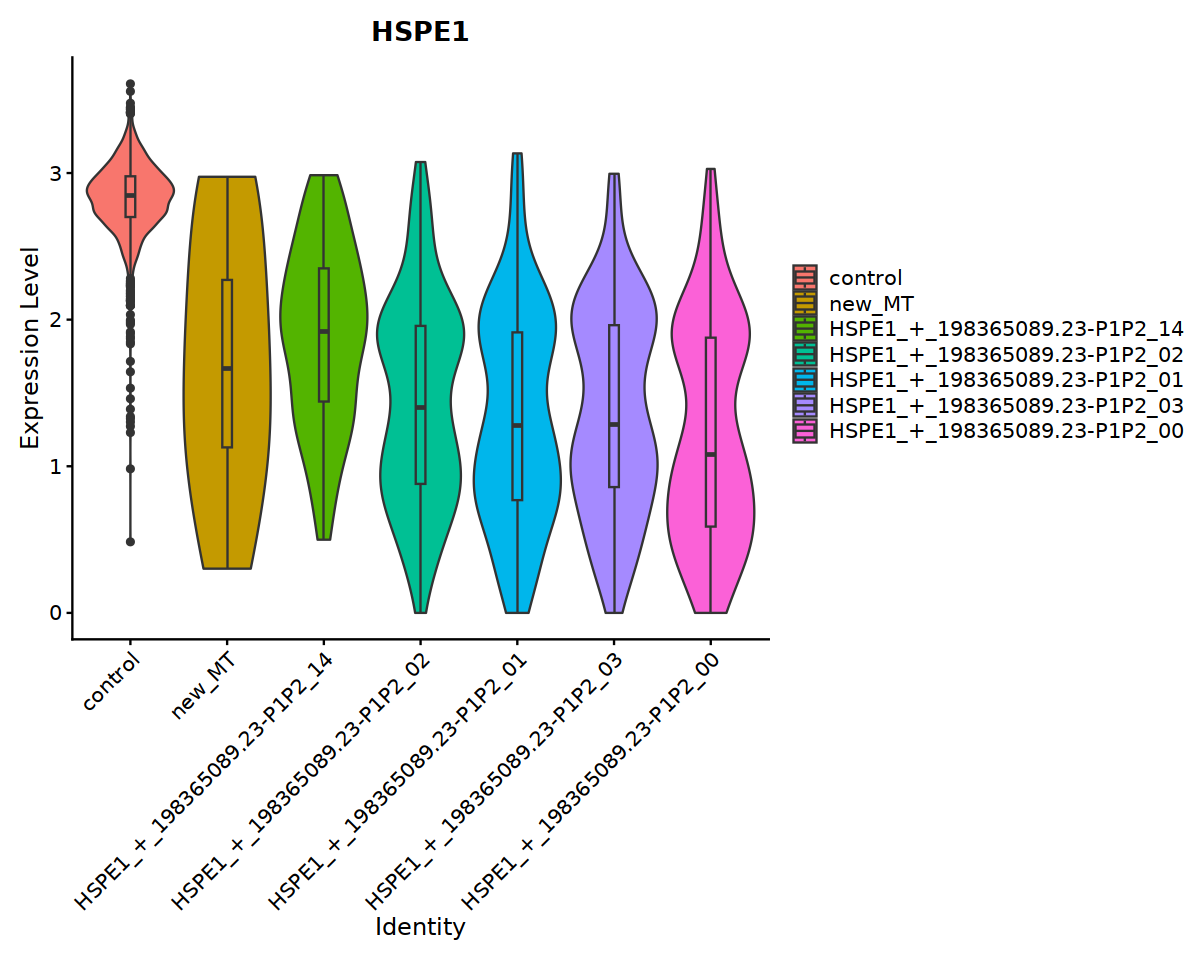

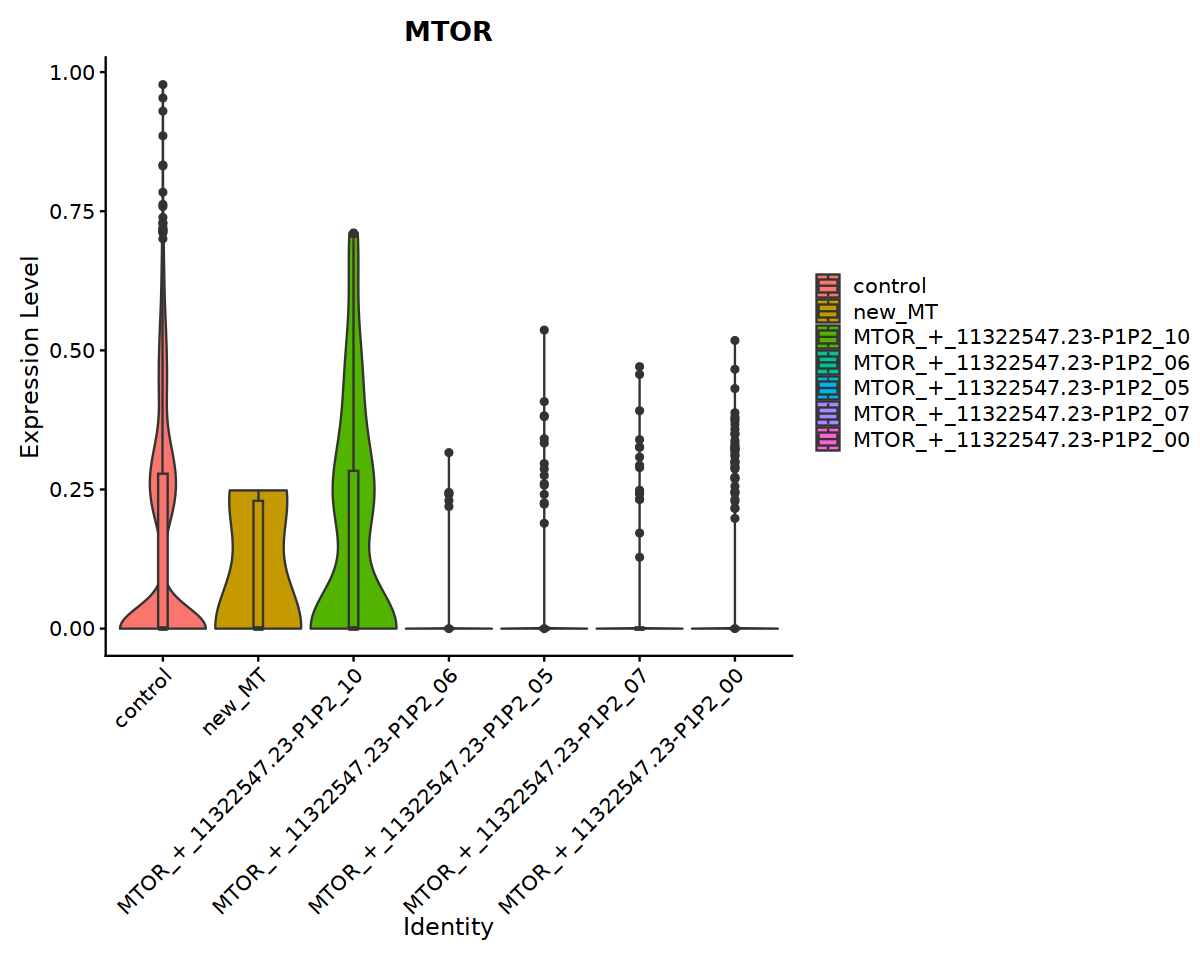

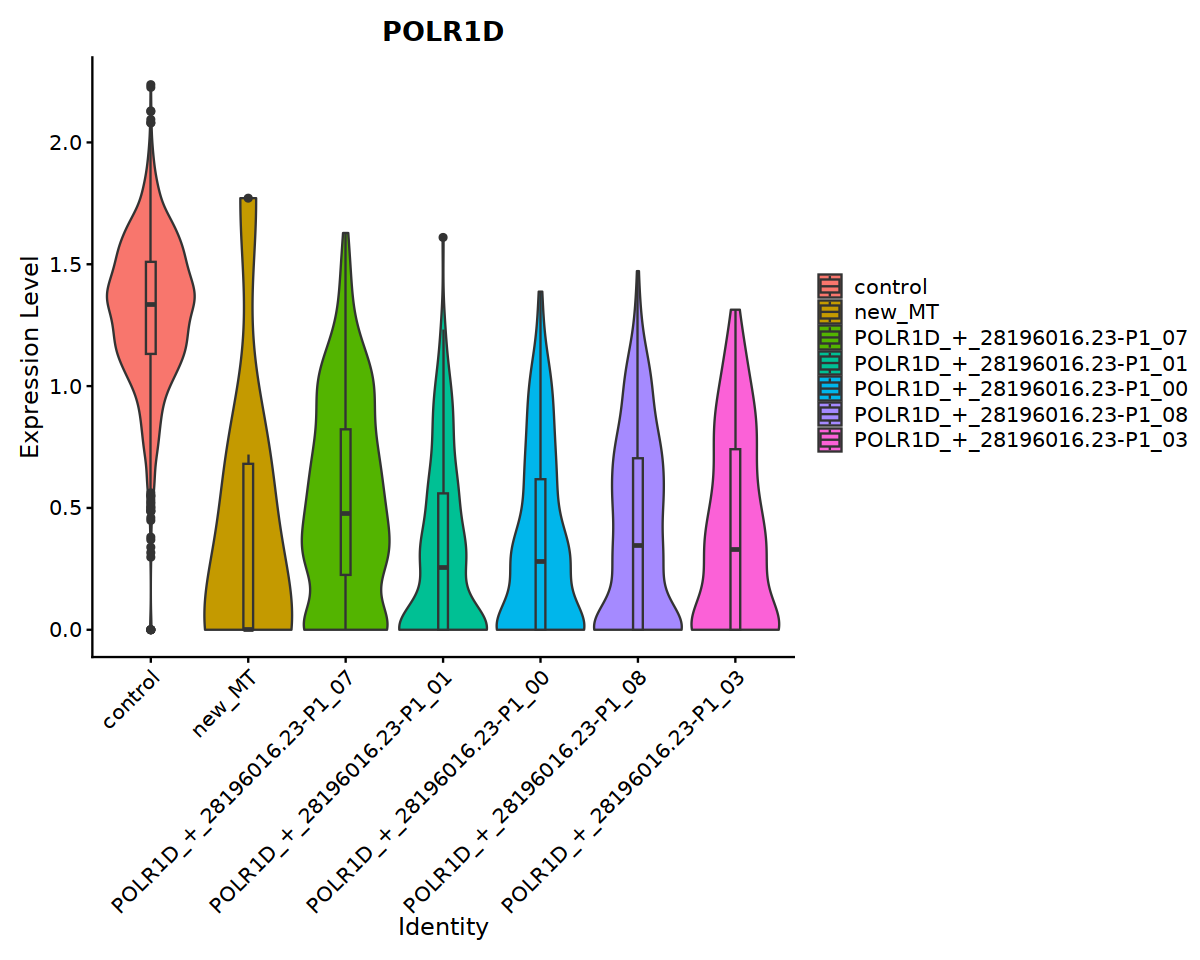

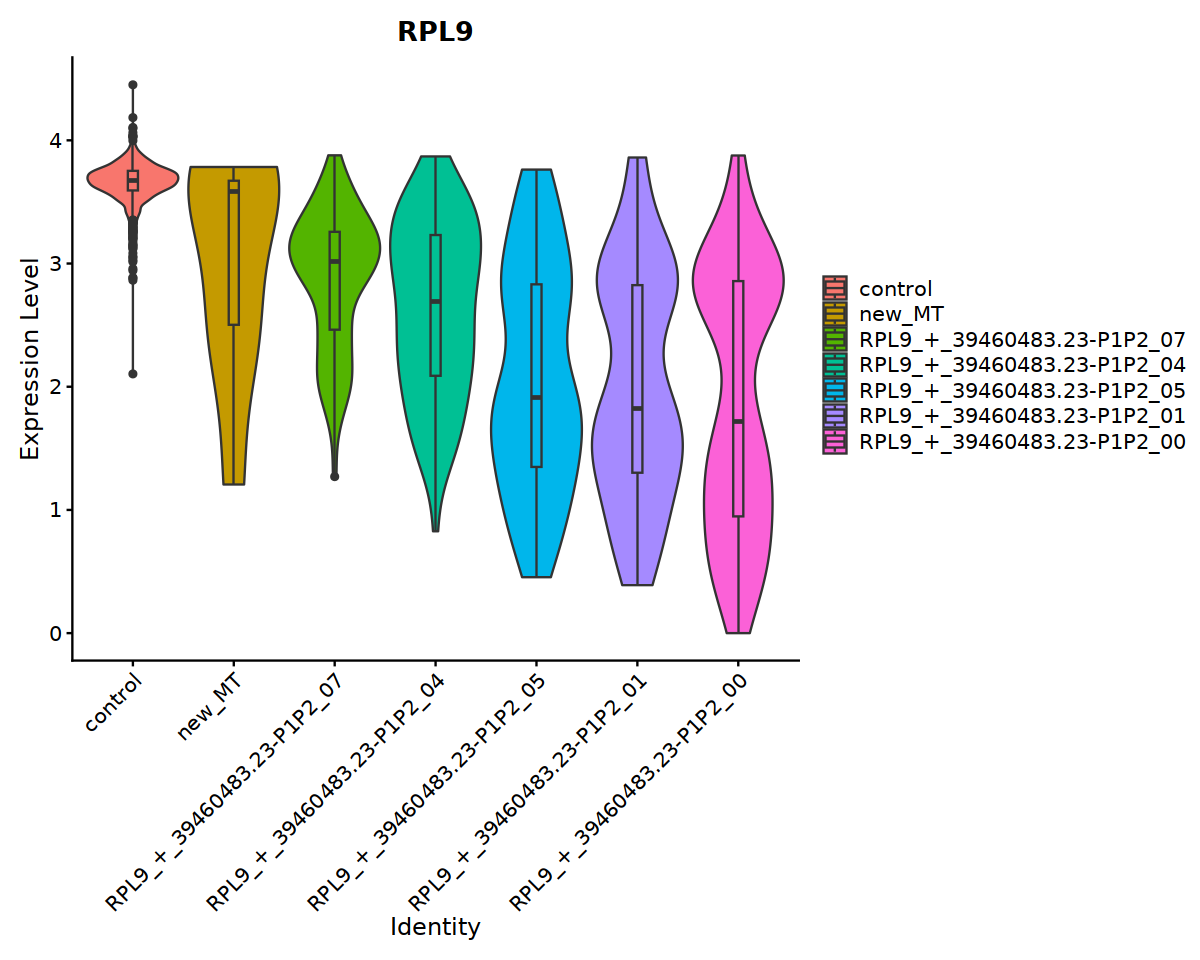

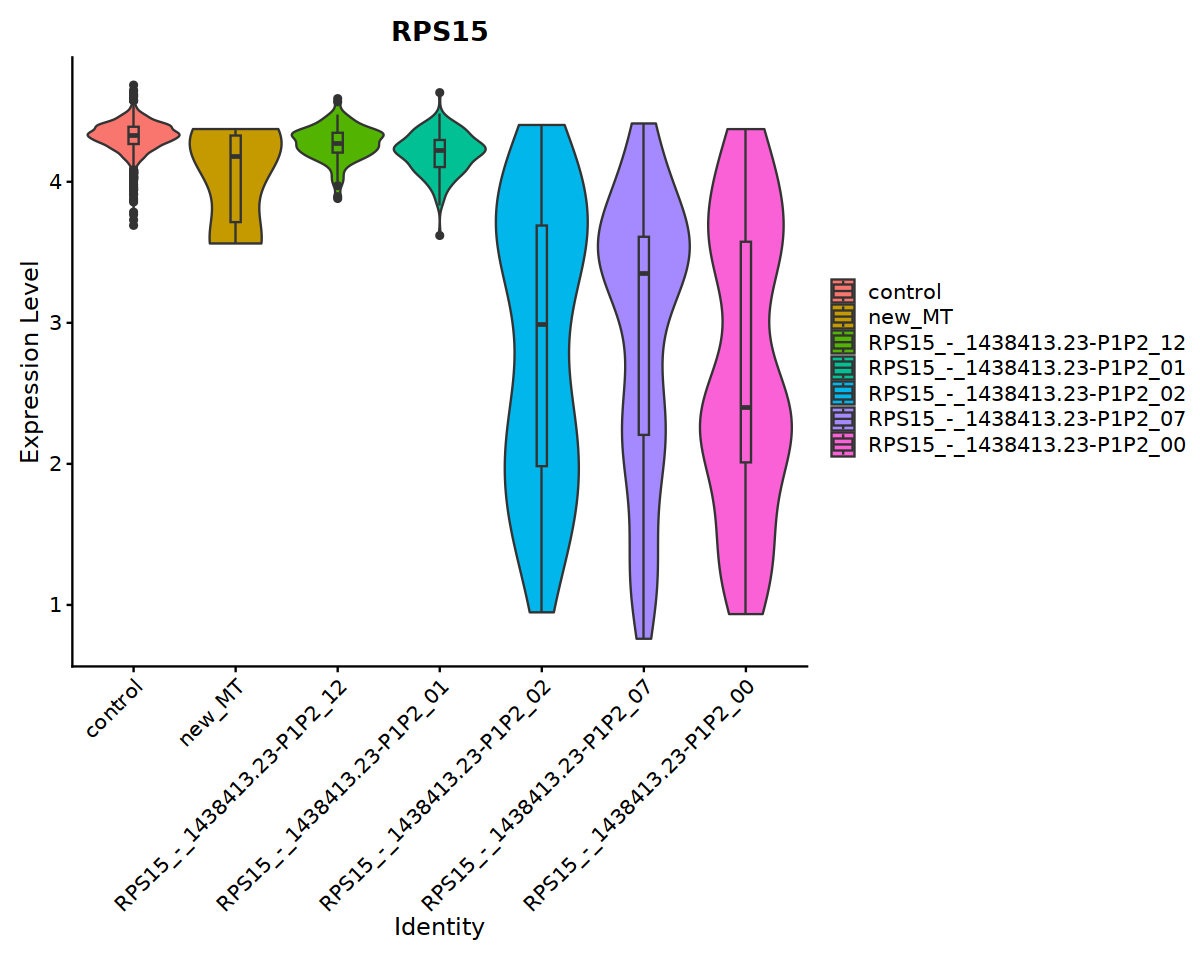

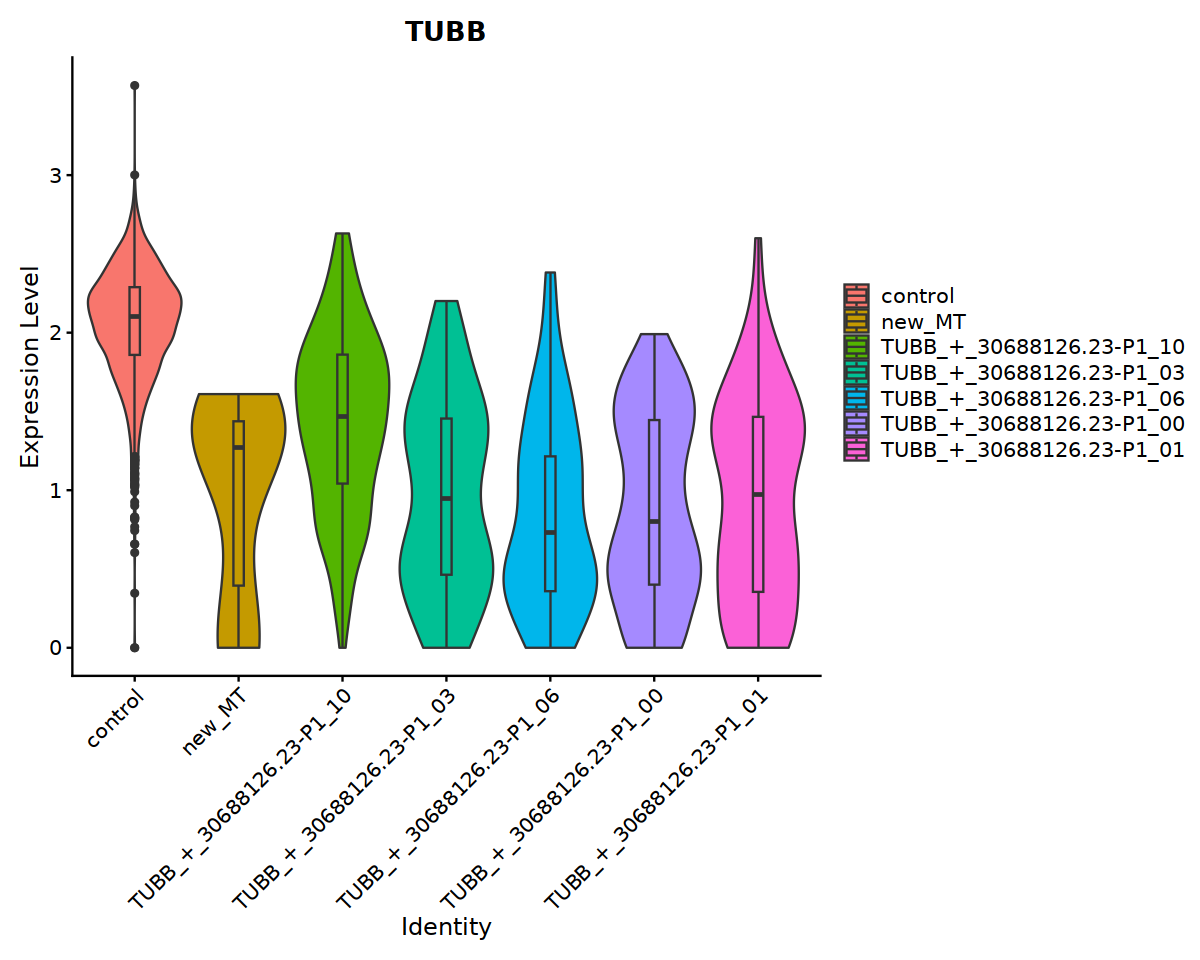

In [92]:
#target <- 'RPL9'

#pdf('Weissman_expression_per_target.pdf', width = 10, height = 8)

options(repr.plot.width = 10, repr.plot.height = 8)
#for(target in unique(GSE132080_sgRNA_barcode_sequences_and_phenotypes$gene)){
for(target in hight_MT_targets){
Idents(seurat.object.girafr.single) <- 'KO_girafr'
seurat.object.girafr.subset <- subset(seurat.object.girafr.single, idents = c('non-targeting', target))
seurat.object.girafr.subset$V3[grepl('non-targeting',seurat.object.girafr.subset$V3)] <- 'non-targeting'
seurat.object.girafr.subset
table(seurat.object.girafr.subset@meta.data[which(seurat.object.girafr.subset$KO_girafr == target),'cate'])
seurat.object.girafr.subset$KO2 <- seurat.object.girafr.subset$guide_identity
seurat.object.girafr.subset$KO2[which(seurat.object.girafr.subset$KO_paper == 'neg')] <- 'neg'


seurat.object.girafr.subset@meta.data$sgRNA_name[which(is.na(seurat.object.girafr.subset@meta.data$sgRNA) & 
                                                  seurat.object.girafr.subset@meta.data$KO_girafr == target)] <- 'new_MT'


seurat.object.girafr.subset@meta.data$sgRNA_name[which(is.na(seurat.object.girafr.subset@meta.data$sgRNA) & 
                                                  seurat.object.girafr.subset@meta.data$KO_girafr == 'non-targeting')] <- 'control'


tmp <- GSE132080_sgRNA_barcode_sequences_and_phenotypes[which(GSE132080_sgRNA_barcode_sequences_and_phenotypes$gene == target),]
tmp$sgRNA_name2 <- paste0(tmp$gene, '_',tmp$sgRNA_name)
rownames(tmp) <- tmp$sgRNA_name2

seurat.object.girafr.subset@meta.data$activity <- 0
seurat.object.girafr.subset@meta.data$activity[which(seurat.object.girafr.subset@meta.data$KO2 != 'neg')] <- tmp[seurat.object.girafr.subset@meta.data$KO2[which(seurat.object.girafr.subset@meta.data$KO2 != 'neg')],'relative_activity_day5']
seurat.object.girafr.subset@meta.data$sgRNA_name <- factor(seurat.object.girafr.subset@meta.data$sgRNA_name, 
                                                    levels = c('control','new_MT',tmp[order(tmp$relative_activity_day5),'sgRNA_name']))


print(VlnPlot(seurat.object.girafr.subset, group.by = 'sgRNA_name', 
        features = target, pt.size = 0)+geom_boxplot(width=0.1))}
    
#dev.off()

# aggregated expression

In [93]:
targets <- unique(GSE132080_sgRNA_barcode_sequences_and_phenotypes$gene)

all.exp2.df <- data.frame()
CTRL_cells <- row.names(seurat.object.girafr.single@meta.data[which(seurat.object.girafr.single@meta.data$KO_girafr == 'non-targeting'),])
for(gene in targets){
    KO_cells <- row.names(seurat.object.girafr.single@meta.data[which(seurat.object.girafr.single@meta.data$KO_girafr == gene),])
    tmp.df <- rbind(data.frame(expression = seurat.object.girafr.single@assays$RNA@data[gene, KO_cells], type = 'KO_girafr'),
                    data.frame(expression = seurat.object.girafr.single@assays$RNA@data[gene, CTRL_cells], type = 'Control'))

    tmp.df$target = gene
    tmp.df$cb = rownames(tmp.df)
    all.exp2.df <- rbind(all.exp2.df, tmp.df)
}

In [94]:
head(all.exp2.df)

expression type      target cb                
AAAGATGGTAAACGCG-1 0.4546504  KO_girafr ALDOA  AAAGATGGTAAACGCG-1
AACCGCGAGATGTCGG-1 2.3933622  KO_girafr ALDOA  AACCGCGAGATGTCGG-1
AACTGGTAGTCTTGCA-1 1.7839106  KO_girafr ALDOA  AACTGGTAGTCTTGCA-1
AAGACCTAGATCTGAA-1 0.6636138  KO_girafr ALDOA  AAGACCTAGATCTGAA-1
AAGCCGCCACAGACTT-1 2.4761638  KO_girafr ALDOA  AAGCCGCCACAGACTT-1
ACACCAAGTGCAGTAG-1 0.7061200  KO_girafr ALDOA  ACACCAAGTGCAGTAG-1

In [95]:
avg.exp.control <- all.exp2.df[which(all.exp2.df$type == 'Control'),] %>% group_by(target) %>% summarise(avg = mean(expression))
avg.exp.control <- as.data.frame(avg.exp.control)
rownames(avg.exp.control) <- avg.exp.control$target

In [96]:
cells.gRNA.single.MT.all$cb <- rownames(cells.gRNA.single.MT.all)

In [97]:
cells.gRNA.single.MT.all$is_WT <- !grepl(pattern = 'variant',cells.gRNA.single.MT.all$V3)

In [98]:
all.exp2.MT.df <- merge(all.exp2.df, cells.gRNA.single.MT.all[,c(4:15)], by = 'cb')
all.exp2.MT.df$type_is_WT <- paste0(all.exp2.MT.df$type, all.exp2.MT.df$is_WT)

In [99]:
table(all.exp2.MT.df$type_is_WT)


  ControlFALSE    ControlTRUE KO_girafrFALSE  KO_girafrTRUE 
           375          52500          14074           3329 

In [100]:
all.exp2.MT.df$type_is_WT2 <- all.exp2.MT.df$type_is_WT
all.exp2.MT.df[which(all.exp2.MT.df$type_is_WT == 'ControlFALSE' |
                    all.exp2.MT.df$type_is_WT == 'ControlTRUE'),'type_is_WT2'] <- 'Control'

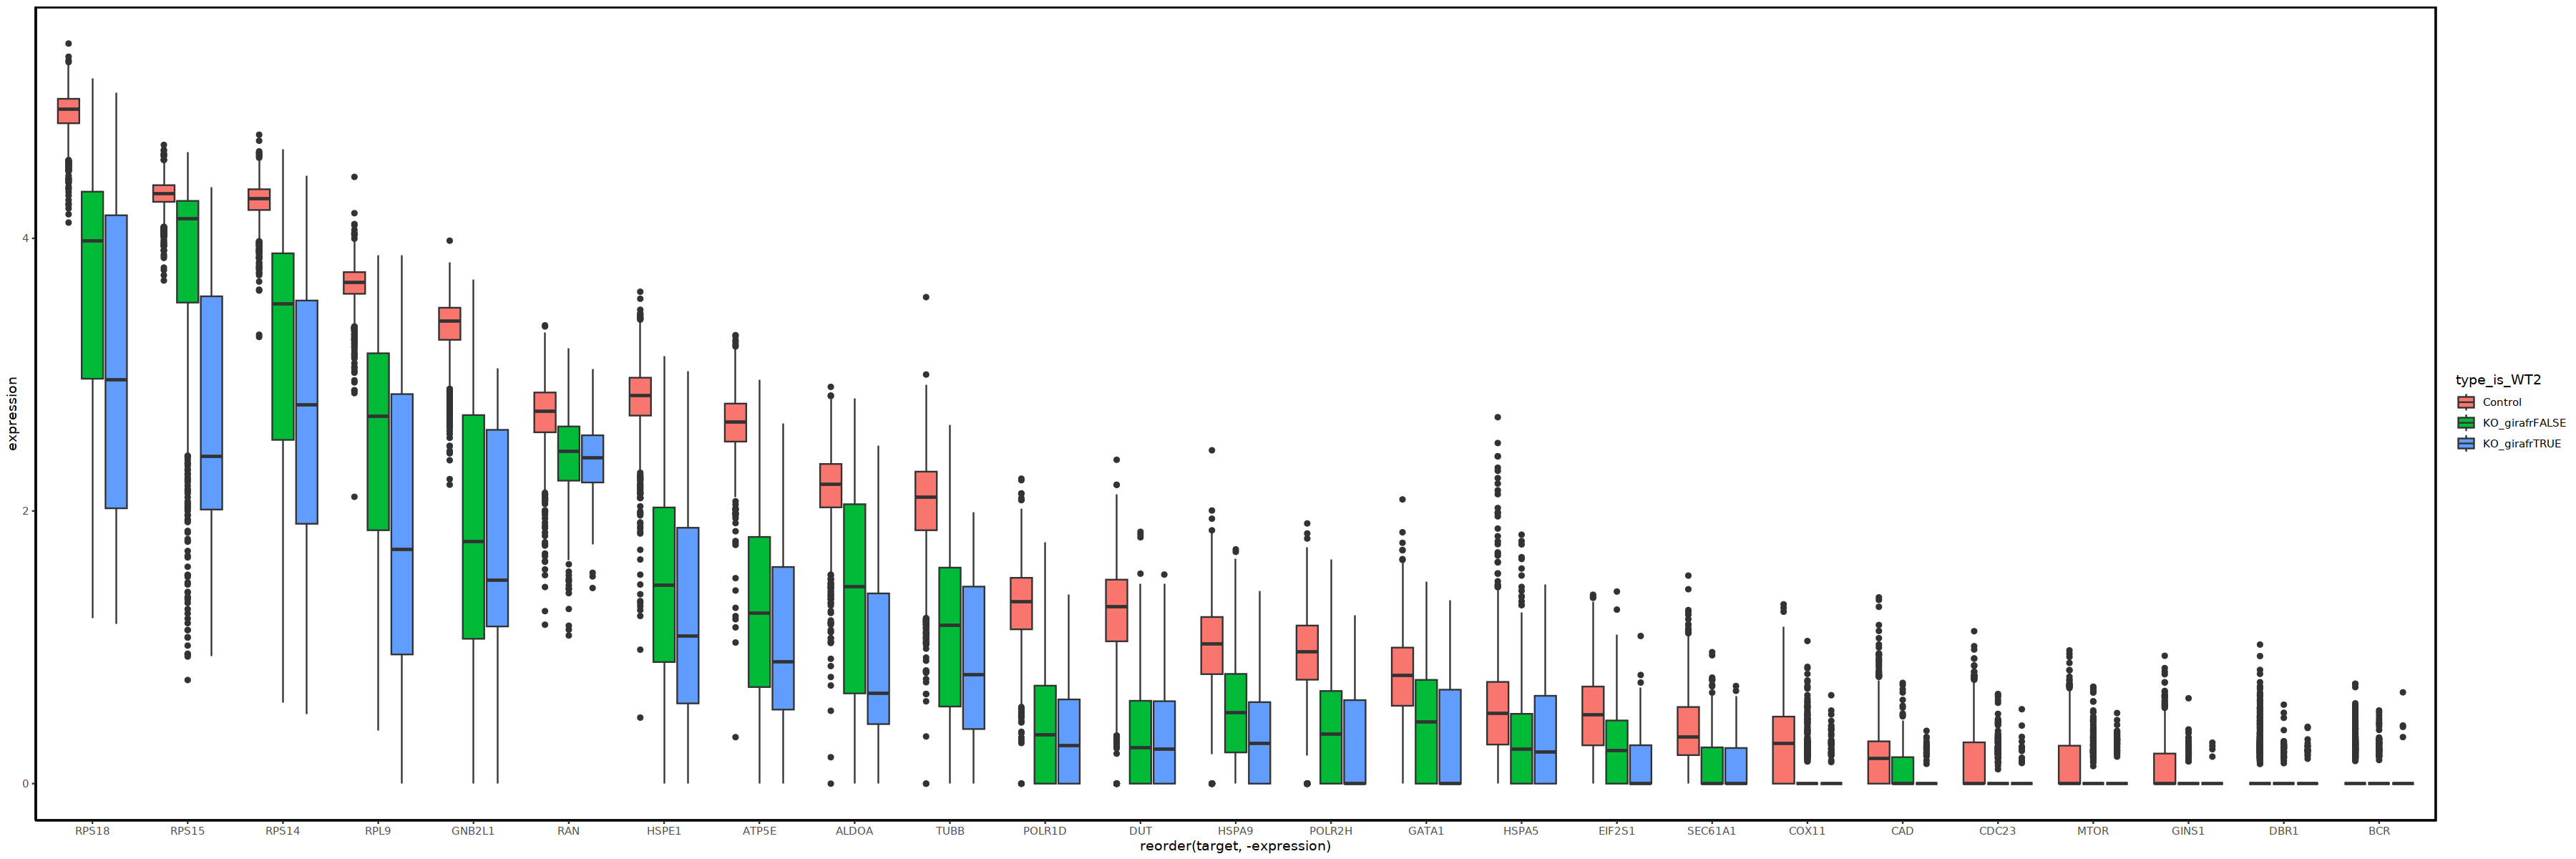

In [101]:
options(repr.plot.width=30,repr.plot.height=10)
ggplot(all.exp2.MT.df, aes(x = reorder(target, -expression), y = expression, fill = type_is_WT2)) + 
#scale_fill_manual(breaks = c("Control", "KOFALSE","KOTRUE"), 
#                  values=c("grey", "lightblue",'blue'))+
geom_boxplot()+theme_classic()+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))


In [102]:
all.exp2.MT.df$MT_gRNA <- ifelse(grepl(pattern = 'gRNA', all.exp2.MT.df$V5), 1,0)
all.exp2.MT.df$MT_U6 <- ifelse(grepl(pattern = 'U6', all.exp2.MT.df$V5), 1,0)
all.exp2.MT.df$MT_Rest <- ifelse(grepl(pattern = 'Rest', all.exp2.MT.df$V5), 1,0)

all.exp2.MT.df$tmp <- paste(all.exp2.MT.df$type_is_WT2, all.exp2.MT.df$MT_gRNA, sep = '_')
all.exp2.MT.df[which(all.exp2.MT.df$tmp == 'Control_0'|all.exp2.MT.df$tmp == 'Control_1'),'tmp'] <- 'Control'
table(all.exp2.MT.df$tmp)


         Control KO_girafrFALSE_0 KO_girafrFALSE_1  KO_girafrTRUE_0 
           52875               19            14055             3329 

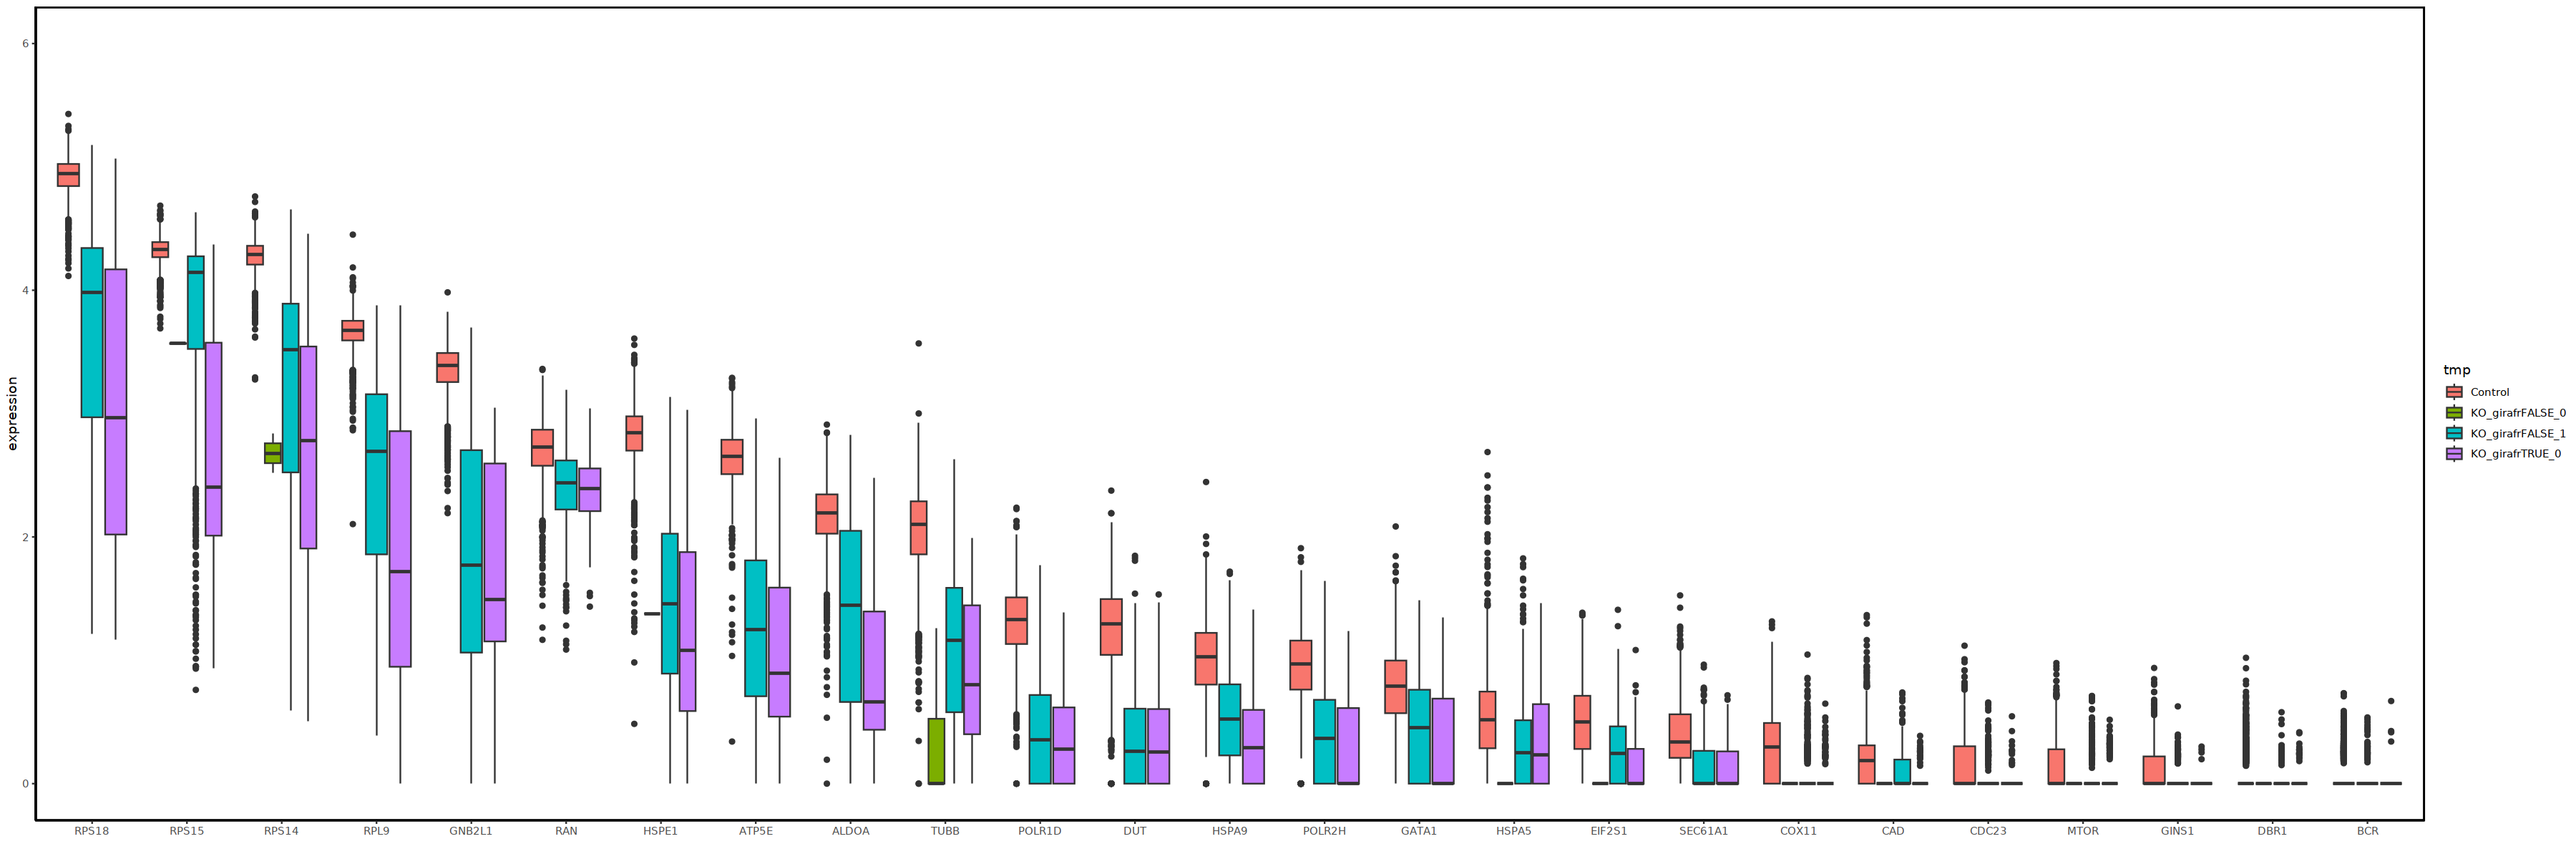

In [103]:
options(repr.plot.width=30,repr.plot.height=10)

ggplot(all.exp2.MT.df, aes(x = reorder(target, -expression), y = expression, fill = tmp)) + 

ylim(0,6)+
scale_x_discrete(labels=c("Control" = "Control", "KOFALSE" = "KO MT","KOTRUE" = "KO WT"))+
geom_boxplot(notch = FALSE)+theme_classic()+
#stat_compare_means(comparisons = my_comparisons, label = "p.signif")+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))



In [104]:
sum(is.na(all.exp2.MT.df[which(all.exp2.MT.df$KO == 'RPL9'),"sgRNA_name"]))

[1] 9

In [105]:
all.exp2.MT.df$sgRNA_name2 <- all.exp2.MT.df$sgRNA_name

In [106]:
all.exp2.MT.df$sgRNA_name2[grepl('P1',all.exp2.MT.df$sgRNA_name)] <- 'paper_sgRNA'

In [107]:
all.exp2.MT.df$sgRNA_name2[which(all.exp2.MT.df$cate == 'new_MT' & all.exp2.MT.df$type == 'KO_girafr')] <- 'new_MT'
all.exp2.MT.df$sgRNA_name2[which(all.exp2.MT.df$type == 'Control')] <- 'control'
                                 

In [108]:
all.exp2.MT.df$sgRNA_name2[grepl('_00',all.exp2.MT.df$sgRNA_name)] <- 'paper_WT_sgRNA'

In [109]:
table(all.exp2.MT.df[which(all.exp2.MT.df$KO == 'RPL9'),'sgRNA_name2'])# validate new MT for RPL9 is 9 


        new_MT    paper_sgRNA paper_WT_sgRNA 
             9            413            111 

In [111]:
gRNA_targets <-unique(GSE132080_sgRNA_barcode_sequences_and_phenotypes$gene)
CTRL_cells <- row.names(seurat.object.girafr.single@meta.data[which(seurat.object.girafr.single@meta.data$KO_girafr == 'non-targeting'),])
length(CTRL_cells)
#h <- hist(rowSums(seurat.object.girafr.single@assays$RNA@counts[gRNA_targets, CTRL_cells] < 1), plot = FALSE,breaks = 100)
#plot(h, xlab = 'Number of cells with counts < 1', main = 'Expression < 1 in control cells')
high_exp_targets <- gRNA_targets[rowSums(seurat.object.girafr.single@assays$RNA@counts[gRNA_targets, CTRL_cells] < 1) <= 500]
high_exp_targets
length(high_exp_targets)

[1] 2115

[1] "ALDOA"   "ATP5E"   "DUT"     "EIF2S1"  "GATA1"   "GNB2L1"  "HSPA5"  
 [8] "HSPA9"   "HSPE1"   "POLR1D"  "POLR2H"  "RAN"     "RPL9"    "RPS14"  
[15] "RPS15"   "RPS18"   "SEC61A1" "TUBB"

[1] 18

high expression targets :  0 counts less than 500 cells in control

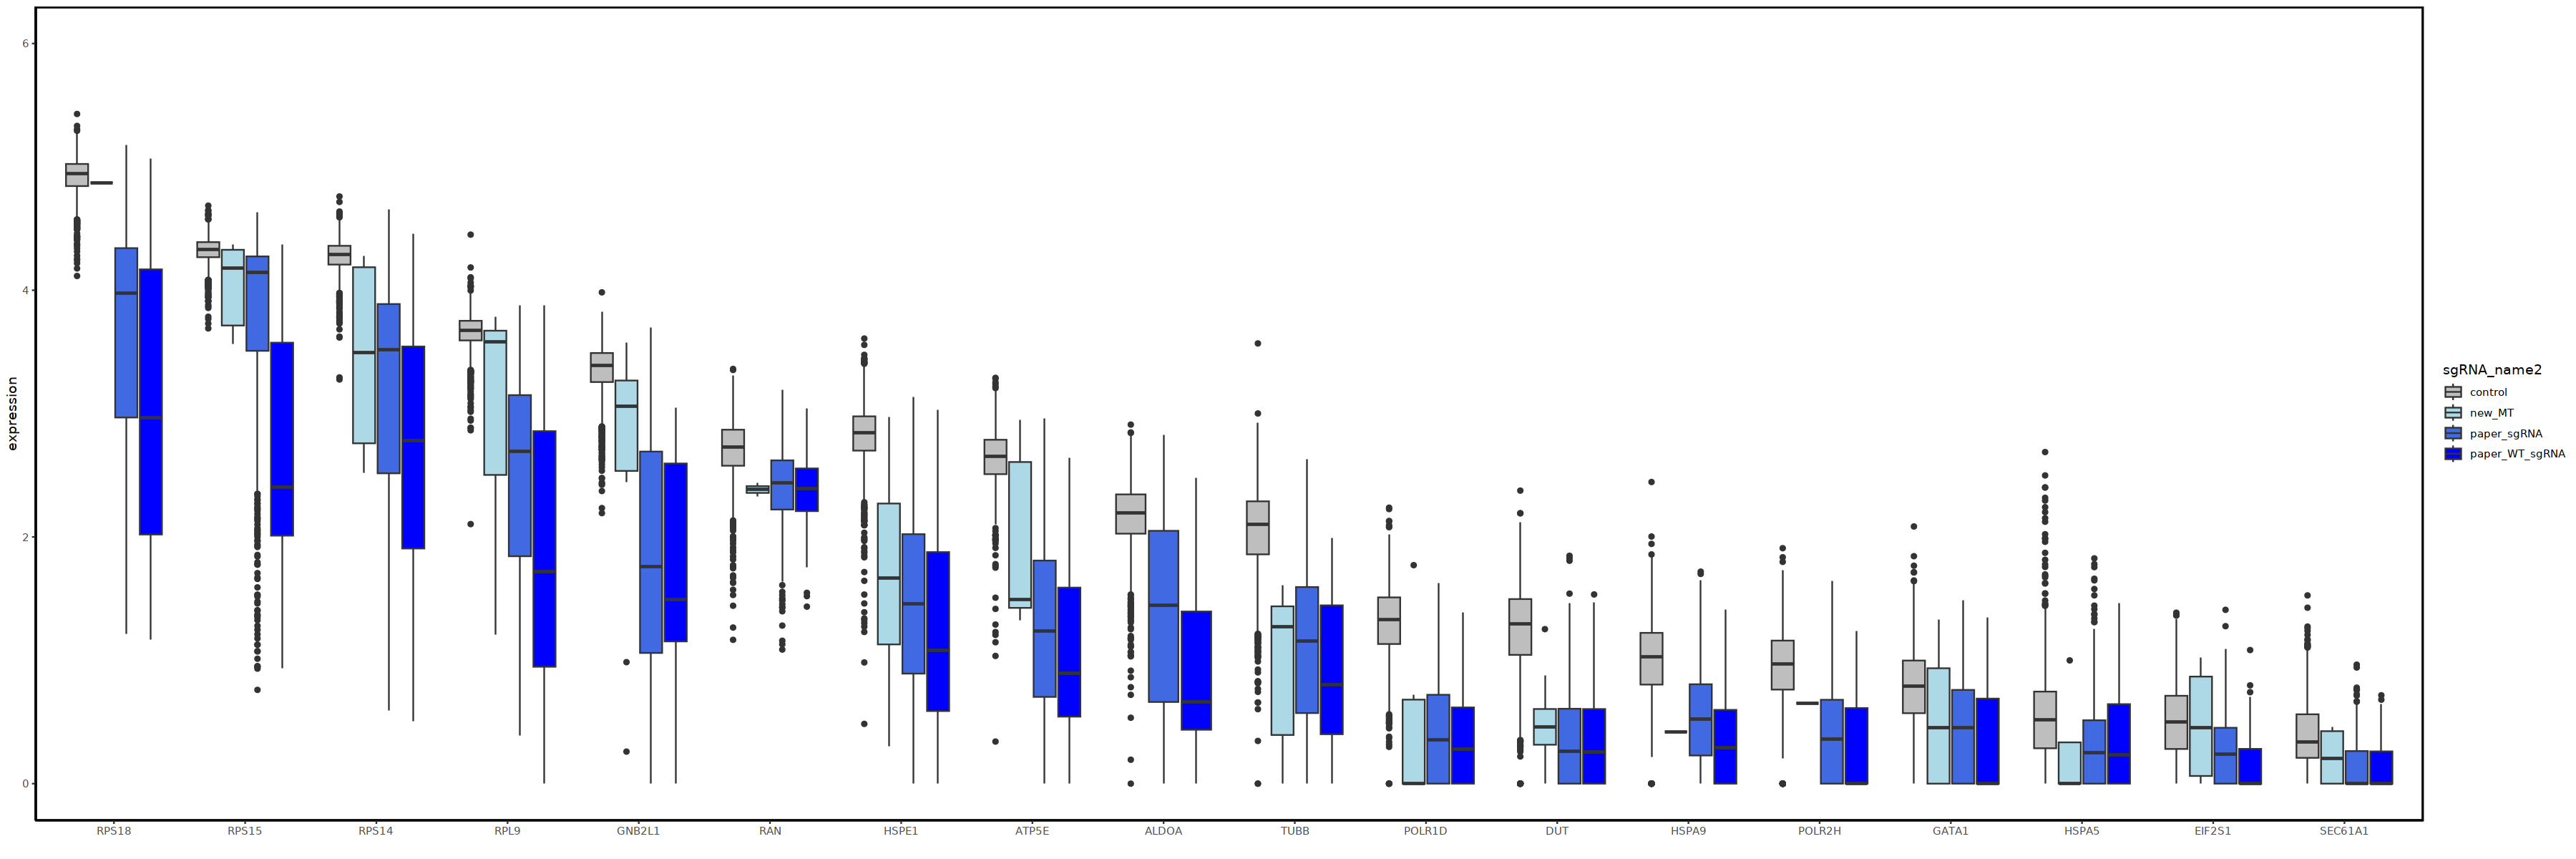

In [112]:
options(repr.plot.width=30,repr.plot.height=10)

#pdf('Weissman_expression_boxplot_seperate_targets.pdf',width = 30, height = 10)

ggplot(all.exp2.MT.df[which(all.exp2.MT.df$target %in% high_exp_targets), ], aes(x = reorder(target, -expression), y = expression, fill = sgRNA_name2)) + 
ylim(0,6)+
geom_boxplot(notch = FALSE)+theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))+
scale_fill_manual(breaks = c("control", "new_MT","paper_sgRNA","paper_WT_sgRNA"), 
                  values=c("grey", "lightblue",'royalblue','blue'))

#dev.off()

In [113]:
all.exp2.MT.df$nr_mutation <- str_count(all.exp2.MT.df$V5, "gRNA")
#all.exp2.MT.df$nr_mutation[grepl('\\(', all.exp2.MT.df$V5)] <- as.numeric(sub('\\)','',sub('\\(', '',str_extract(all.exp2.MT.df$V5[grepl('\\(', all.exp2.MT.df$V5)], '\\(\\d\\)'))))
all.exp2.MT.df$nr_mutation[which(all.exp2.MT.df$nr_mutation > 1)] <- '>1'
all.exp2.MT.df$nr_mutation[which(all.exp2.MT.df$cate == 'new_MT')] <- paste0('new_',all.exp2.MT.df$nr_mutation[which(all.exp2.MT.df$cate == 'new_MT')])
all.exp2.MT.df$nr_mutation[which(all.exp2.MT.df$type == 'Control')] <- 'Control'


In [114]:
all.exp2.MT.df$expression_norm <- all.exp2.MT.df$expression/avg.exp.control[all.exp2.MT.df$target,'avg']

In [115]:
library(ggpubr)

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”
Notch went outside hinges
ℹ Do you want `notch = FALSE`?
Notch went outside hinges
ℹ Do you want `notch = FALSE`?


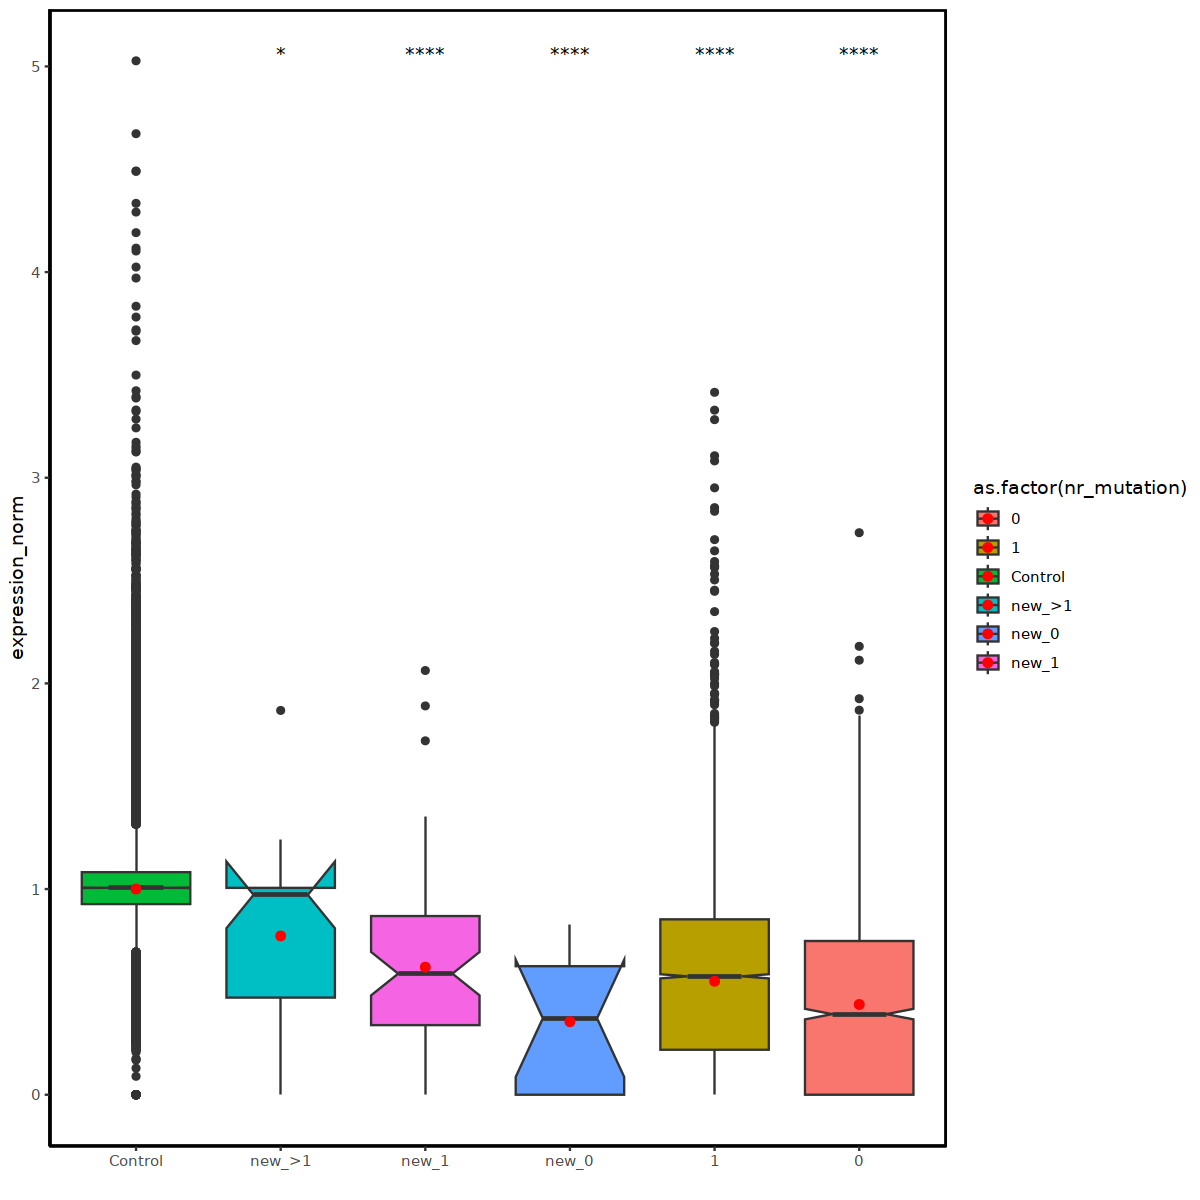

In [116]:
options(repr.plot.width=10,repr.plot.height=10)
#pdf('Weissman_aggregated_expression_boxplot.pdf')

# ggplot(all.exp2.MT.df[which(all.exp2.MT.df$target %in% high_exp_targets), ], aes(x = factor(nr_mutation, levels = c('Control','new_>1','new_1','new_0','1','0')), y = expression, fill = as.factor(nr_mutation))) + 
# #ylim(0,6)+
# #geom_violin()+
# geom_boxplot(notch = FALSE)+
# stat_summary(fun.y=mean, geom="point", size=2, color="red")+
# theme_classic()+
# xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))+ 
# stat_compare_means(label = "p.signif", method = "t.test",ref.group = "Control") 


ggplot(all.exp2.MT.df[which(all.exp2.MT.df$target %in% high_exp_targets), ], aes(x = factor(nr_mutation, levels = c('Control','new_>1','new_1','new_0','1','0')), y = expression_norm, fill = as.factor(nr_mutation))) + 
#ylim(0,6)+
#geom_violin()+
geom_boxplot(notch = TRUE)+
stat_summary(fun.y=mean, geom="point", size=2, color="red")+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))+ 
stat_compare_means(label = "p.signif", method = "t.test",ref.group = "Control") 


#dev.off()

In [117]:
tmp.df <- all.exp2.MT.df[which(all.exp2.MT.df$target %in% high_exp_targets), c('nr_mutation','expression_norm')]
tmp.df %>% group_by(nr_mutation) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), 
                                               sem = sd(expression_norm)/sqrt(n))


nr_mutation n     avg       sd        sem        
1 0            2126 0.4388986 0.3760131 0.008154950
2 1            9801 0.5516658 0.4025640 0.004066303
3 Control     38070 1.0000000 0.3318509 0.001700793
4 new_0          12 0.3549564 0.3460177 0.099886709
5 new_1          63 0.6203801 0.4596444 0.057909755
6 new_>1         27 0.7720299 0.4687029 0.090201915

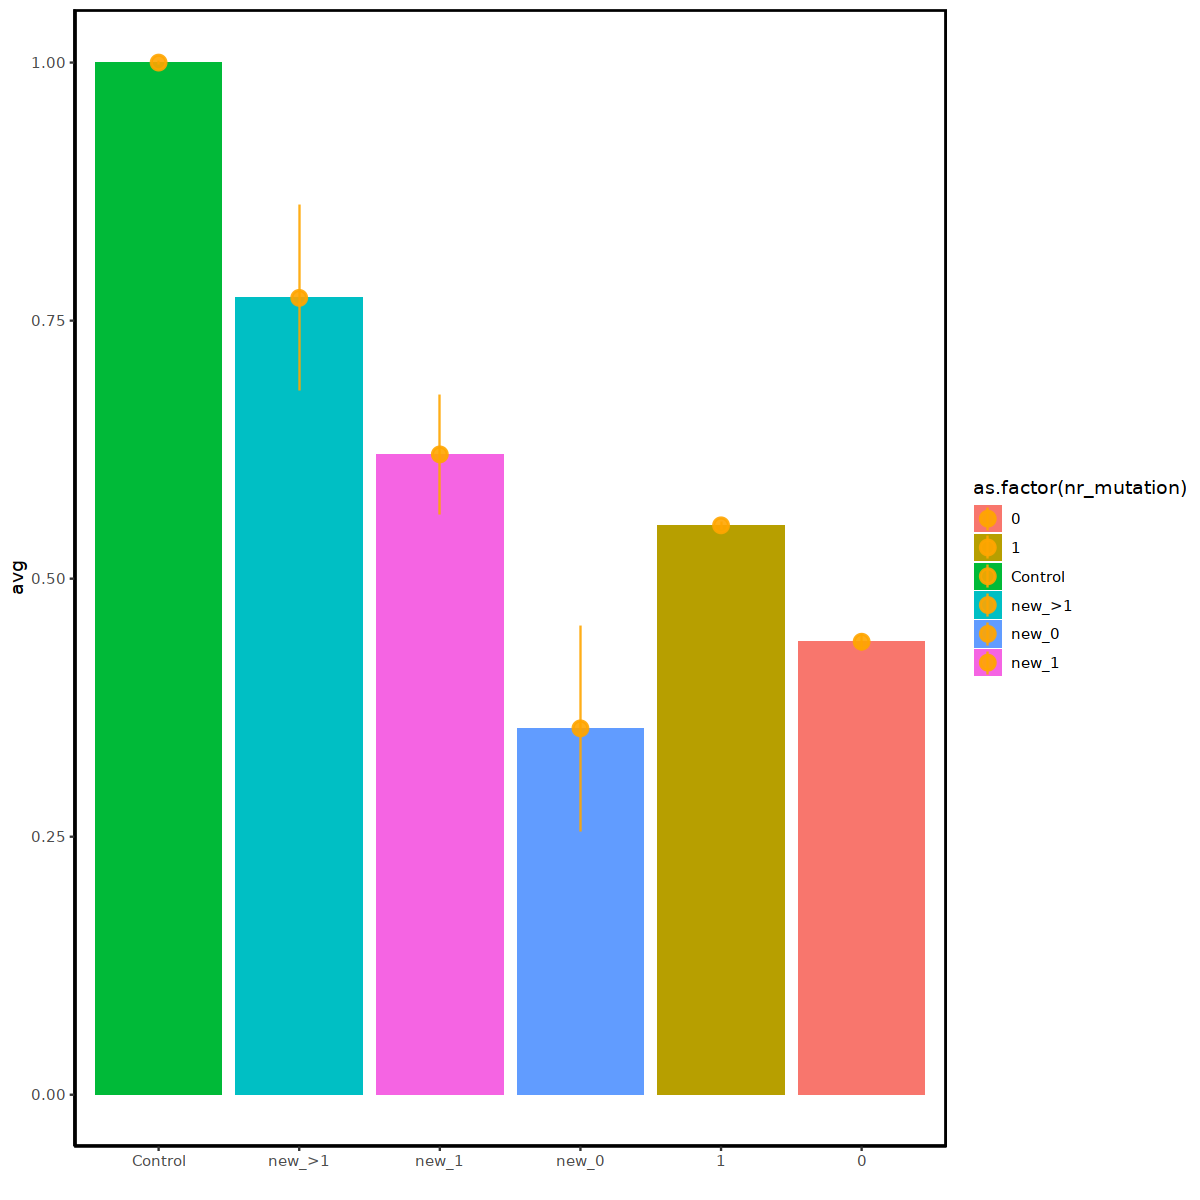

In [118]:
options(repr.plot.width=10,repr.plot.height=10)

#pdf('Weissman_aggregated_expression_barplot.pdf')

tmp.df <- all.exp2.MT.df[which(all.exp2.MT.df$target %in% high_exp_targets), c('nr_mutation','expression_norm')]
tmp.df <- tmp.df %>% group_by(nr_mutation) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), 
                                               sem = sd(expression_norm)/sqrt(n))
ggplot(tmp.df, 
       aes(
           x = factor(nr_mutation, levels = c('Control','new_>1','new_1','new_0','1','0')), 
           y = avg, fill = as.factor(nr_mutation))) + 
geom_col()+
#geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), width=.2,position=position_dodge(.9)) +
#geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sd, ymax=avg+sd), colour="orange", alpha=0.9, size=1.3)+
geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))
#dev.off()

In [119]:
table(all.exp2.MT.df$nr_mutation)
# Contro: 52875 = 2115 control cells x 25 targets
## 17403 == 19515-2115 cells with KO_girafr


      0       1 Control  new_>1   new_0   new_1 
   3329   13922   52875      46      19      87 

In [120]:
table(all.exp2.MT.df$nr_mutation)


      0       1 Control  new_>1   new_0   new_1 
   3329   13922   52875      46      19      87 

In [121]:
control_exp <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == 'Control'),'expression_norm']
WT_gRNA_exp <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == '0'),'expression_norm']
MT_gRNA_exp1 <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == '1'),'expression_norm']
MT_gRNA_exp2 <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == 'new_1'),'expression_norm']
MT_gRNA_exp3 <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == 'new_0'),'expression_norm']
MT_gRNA_exp4 <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == 'new_>1'),'expression_norm']


t.test(control_exp, WT_gRNA_exp) # p-value < 2.2e-16
t.test(control_exp, MT_gRNA_exp1) # p-value < 2.2e-16
t.test(control_exp, MT_gRNA_exp2) # 2.161e-12
t.test(control_exp, MT_gRNA_exp3) # 4.17e-09
t.test(control_exp, MT_gRNA_exp4) #  0.06888

t.test(MT_gRNA_exp3, MT_gRNA_exp4) #  0.06888



	Welch Two Sample t-test

data:  control_exp and WT_gRNA_exp
t = 56.264, df = 4254, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6128308 0.6570809
sample estimates:
mean of x mean of y 
1.0000000 0.3650441 



	Welch Two Sample t-test

data:  control_exp and MT_gRNA_exp1
t = 76.407, df = 28946, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5002837 0.5266268
sample estimates:
mean of x mean of y 
1.0000000 0.4865447 



	Welch Two Sample t-test

data:  control_exp and MT_gRNA_exp2
t = 8.1801, df = 86.786, p-value = 2.161e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3532803 0.5800753
sample estimates:
mean of x mean of y 
1.0000000 0.5333222 



	Welch Two Sample t-test

data:  control_exp and MT_gRNA_exp3
t = 10.466, df = 18.097, p-value = 4.17e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6201475 0.9314865
sample estimates:
mean of x mean of y 
 1.000000  0.224183 



	Welch Two Sample t-test

data:  control_exp and MT_gRNA_exp4
t = 1.8637, df = 45.093, p-value = 0.06888
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01802742  0.46515942
sample estimates:
mean of x mean of y 
 1.000000  0.776434 



	Welch Two Sample t-test

data:  MT_gRNA_exp3 and MT_gRNA_exp4
t = -3.9193, df = 62.971, p-value = 0.0002216
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8338332 -0.2706688
sample estimates:
mean of x mean of y 
 0.224183  0.776434 


In [120]:
control_exp <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == 'Control'),'expression_norm']
WT_gRNA_exp <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == '0'),'expression_norm']
MT_gRNA_exp1 <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == '1'),'expression_norm']
MT_gRNA_exp2 <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == 'new_1'),'expression_norm']
MT_gRNA_exp3 <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == 'new_0'),'expression_norm']
MT_gRNA_exp4 <- all.exp2.MT.df[which(all.exp2.MT.df$nr_mutation == 'new_>1'),'expression_norm']


t.test(control_exp, WT_gRNA_exp) # p-value < 2.2e-16
t.test(control_exp, MT_gRNA_exp1) # 2.2e-16
t.test(control_exp, MT_gRNA_exp2) #1.459e-06
t.test(control_exp, MT_gRNA_exp3) # 0.01535
t.test(control_exp, MT_gRNA_exp4) #  0.1584

t.test(WT_gRNA_exp, MT_gRNA_exp4) # 0.01625
t.test(MT_gRNA_exp1, MT_gRNA_exp4) # 0.1987



	Welch Two Sample t-test

data:  control_exp and WT_gRNA_exp
t = 56.264, df = 4254, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6128308 0.6570809
sample estimates:
mean of x mean of y 
1.0000000 0.3650441 



	Welch Two Sample t-test

data:  control_exp and MT_gRNA_exp1
t = 76.407, df = 28946, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5002837 0.5266268
sample estimates:
mean of x mean of y 
1.0000000 0.4865447 



	Welch Two Sample t-test

data:  control_exp and MT_gRNA_exp2
t = 8.1801, df = 86.786, p-value = 2.161e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3532803 0.5800753
sample estimates:
mean of x mean of y 
1.0000000 0.5333222 



	Welch Two Sample t-test

data:  control_exp and MT_gRNA_exp3
t = 10.466, df = 18.097, p-value = 4.17e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6201475 0.9314865
sample estimates:
mean of x mean of y 
 1.000000  0.224183 



	Welch Two Sample t-test

data:  control_exp and MT_gRNA_exp4
t = 1.8637, df = 45.093, p-value = 0.06888
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01802742  0.46515942
sample estimates:
mean of x mean of y 
 1.000000  0.776434 



	Welch Two Sample t-test

data:  WT_gRNA_exp and MT_gRNA_exp4
t = -3.4179, df = 45.708, p-value = 0.001336
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6537132 -0.1690665
sample estimates:
mean of x mean of y 
0.3650441 0.7764340 



	Welch Two Sample t-test

data:  MT_gRNA_exp1 and MT_gRNA_exp4
t = -2.4153, df = 45.19, p-value = 0.01983
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.53159931 -0.04817925
sample estimates:
mean of x mean of y 
0.4865447 0.7764340 


# Check GiRAFR new found doublets KO expression

In [122]:
new_doublets <- all_barcodes[which(all_barcodes$pipeline_not_single_cell == 1 & all_barcodes$paper_not_single_cell !=1), 'cb']
length(new_doublets) 
# pipeline identified doubets
table(seurat.object@meta.data[new_doublets,'KO_paper'])

[1] 61


  ALDOA   ATP5E     BCR     CAD   CDC23   COX11    DBR1     DUT  EIF2S1   GATA1 
      4       2       4       2       2       3       4       4       1       1 
  GINS1  GNB2L1   HSPA9   HSPE1    MTOR     neg  POLR1D  POLR2H     RAN   RPS14 
      1       1       1       2       2       7       6       1       2       4 
  RPS15 SEC61A1    TUBB 
      5       1       1 

For new doublets, following scenarios:
1. doublets with the mutant gRNA and wildtype gRNA targeting the same gene, 
2. doublets with the mutant gRNA and wildtype gRNA targeting the different gene
3. doublets with two wildtype gRNA targeting the same gene
4. doublets with two wildtype gRNA targeting different gene
5. doublets with two mutant gRNAs targeting different gene


In [123]:
cells.gRNA1$cb <- paste0(cells.gRNA1$cb, '-1')
cells.gRNA2$cb <- paste0(cells.gRNA2$cb, '-2')
cells.gRNA3$cb <- paste0(cells.gRNA3$cb, '-3')
cells.gRNA <- rbind(rbind(cells.gRNA1, cells.gRNA2), cells.gRNA3)

In [124]:
new_doublets_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% new_doublets),] 

In [125]:
new_doublets_type1 <- new_doublets_gRNA %>% group_by(cb) %>% summarise(n = n()) %>% filter(n == 1) %>% pull(cb)

In [126]:
# the mutant gRNA and wildtype gRNA targeting the same gene,
new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA[which(!new_doublets_gRNA$cb %in% new_doublets_type1),] %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))
new_doublets_gRNA2$KO <- lapply(new_doublets_gRNA2$target, function(x) sapply(strsplit(x, '_'), `[`, 1))
   

In [127]:
if1 <- lapply(new_doublets_gRNA2$KO, function(x) x[1]== x[2])
if2 <- lapply(new_doublets_gRNA2$UMIs, function(x) x[1]>0 & x[2] > 0)
              
new_doublets_type_unknown <- c()
new_doublets_type2 <- c()
new_doublets_type3 <- c()
new_doublets_type4 <- c()
new_doublets_type5 <- c()
for(i in 1:nrow(new_doublets_gRNA2)){
    if(is.na(if1[i]) | is.na(if2[i])){
        new_doublets_type_unknown <- rbind(new_doublets_type_unknown, new_doublets_gRNA2[i,])
    }else{
    if(if1[i] == TRUE & if2[i] == TRUE){ # two wiltype gRNA targeting the same target
        new_doublets_type3 <- rbind(new_doublets_type3, new_doublets_gRNA2[i,])
    }else if(if1[i] == TRUE & if2[i] == FALSE){ #  mutant gRNA and wildtype gRNA or two muatnt targeting the same gene
        new_doublets_type2 <- rbind(new_doublets_type2, new_doublets_gRNA2[i,])
    }else if(if1[i] == FALSE & if2[i] == TRUE){# two wildtype gRNA targeting different gene
        new_doublets_type4 <- rbind(new_doublets_type4, new_doublets_gRNA2[i,]) 
    }else if(if1[i] == FALSE & if2[i] == FALSE){ # mutant gRNA and wildtype gRNA or two muatnt  different gene 
        new_doublets_type5 <- rbind(new_doublets_type5, new_doublets_gRNA2[i,])
    }else{
        print('unknown error')
    }
    }
}

length(new_doublets_type1)
nrow(new_doublets_type2)
nrow(new_doublets_type3)
nrow(new_doublets_type4)
nrow(new_doublets_type5)
nrow(new_doublets_type_unknown)

[1] 7

NULL

[1] 1

[1] 3

[1] 50

NULL

In [128]:
new_doublets_subset <- rbind(new_doublets_type4, new_doublets_type5)$cb
length(new_doublets_subset)


[1] 53

In [129]:
table(cells.num_features.all[which(cells.num_features.all$cb %in% new_doublets_subset),'num_features'])


num_features
 2  3 
52  1 

In [130]:
seurat.object.doublets <- subset(seurat.object, cells = new_doublets_subset)
seurat.object.doublets

An object of class Seurat 
33694 features across 53 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 2 layers present: counts, data

In [131]:
doublets_targets <- unique(seurat.object.doublets$KO_paper)[-which(unique(seurat.object.doublets$KO_paper) == 'neg')] # remove 'neg'
doublets.exp.df <- data.frame()
CTRL_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO_paper == 'neg'),])

for(gene in doublets_targets){
    KO_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO_paper == gene),])
   tmp.df <- rbind(data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, KO_cells], type = 'KO_doublets'),
                    data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, CTRL_cells], type = 'Control_doublets'))
   tmp.df$target = gene
   tmp.df$cb = c(KO_cells, CTRL_cells)
   doublets.exp.df <- rbind(doublets.exp.df, tmp.df)
}

In [132]:
all.exp2.doublets.df <- rbind(all.exp2.df, doublets.exp.df)

In [133]:
all.exp2.doublets.df <- merge(all.exp2.doublets.df, cells.gRNA.single.MT.all[,c(4:15)], by = 'cb', all.x = TRUE)
all.exp2.doublets.df$type_is_WT <- paste0(all.exp2.doublets.df$type, all.exp2.doublets.df$is_WT)

In [134]:
table(all.exp2.doublets.df$type_is_WT)
sum(is.na(all.exp2.doublets.df$type_is_WT))


Control_doubletsNA       ControlFALSE        ControlTRUE      KO_doubletsNA 
                84                375              52500                 49 
    KO_girafrFALSE      KO_girafrTRUE 
             14074               3329 

[1] 0

In [135]:
all.exp2.doublets.df$type_is_WT2 <- all.exp2.doublets.df$type_is_WT
all.exp2.doublets.df[which(all.exp2.doublets.df$type_is_WT == 'ControlFALSE' |
                    all.exp2.doublets.df$type_is_WT == 'ControlTRUE'),'type_is_WT2'] <- 'Control'

In [136]:
table(all.exp2.doublets.df$type_is_WT2)


           Control Control_doubletsNA      KO_doubletsNA     KO_girafrFALSE 
             52875                 84                 49              14074 
     KO_girafrTRUE 
              3329 

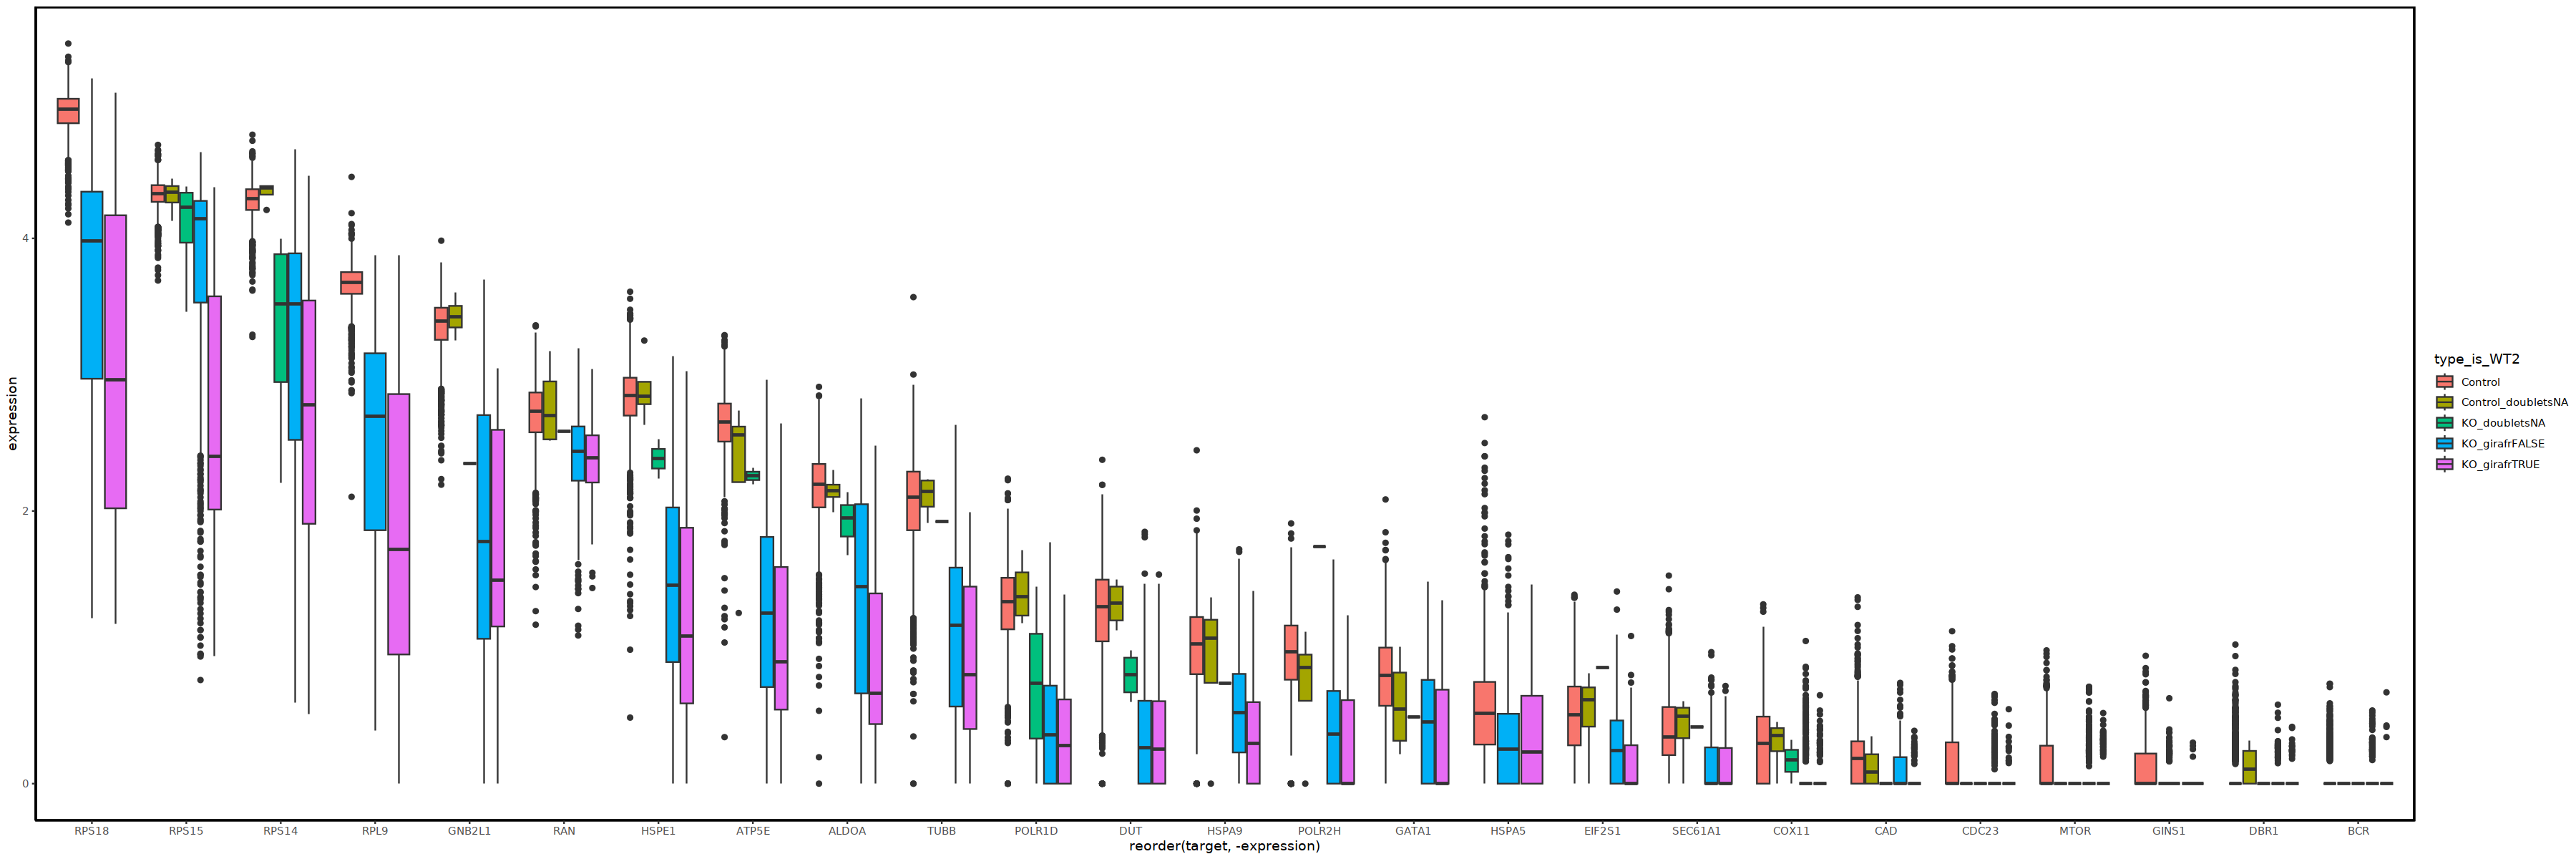

In [137]:
options(repr.plot.width=30,repr.plot.height=10)
ggplot(all.exp2.doublets.df, aes(x = reorder(target, -expression), y = expression, fill = type_is_WT2)) + 
#scale_fill_manual(breaks = c("Control", "KOFALSE","KOTRUE"), 
#                  values=c("grey", "lightblue",'blue'))+
geom_boxplot()+theme_classic()+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))


In [138]:
all.exp2.doublets.df$sgRNA_name2 <- all.exp2.doublets.df$sgRNA_name
all.exp2.doublets.df$sgRNA_name2[grepl('P1',all.exp2.doublets.df$sgRNA_name)] <- 'paper_sgRNA'

In [139]:
all.exp2.doublets.df$sgRNA_name2[which(all.exp2.doublets.df$cate == 'new_MT' & all.exp2.doublets.df$type == 'KO_girafr')] <- 'new_MT'
all.exp2.doublets.df$sgRNA_name2[which(all.exp2.doublets.df$type == 'Control')] <- 'control'
                                 

In [140]:
all.exp2.doublets.df$sgRNA_name2[grepl('_00',all.exp2.doublets.df$sgRNA_name)] <- 'paper_WT_sgRNA'

In [141]:
table(all.exp2.doublets.df[which(all.exp2.doublets.df$KO == 'RPL9'),'sgRNA_name2'])# validate new MT for RPL9 is 9 


        new_MT    paper_sgRNA paper_WT_sgRNA 
             9            413            111 

high expression targets :  0 counts less than 500 cells in control

In [142]:
sum(is.na(all.exp2.doublets.df$sgRNA_name2)) # doublets as NA

[1] 133

In [143]:
sum(high_exp_targets %in% doublets_targets)

[1] 15

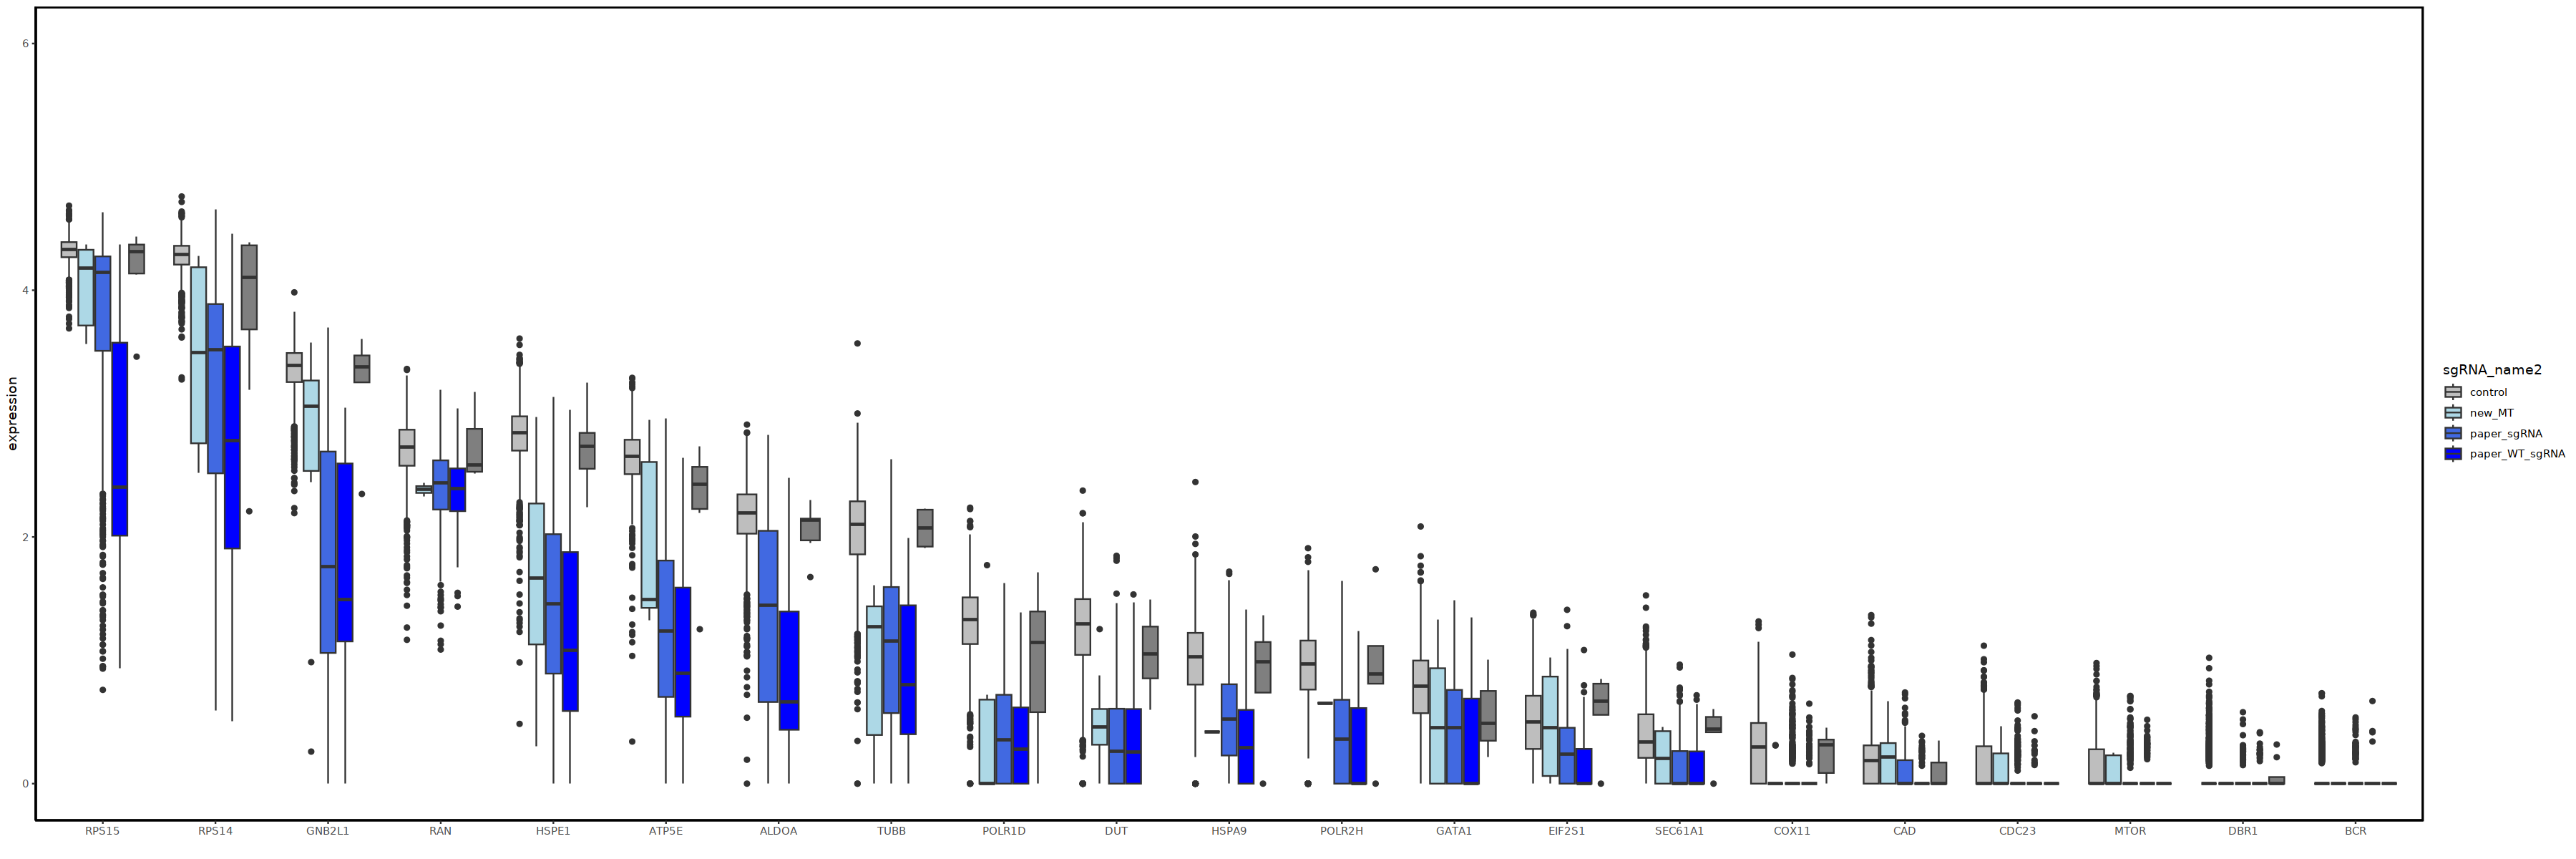

In [144]:
options(repr.plot.width=30,repr.plot.height=10)

#pdf('Weissman_expression_boxplot_seperate_targets.pdf',width = 30, height = 10)

ggplot(all.exp2.doublets.df[which(all.exp2.doublets.df$target %in% doublets_targets), ], aes(x = reorder(target, -expression), y = expression, fill = sgRNA_name2)) + 
ylim(0,6)+
geom_boxplot(notch = FALSE)+theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))+
scale_fill_manual(breaks = c("control", "new_MT","paper_sgRNA","paper_WT_sgRNA"), 
                  values=c("grey", "lightblue",'royalblue','blue'))

#dev.off()

In [145]:
all.exp2.doublets.df$nr_mutation <- str_count(all.exp2.doublets.df$V5, "gRNA")
#all.exp2.MT.df$nr_mutation[grepl('\\(', all.exp2.MT.df$V5)] <- as.numeric(sub('\\)','',sub('\\(', '',str_extract(all.exp2.MT.df$V5[grepl('\\(', all.exp2.MT.df$V5)], '\\(\\d\\)'))))
all.exp2.doublets.df$nr_mutation[which(all.exp2.doublets.df$nr_mutation > 1)] <- '>1'
all.exp2.doublets.df$nr_mutation[which(all.exp2.doublets.df$cate == 'new_MT')] <- paste0('new_',all.exp2.doublets.df$nr_mutation[which(all.exp2.doublets.df$cate == 'new_MT')])
#all.exp2.doublets.df$nr_mutation[which(all.exp2.doublets.df$type == 'Control' | all.exp2.doublets.df$type == 'Control_doublets' )] <- 'Control'
all.exp2.doublets.df$nr_mutation[which(all.exp2.doublets.df$type == 'Control' )] <- 'Control'
all.exp2.doublets.df$nr_mutation[which(all.exp2.doublets.df$type == 'Control_doublets' )] <- 'Control_doublets'

all.exp2.doublets.df$nr_mutation[which(all.exp2.doublets.df$type == 'KO_doublets')] <- 'KO_doublets'


In [146]:
table(all.exp2.doublets.df$nr_mutation)


               0                1          Control Control_doublets 
            3329            13922            52875               84 
     KO_doublets           new_>1            new_0            new_1 
              49               46               19               87 

In [147]:
#avg.exp.doublets.control <- all.exp2.doublets.df[which(all.exp2.doublets.df$type == 'Control' | all.exp2.doublets.df$type == 'Control_doublets'),] %>% group_by(target) %>% summarise(avg = mean(expression))
avg.exp.doublets.control <- all.exp2.doublets.df[which(all.exp2.doublets.df$type == 'Control'),] %>% group_by(target) %>% summarise(avg = mean(expression))
avg.exp.doublets.control <- as.data.frame(avg.exp.doublets.control)
rownames(avg.exp.doublets.control) <- avg.exp.doublets.control$target

In [148]:
all.exp2.doublets.df$expression_norm <- all.exp2.doublets.df$expression/avg.exp.doublets.control[all.exp2.doublets.df$target,'avg']

In [149]:
library(ggpubr)

Notch went outside hinges
ℹ Do you want `notch = FALSE`?
Notch went outside hinges
ℹ Do you want `notch = FALSE`?


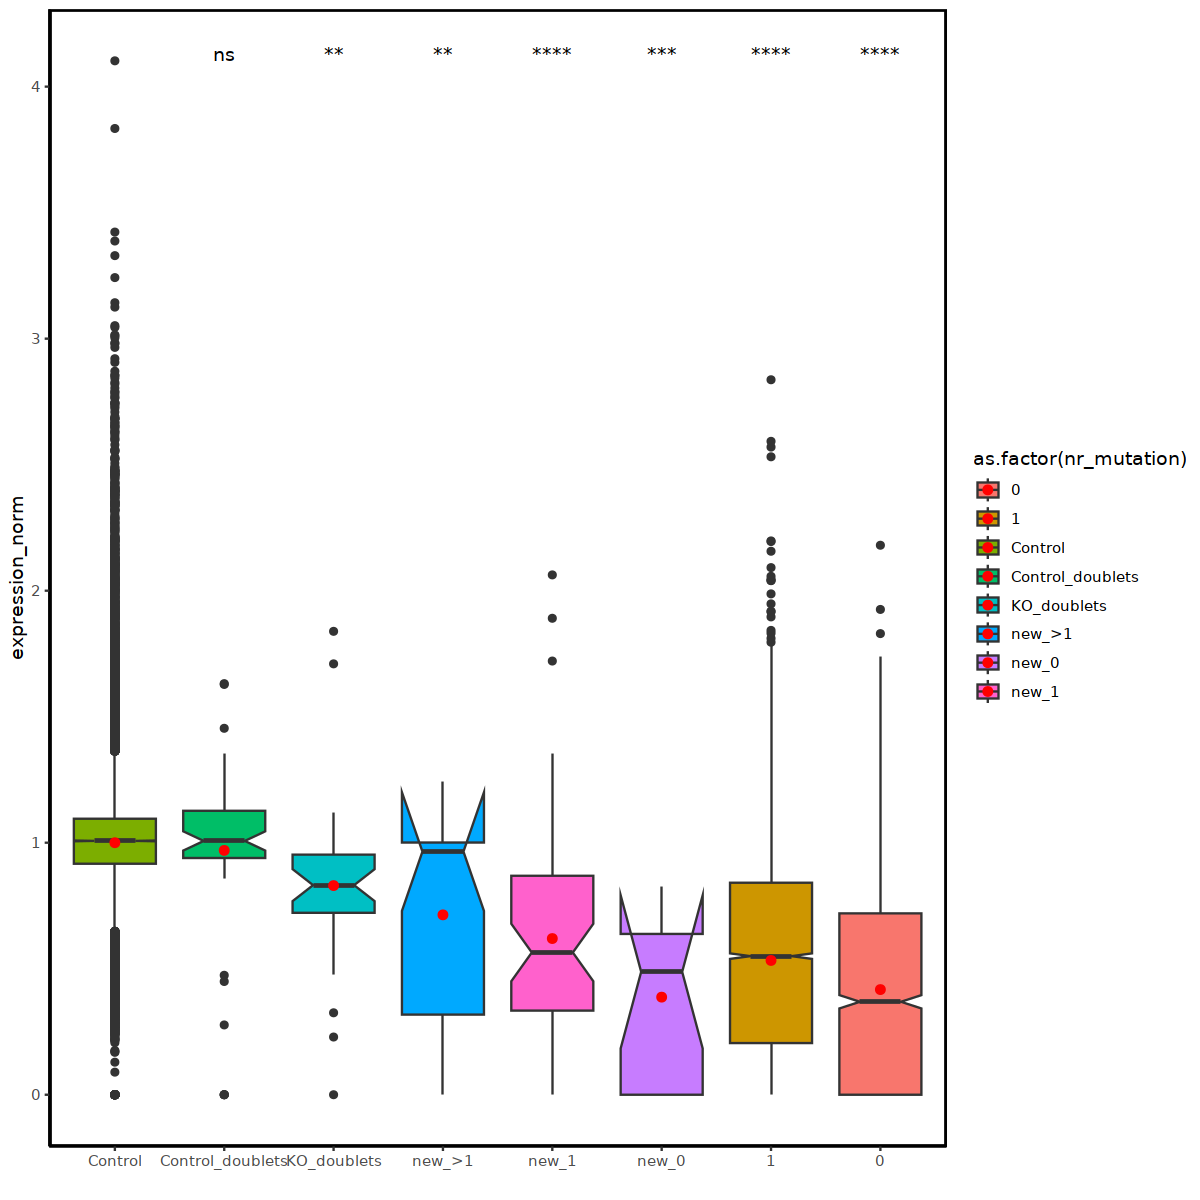

In [150]:
options(repr.plot.width=10,repr.plot.height=10)
#pdf('Weissman_aggregated_expression_boxplot_doublets.pdf')


ggplot(all.exp2.doublets.df[which(all.exp2.doublets.df$target %in% intersect(doublets_targets, high_exp_targets)), ], 
       aes(x = factor(nr_mutation, levels = c('Control', 'Control_doublets', 'KO_doublets','new_>1','new_1','new_0','1','0')), y = expression_norm, fill = as.factor(nr_mutation))) + 
#ylim(0,6)+
#geom_violin()+
geom_boxplot(notch = TRUE)+
stat_summary(fun.y=mean, geom="point", size=2, color="red")+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))+ 
stat_compare_means(label = "p.signif", method = "t.test",ref.group = "Control") 


#dev.off()

In [151]:
tmp.df <- all.exp2.doublets.df[which(all.exp2.doublets.df$target %in% doublets_targets), c('nr_mutation','expression_norm')]
tmp.df %>% group_by(nr_mutation) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), 
                                               sem = sd(expression_norm)/sqrt(n))


nr_mutation      n     avg       sd        sem        
1 0                 3009 0.3463586 0.6192404 0.011288810
2 1                11813 0.4825625 0.6564573 0.006039853
3 Control          44415 1.0000000 0.8804068 0.004177520
4 Control_doublets    84 0.8620341 0.7039543 0.076807712
5 KO_doublets         49 0.5911011 0.4737362 0.067676594
6 new_0               18 0.2366376 0.3272872 0.077142324
7 new_1               76 0.5447588 0.5480092 0.062860972
8 new_>1              35 0.7848166 0.8179113 0.138252241

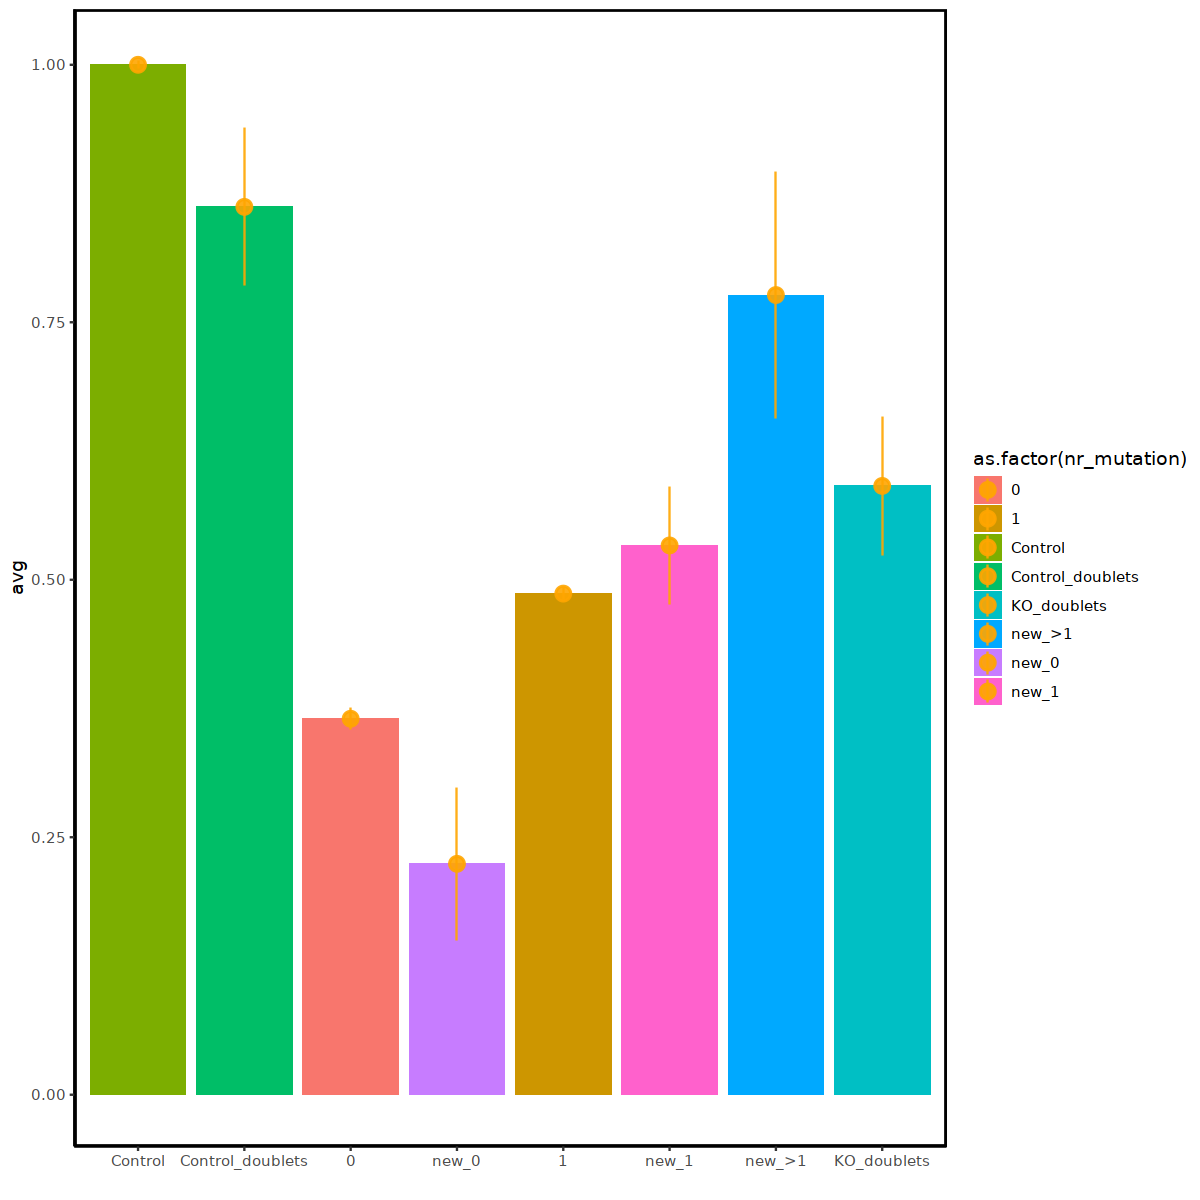

In [152]:
options(repr.plot.width=10,repr.plot.height=10)

#pdf('Weissman_aggregated_expression_barplot_doublets.pdf')

tmp.df <- all.exp2.doublets.df[, c('nr_mutation','expression_norm')]
tmp.df <- tmp.df %>% group_by(nr_mutation) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), 
                                               sem = sd(expression_norm)/sqrt(n))
ggplot(tmp.df, 
       aes(
           x = factor(nr_mutation, levels = c('Control','Control_doublets','0','new_0','1','new_1', 'new_>1','KO_doublets')), 
           y = avg, fill = as.factor(nr_mutation))) + 
geom_col()+
#geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), width=.2,position=position_dodge(.9)) +
#geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sd, ymax=avg+sd), colour="orange", alpha=0.9, size=1.3)+
geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1))
#dev.off()

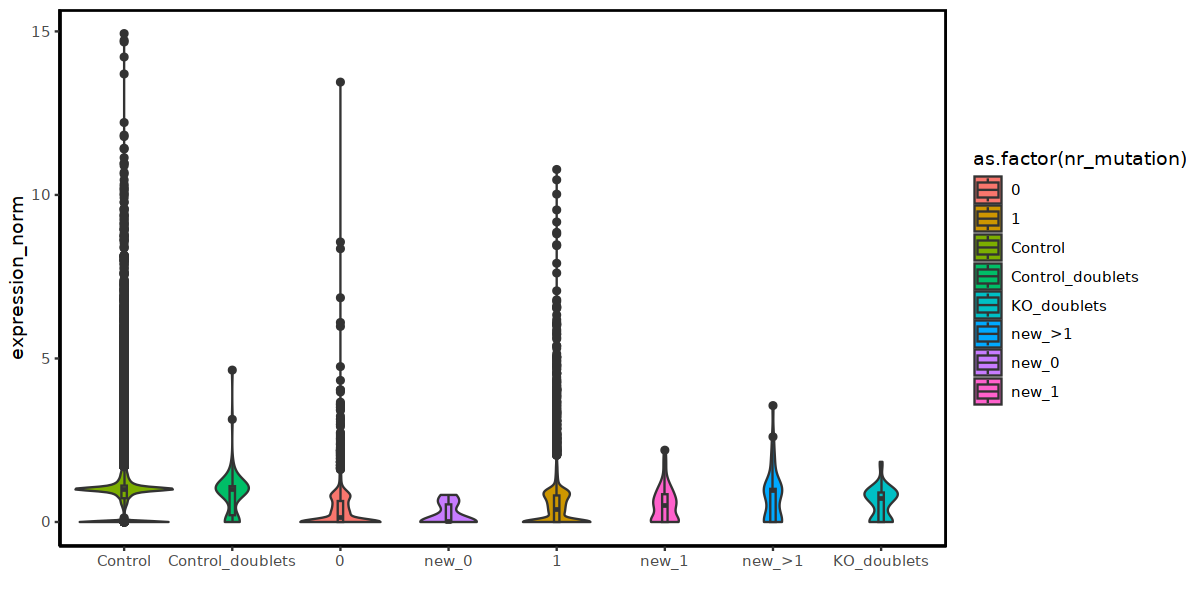

In [169]:
options(repr.plot.width=10,repr.plot.height=5)
tmp.df <- all.exp2.doublets.df[, c('nr_mutation','expression_norm')]
ggplot(tmp.df, 
       aes(
           x = factor(nr_mutation, levels = c('Control','Control_doublets','0','new_0','1','new_1', 'new_>1','KO_doublets')), 
           y = expression_norm, fill = as.factor(nr_mutation))) + 
geom_violin()+geom_boxplot(width = 0.05)+
theme_classic()+
xlab('')+theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1))

In [153]:
table(all.exp2.doublets.df[which(all.exp2.doublets.df$target %in%  high_exp_targets), 'nr_mutation'])
table(all.exp2.doublets.df[, 'nr_mutation'])
# Contro: 52875 = 2115 control cells x 25 targets + 
## 17403 == 19515-2115 cells with KO_girafr


               0                1          Control Control_doublets 
            2126             9801            38070               60 
     KO_doublets           new_>1            new_0            new_1 
              33               27               12               63 


               0                1          Control Control_doublets 
            3329            13922            52875               84 
     KO_doublets           new_>1            new_0            new_1 
              49               46               19               87 

In [154]:
nr_mutation_percell <- all.exp2.doublets.df %>% group_by(cb) %>% summarise(nr_mutation = unique(nr_mutation))

In [155]:
rownames(nr_mutation_percell) <- nr_mutation_percell$cb

Warning message:
“Setting row names on a tibble is deprecated.”


In [156]:
seurat.object$nr_mutation <- nr_mutation_percell[seurat.object@meta.data$cell_barcode, ]$nr_mutation

In [157]:
table(seurat.object$nr_mutation)
sum(is.na(seurat.object$nr_mutation))


               0                1          Control Control_doublets 
            3329            13922             2115                4 
     KO_doublets           new_>1            new_0            new_1 
              49               46               19               87 

[1] 4062

all.exp2.df only includes girafr.single cells